# Problem Statement

It is a Regression Problem,in which need to predict Price of each homes(sale price) With 79 explanatory variables describing almost every aspect of residential homes.on basis of these variable's trained Machine Learning model with almost every Machine Leaning algorithm and tried to predicted the right price of House which helps to lots of customers to buy their dream house.


In [2096]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
from sklearn import preprocessing
  

    
label_encoder = preprocessing.LabelEncoder()


# Load Train Dataset

In [2097]:
#Loading dataset
train = pd.read_csv("C:/Users/ABHISHEK/Project-Housing--2-/Project-Housing_splitted/train.csv")
train = train.drop(["Id"],axis=1)
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            120       RL          NaN     4928   Pave   NaN      IR1   
1             20       RL         95.0    15865   Pave   NaN      IR1   
2             60       RL         92.0     9920   Pave   NaN      IR1   
3             20       RL        105.0    11751   Pave   NaN      IR1   
4             20       RL          NaN    16635   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1163          20       RL          NaN     9819   Pave   NaN      IR1   
1164          20       RL         67.0     8777   Pave   NaN      Reg   
1165         160       RL         24.0     2280   Pave   NaN      Reg   
1166          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   


# EDA

# Check Distribution of Target Feature

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


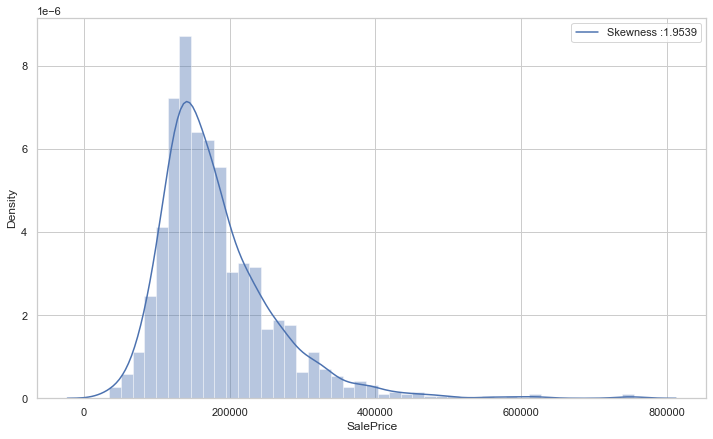

In [2098]:
plt.figure(figsize=(12,7))
dist_target = sns.distplot(train["SalePrice"])
dist_target.legend(["Skewness :{:.4f}".format(train["SalePrice"].skew())])
plt.show()

In [2099]:
# null values in train data for each columns:

nan_features = [features for features in train.columns if train[features].isnull().sum()>=1]
train[nan_features].isnull().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [2100]:
# Percentage of null values in each NAN Columns
train[nan_features].isnull().mean()

LotFrontage     0.183219
Alley           0.934075
MasVnrType      0.005993
MasVnrArea      0.005993
BsmtQual        0.025685
BsmtCond        0.025685
BsmtExposure    0.026541
BsmtFinType1    0.025685
BsmtFinType2    0.026541
FireplaceQu     0.471747
GarageType      0.054795
GarageYrBlt     0.054795
GarageFinish    0.054795
GarageQual      0.054795
GarageCond      0.054795
PoolQC          0.994007
Fence           0.797089
MiscFeature     0.962329
dtype: float64

In [2101]:
# Featutes Information like(Dtype and Number of non null counts) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [2102]:
#All Numericals Features

numerical_features = train.select_dtypes(include=["float64","int64"])
numerical_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120          NaN     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20          NaN    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20          NaN     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60          NaN     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             1976         0.0         120           0        958   
1             1970         0.0         351         823       1043   
2             1997         0.0         862           0        255   
3             1977       480.0         705           0       1139   
4             2000       126.0        1246           0        356   
...            ...         ...         ...         ...        ...   
1163          1967        31.0         450           0        432   
1164          2003         0.0           0           0          0   
1165          1976         0.0         566           0        289   
1166          1950         0.0           0           0        649   
1167          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4                8           1       1977.0           2         529   


In [2103]:
#All categorical Features.

categorical_features = train.select_dtypes(include=["object"])
categorical_features

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock      NaN      NaN          NaN          NaN          NaN   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd

In [2104]:
# Name of those feature's having Yearly Data.
year_feature_names = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]
year_feature_names

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

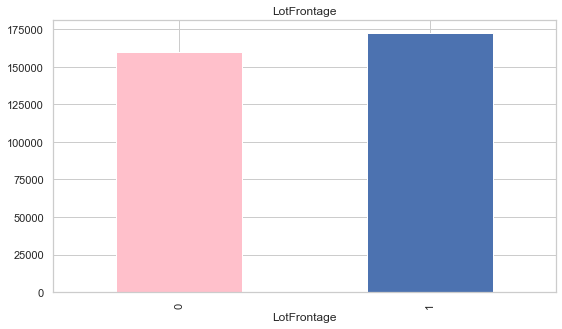

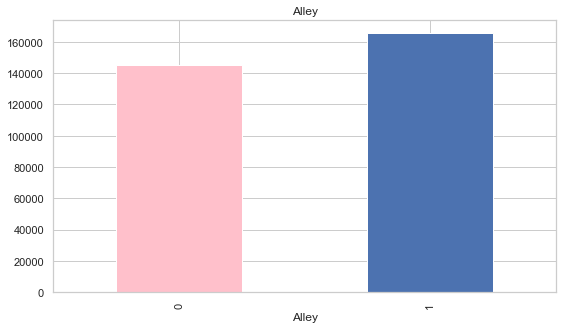

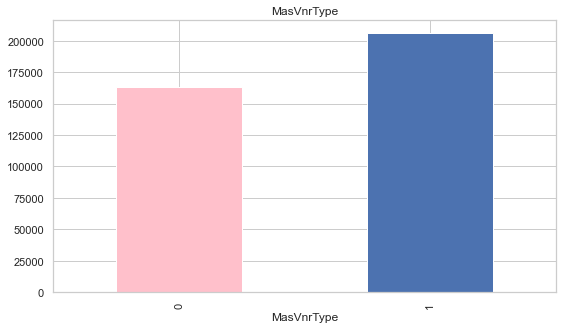

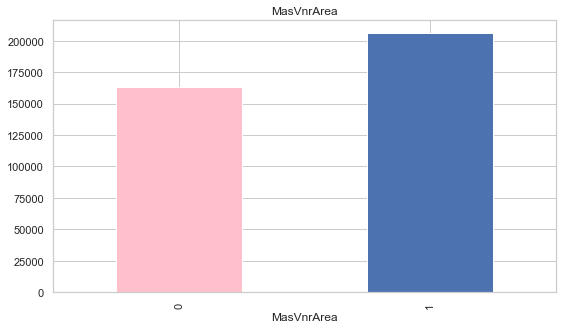

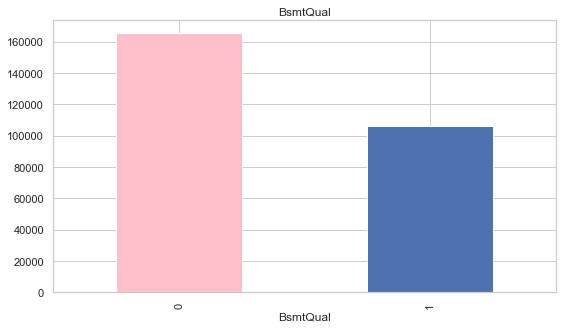

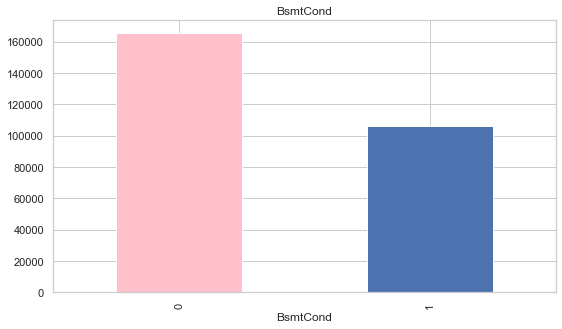

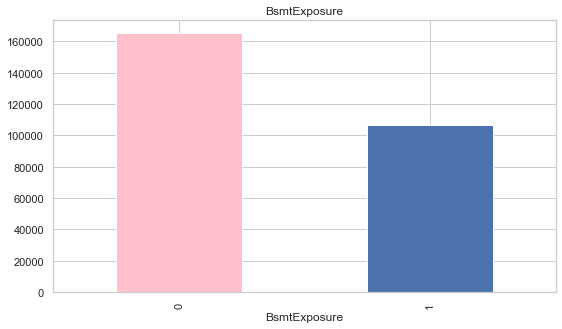

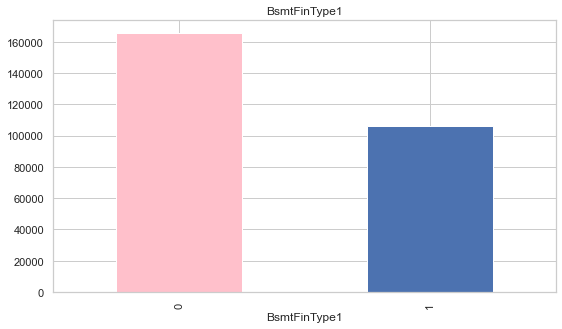

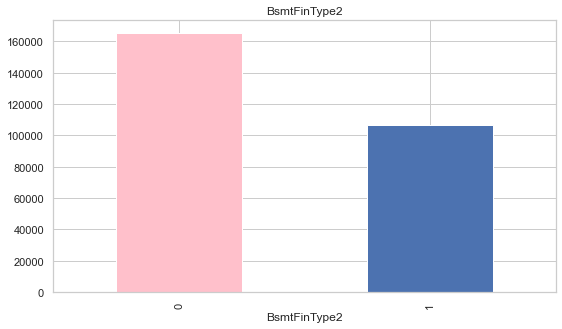

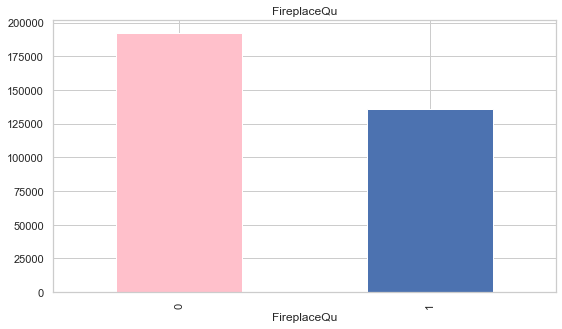

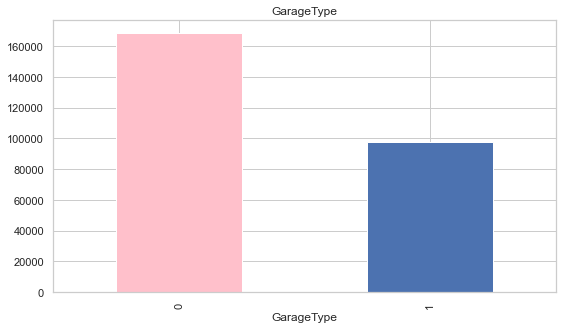

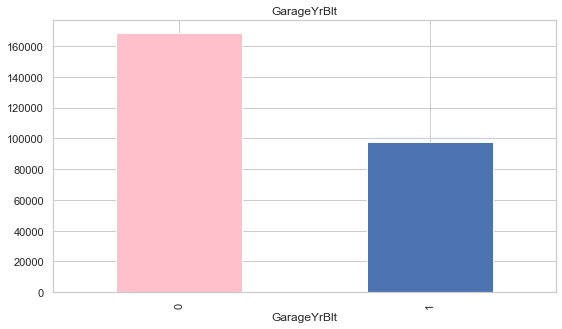

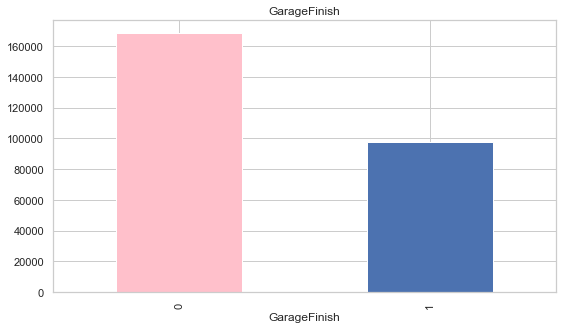

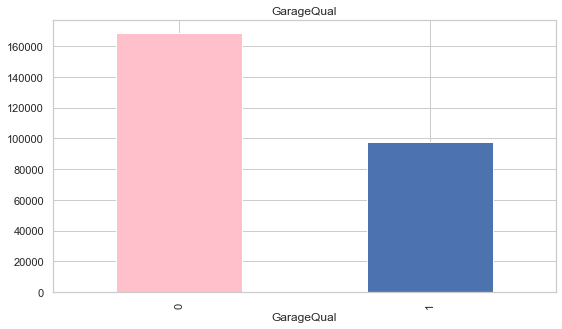

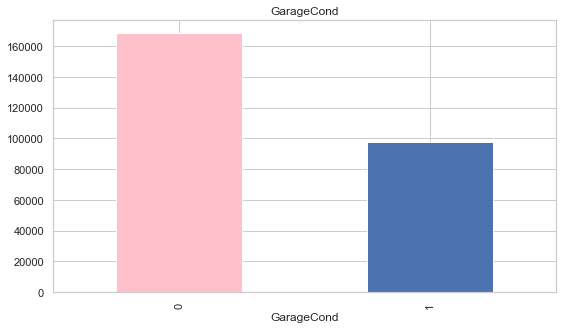

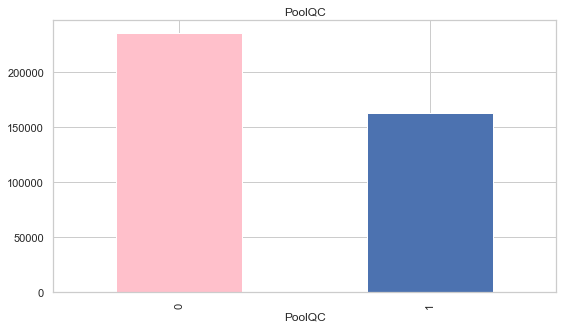

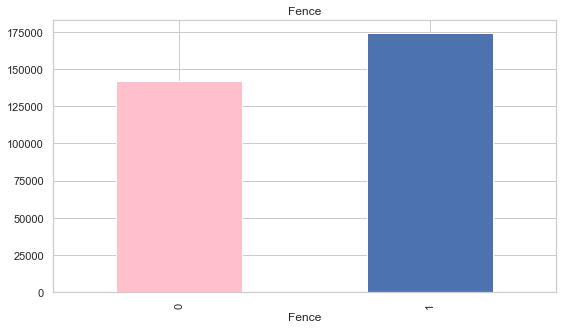

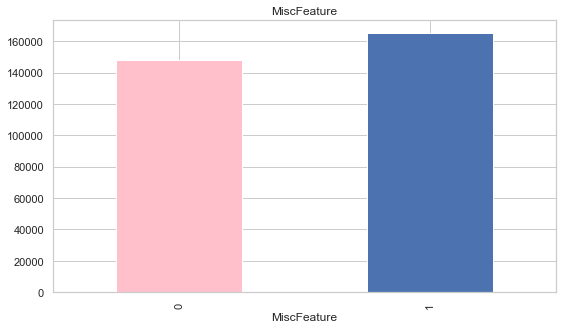

In [2105]:
# Check NAN Values are important for Target Feature.

train_copy = train.copy()

for feature in nan_features:
    train_copy[feature] = np.where(train_copy[feature].isnull(),1,0)
    train_copy.groupby(feature)["SalePrice"].median().plot.bar(color=["pink","b"],figsize=(9,5))
    plt.title(feature)
    plt.show()

From Graph's it's Clearly visible that missing value has also Impact on Dependent variable,so we need to replace these nan value with something meaningfull.

In [2106]:
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            120       RL          NaN     4928   Pave   NaN      IR1   
1             20       RL         95.0    15865   Pave   NaN      IR1   
2             60       RL         92.0     9920   Pave   NaN      IR1   
3             20       RL        105.0    11751   Pave   NaN      IR1   
4             20       RL          NaN    16635   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1163          20       RL          NaN     9819   Pave   NaN      IR1   
1164          20       RL         67.0     8777   Pave   NaN      Reg   
1165         160       RL         24.0     2280   Pave   NaN      Reg   
1166          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   


C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

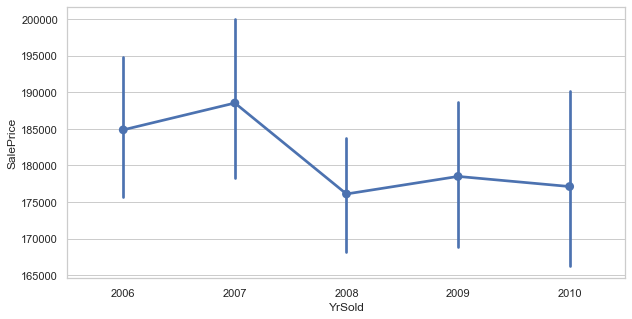

In [2107]:
# Sale Price range from min to max according to year.
plt.figure(figsize=(10,5))
sns.pointplot(train["YrSold"],train["SalePrice"])

one of the 2007 Sold House Sale's Price was Highest in all 5 years of Data and 2010 had highest range of Sale's Price.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

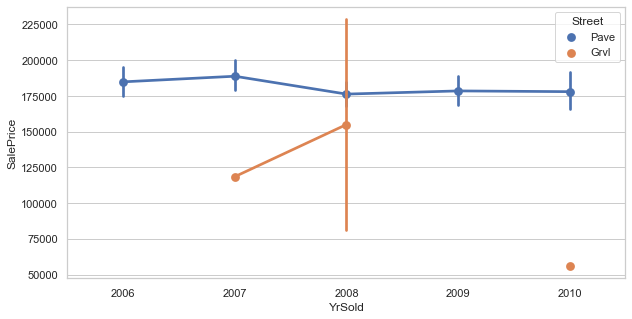

In [2108]:
# Sale Price range from min to max in every year with Street
plt.figure(figsize=(10,5))
sns.pointplot(train["YrSold"],train["SalePrice"],hue=train["Street"])

from upper graph it's clear that Pavel Street Sale Price range aren't varying so much, But in Gravel Street Sale's Price are varying.

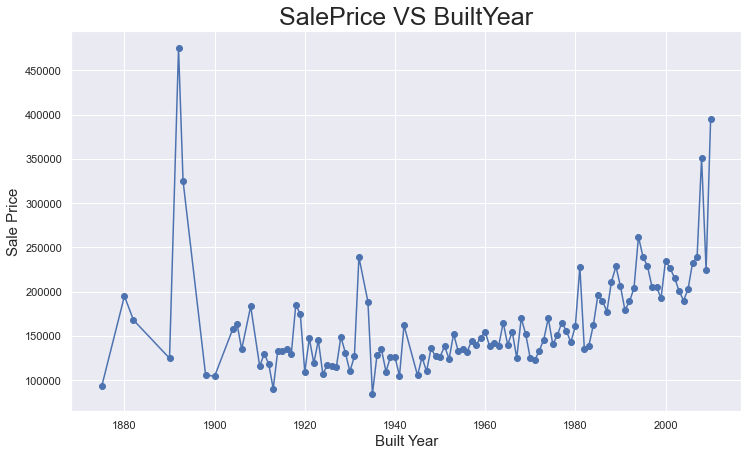

In [2109]:
# Average SalePrice in Every Built Year.

sns.set(style='darkgrid')
plt.figure(figsize=(12,7))
plt.plot(train_copy.groupby("YearBuilt")["SalePrice"].median(),marker="o")
plt.title("SalePrice VS BuiltYear",fontsize=25)
plt.xlabel("Built Year",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.show()

from upper graph it's clear that if House is newly Built than the chance is to get high sale price

Text(0, 0.5, 'SalePrice')

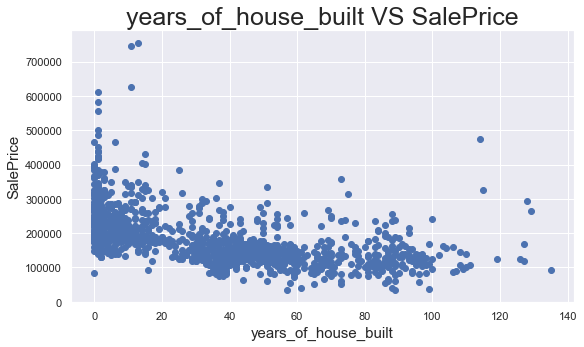

In [2110]:
# Graph between years_of_house_built at the year of Sold and SalePrice.


train_copy["years_of_house_built"] = train_copy["YrSold"]-train_copy["YearBuilt"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_house_built"],train_copy["SalePrice"])
plt.title("years_of_house_built VS SalePrice",fontsize=25)
plt.xlabel("years_of_house_built",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)

from upper graph can see that if house is 0 to 20 year old than the price of sale's is very high

Text(0, 0.5, 'SalePrice')

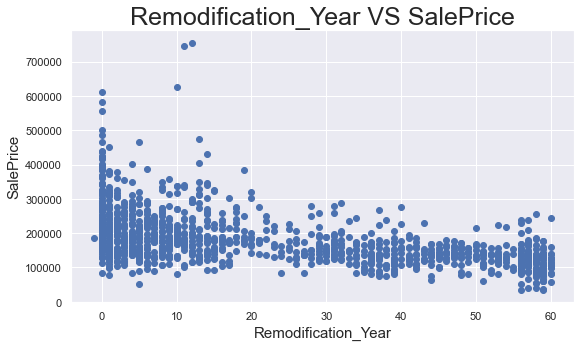

In [2111]:
# Graph between years_of_Remodification at the year of Sold  and SalePrice.

train_copy["years_of_RemodAdd"] = train_copy["YrSold"]-train_copy["YearRemodAdd"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_RemodAdd"],train_copy["SalePrice"])
plt.title("Remodification_Year VS SalePrice",fontsize=25)
plt.xlabel("Remodification_Year",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)


from upper graph it's clear that if Number of Remodification year is less tham 15 year's than the saling price's also High.

Text(0, 0.5, 'SalePrice')

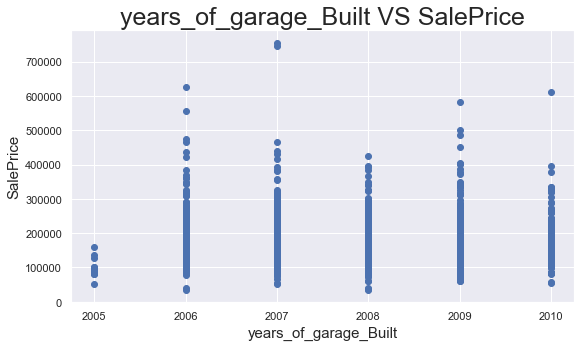

In [2112]:
# Graph between years_of_garage_Built at the year of Sold  and SalePrice.

train_copy["years_of_garage_Built"] = train_copy["YrSold"]-train_copy["GarageYrBlt"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_garage_Built"],train_copy["SalePrice"])
plt.title("years_of_garage_Built VS SalePrice",fontsize=25)
plt.xlabel("years_of_garage_Built",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)


In which year garage was built it's not impacting so much the Price of sale.

In [2113]:
# taking those feature's having the unique value less than 25 in continuous feature.

discrete_features = [feature for feature in numerical_features if len(train[feature].unique())<25]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

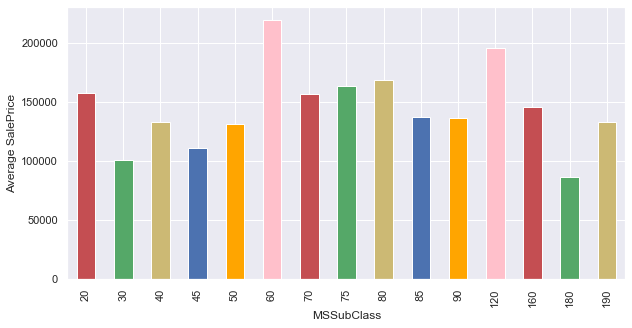

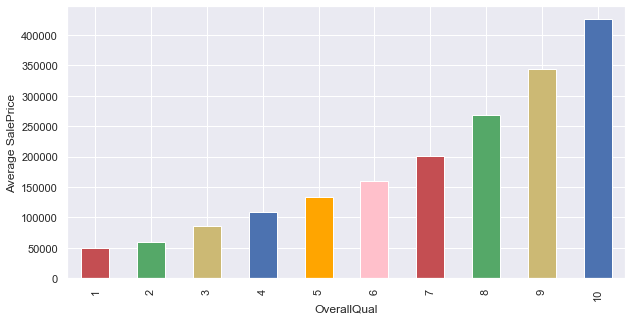

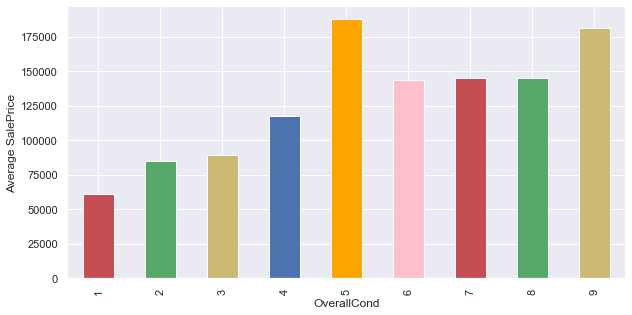

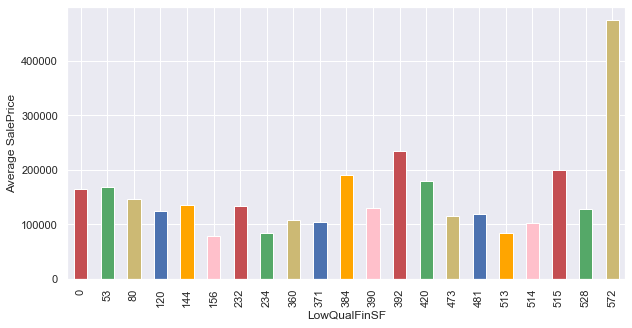

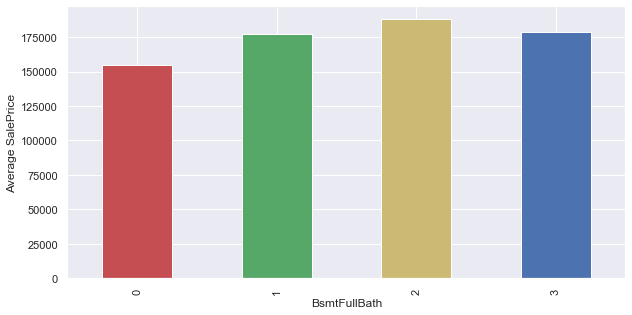

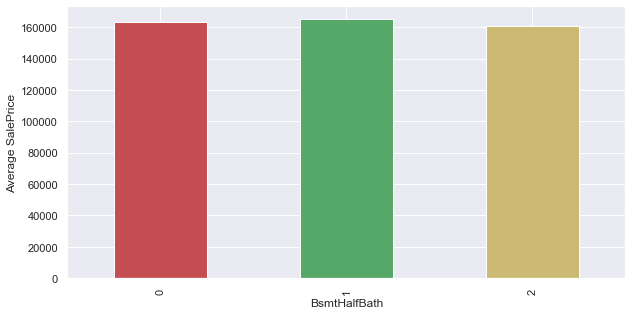

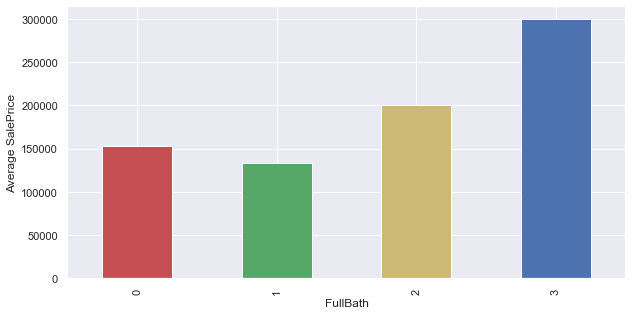

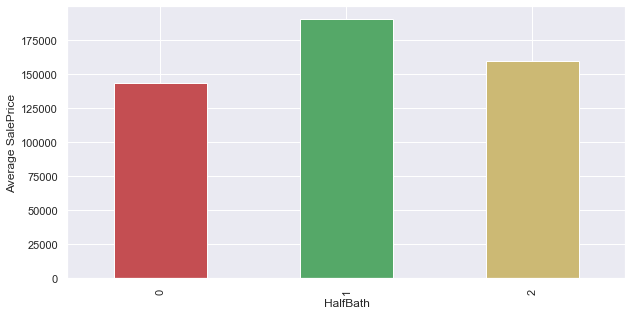

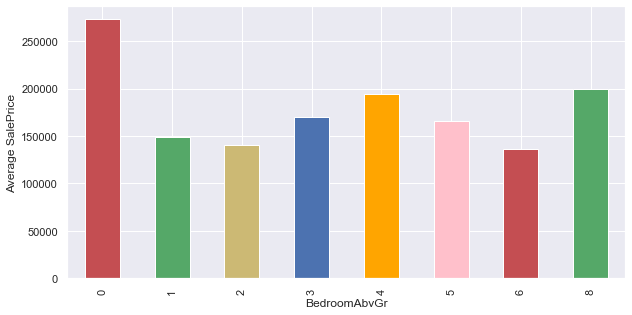

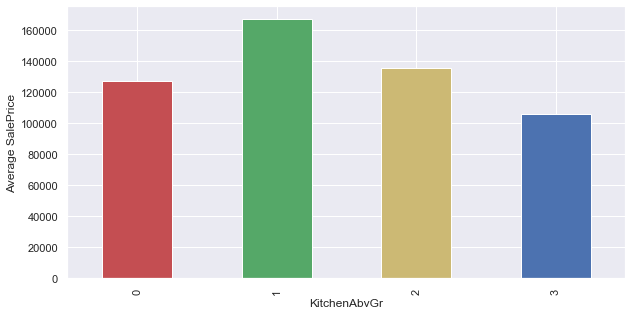

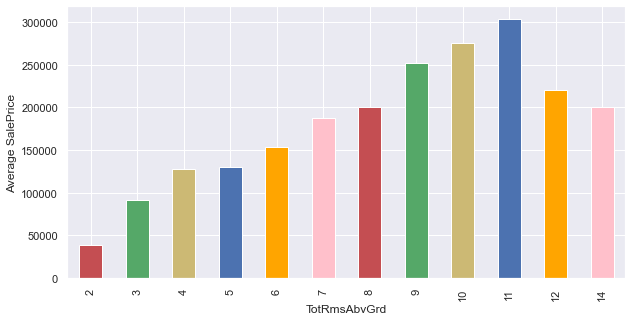

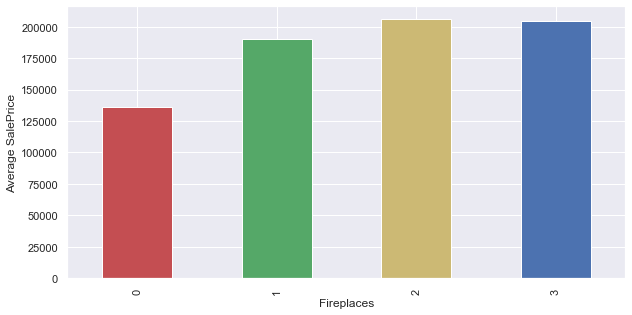

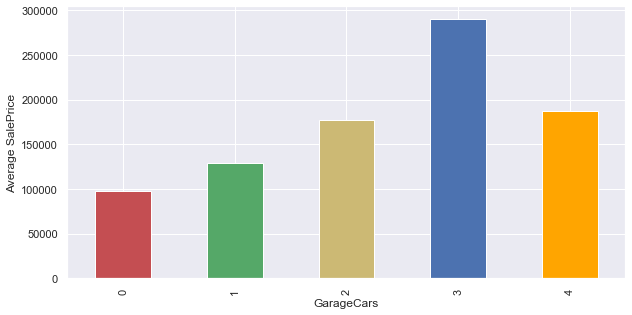

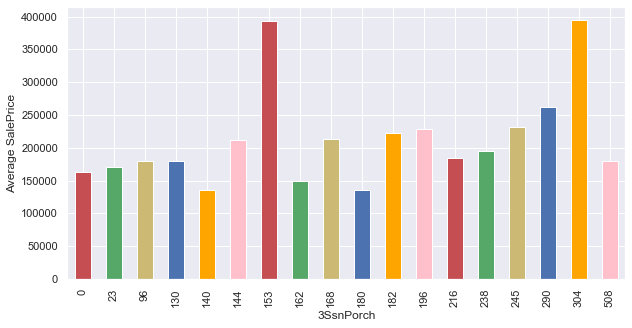

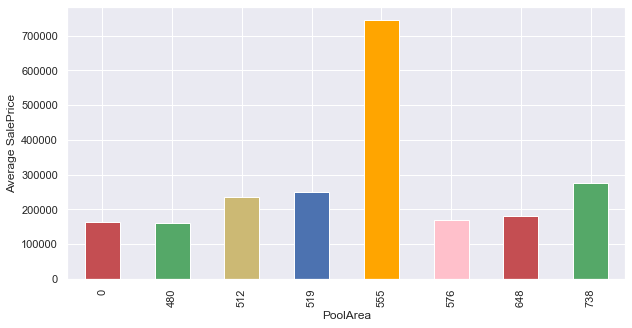

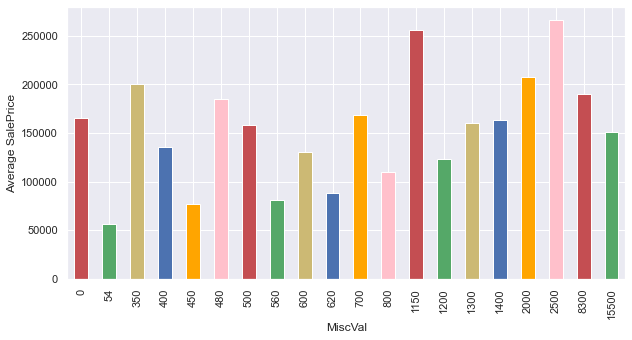

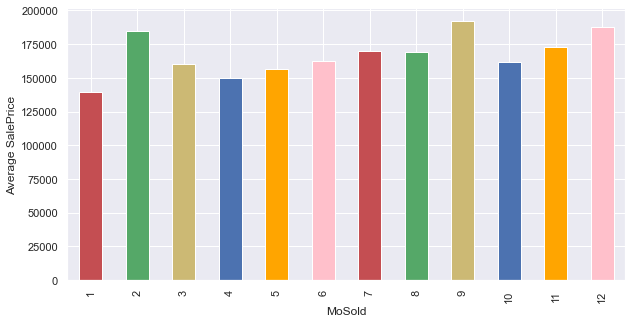

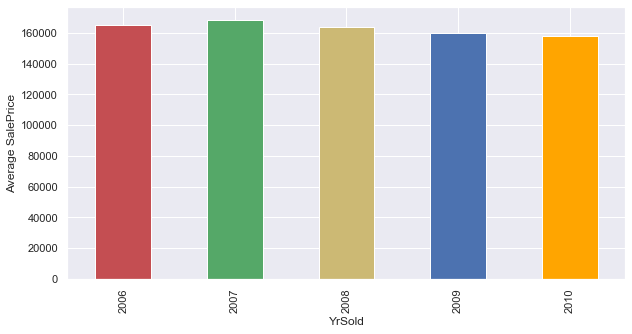

In [2114]:
# Make bar chart of discrete features and try to get some information.

for feature in discrete_features:
    train_copy = train.copy()
    train_copy.groupby(feature)["SalePrice"].median().plot.bar(color=["r","g","y","b","orange","pink"],figsize=(10,5))
    plt.xlabel(feature)
    plt.ylabel("Average SalePrice")
    plt.show()
    

1- from upper graph one thing is clear if Overall Quality is increasing from 1 to 10 than Price of House also Increasing.

2- if full Bathrooms are 3 than Price's also High.

3- In Total rooms above grade feature house price is increasing from 2 to 11 Grade but grade 12 and 14 aren't impacting the sales Price so much in comparision of 9,10,11 grade.

4- if fire places are 2 or 3 both are impacting the Price equally more Fire places doesn't mean that they would give higher sale price.

5- if garage are three price is also high but more than 3 garge aren't giving high sale prices.

In [2115]:
#check how many of unique values are present in categorical features.
for feature in categorical_features:
    print(feature,":",len(train[feature].unique()),"unique values")

MSZoning : 5 unique values
Street : 2 unique values
Alley : 3 unique values
LotShape : 4 unique values
LandContour : 4 unique values
Utilities : 1 unique values
LotConfig : 5 unique values
LandSlope : 3 unique values
Neighborhood : 25 unique values
Condition1 : 9 unique values
Condition2 : 8 unique values
BldgType : 5 unique values
HouseStyle : 8 unique values
RoofStyle : 6 unique values
RoofMatl : 8 unique values
Exterior1st : 14 unique values
Exterior2nd : 15 unique values
MasVnrType : 5 unique values
ExterQual : 4 unique values
ExterCond : 5 unique values
Foundation : 6 unique values
BsmtQual : 5 unique values
BsmtCond : 5 unique values
BsmtExposure : 5 unique values
BsmtFinType1 : 7 unique values
BsmtFinType2 : 7 unique values
Heating : 6 unique values
HeatingQC : 5 unique values
CentralAir : 2 unique values
Electrical : 5 unique values
KitchenQual : 4 unique values
Functional : 7 unique values
FireplaceQu : 6 unique values
GarageType : 7 unique values
GarageFinish : 4 unique value

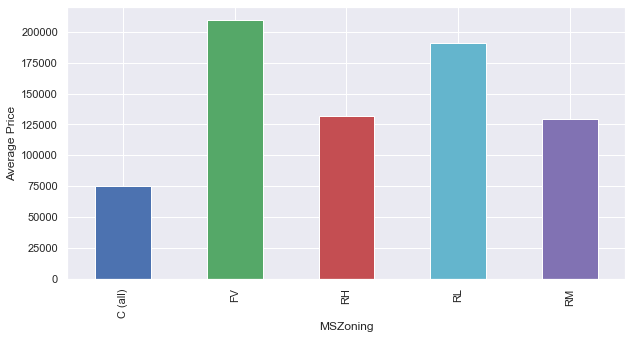

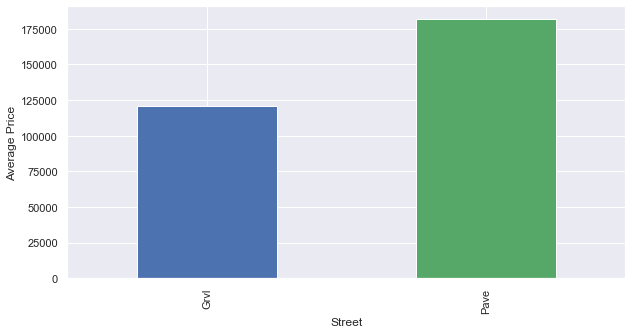

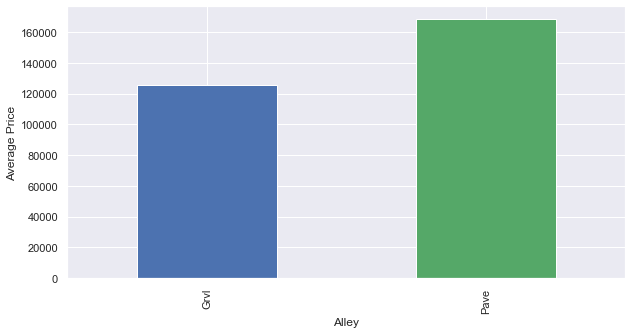

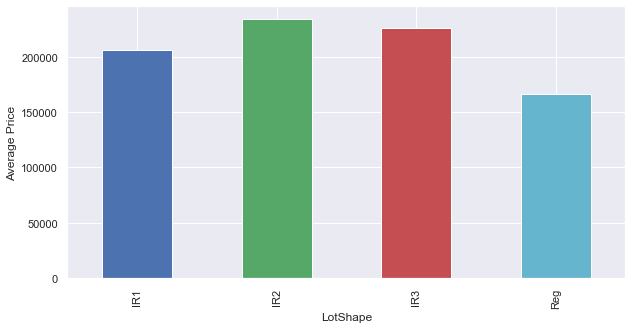

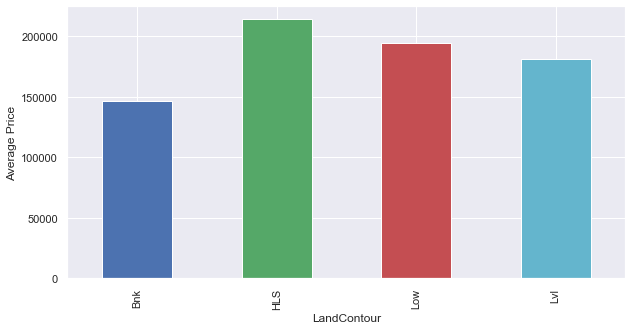

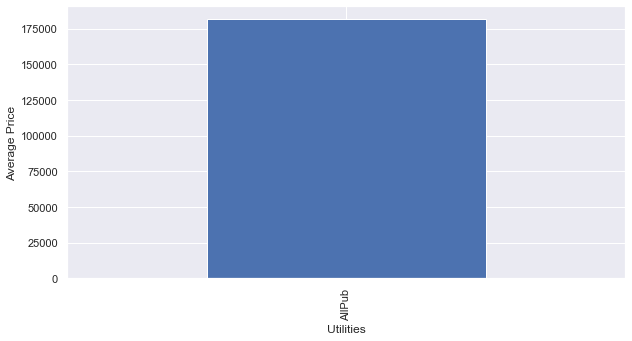

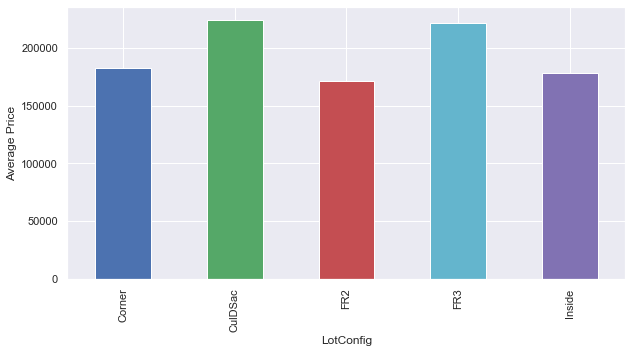

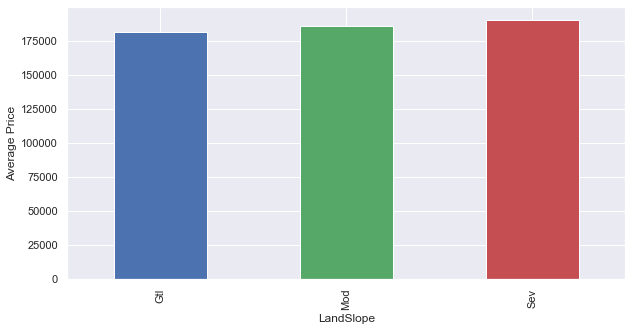

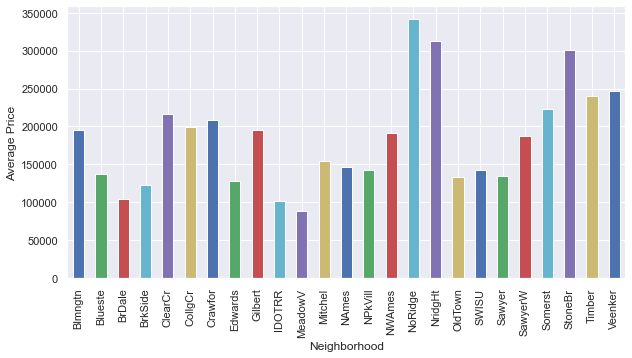

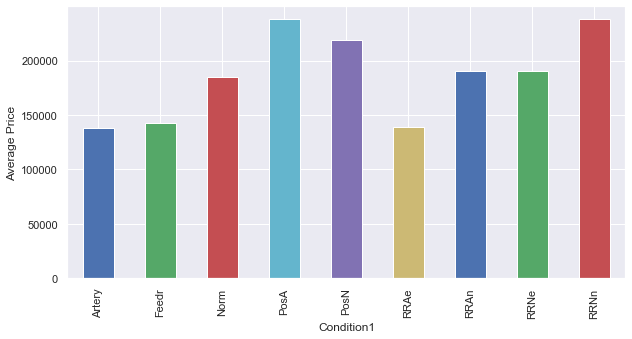

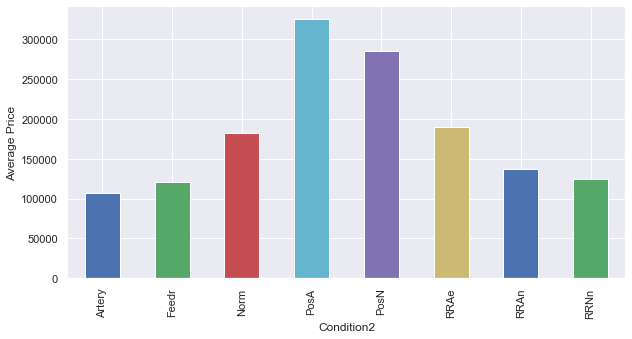

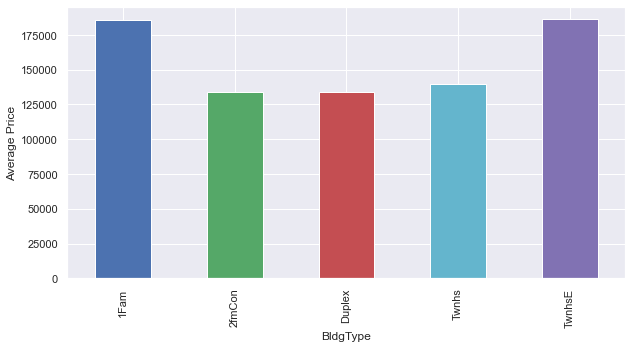

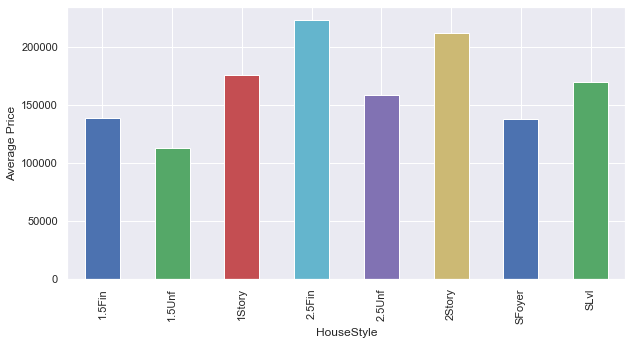

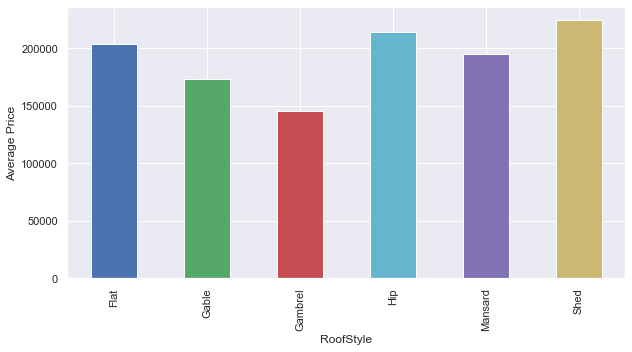

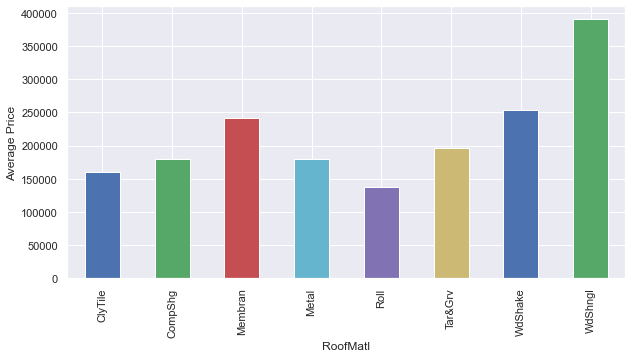

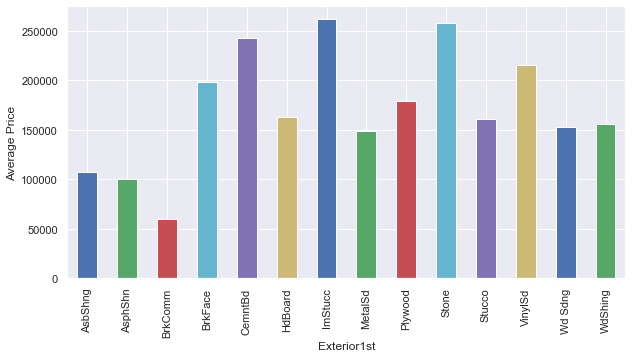

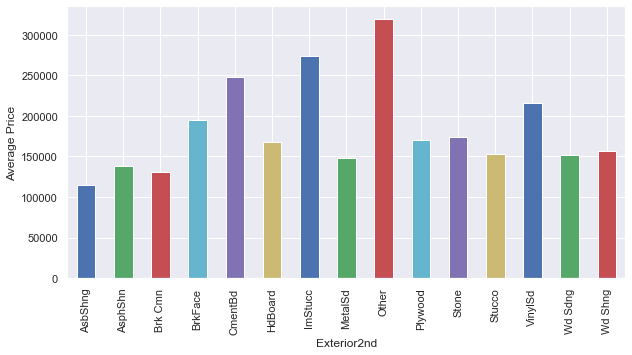

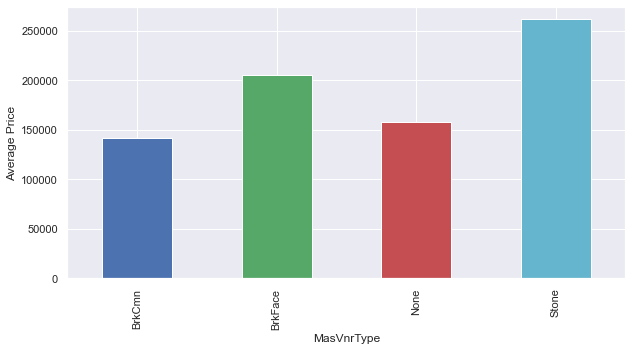

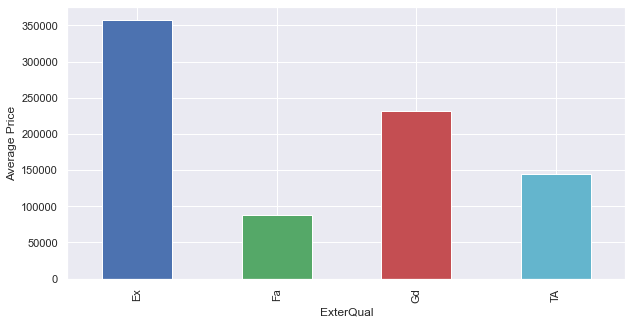

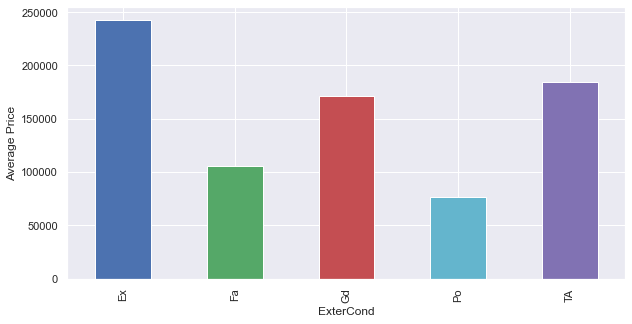

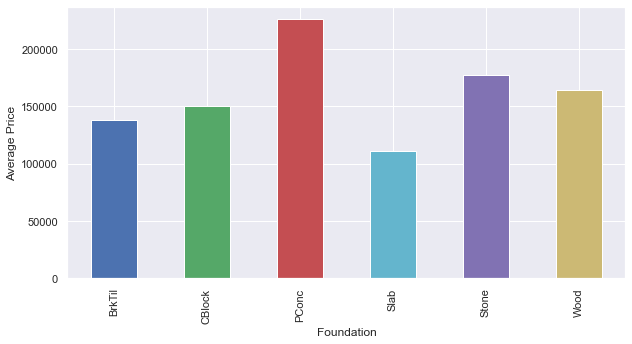

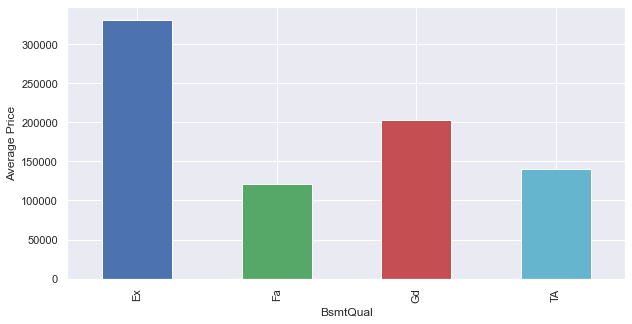

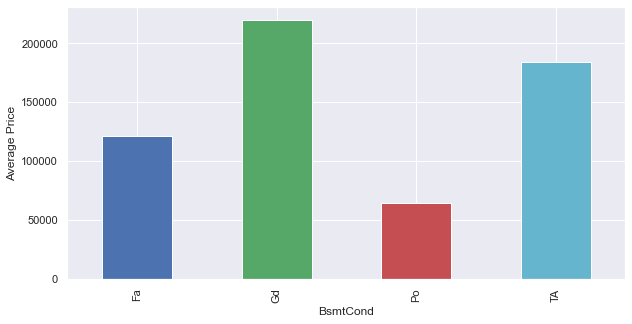

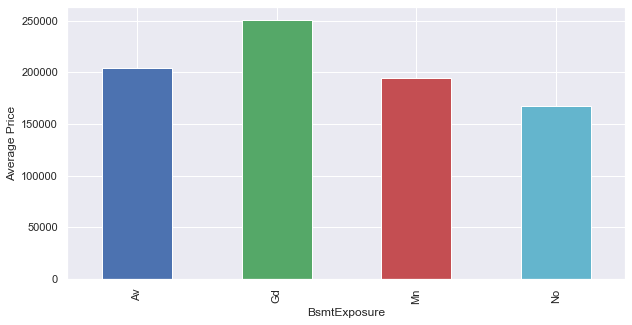

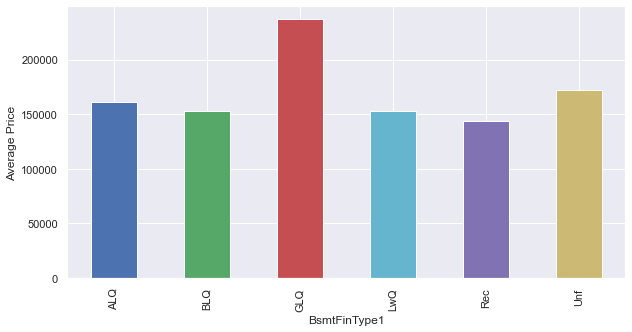

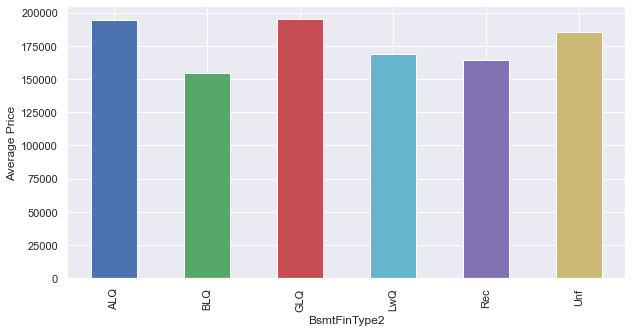

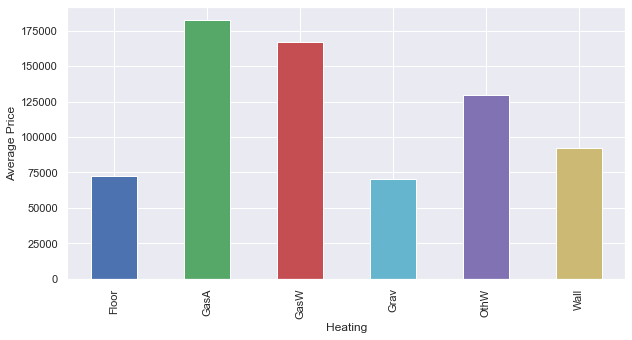

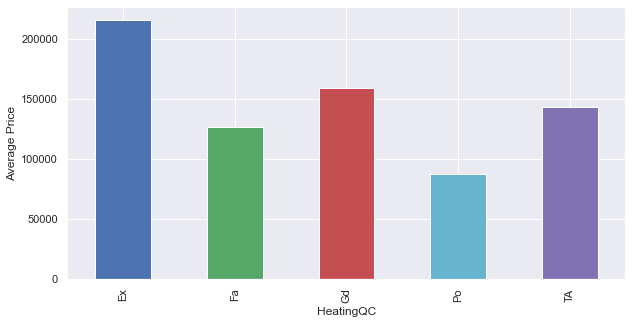

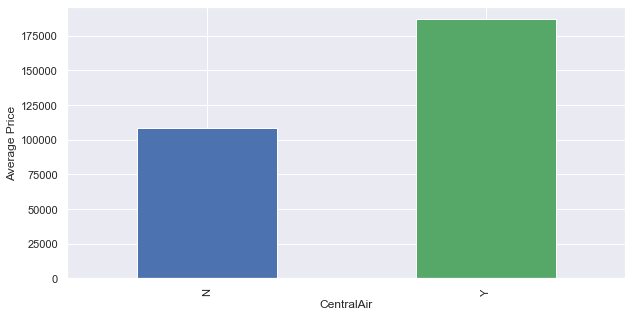

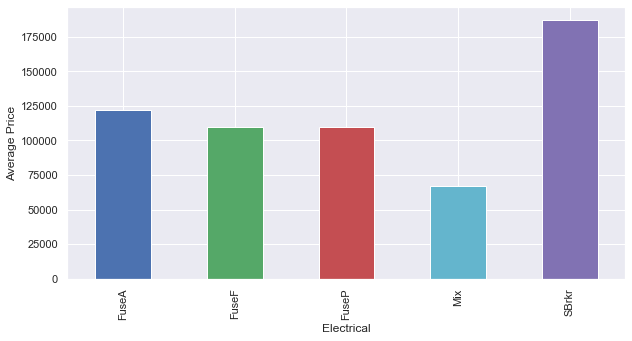

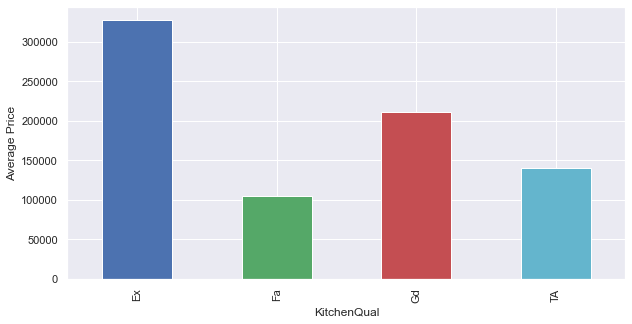

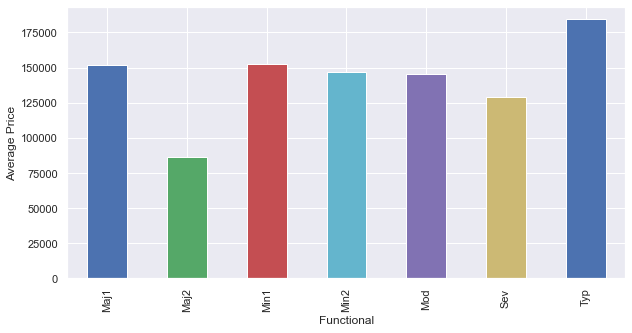

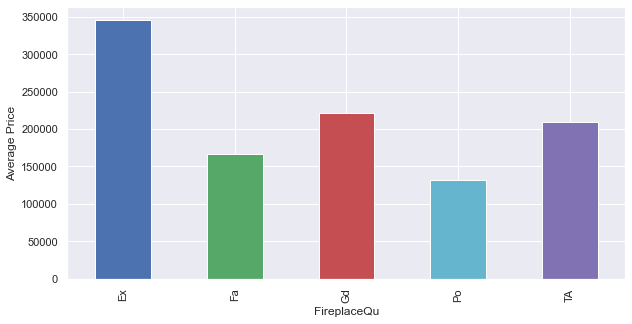

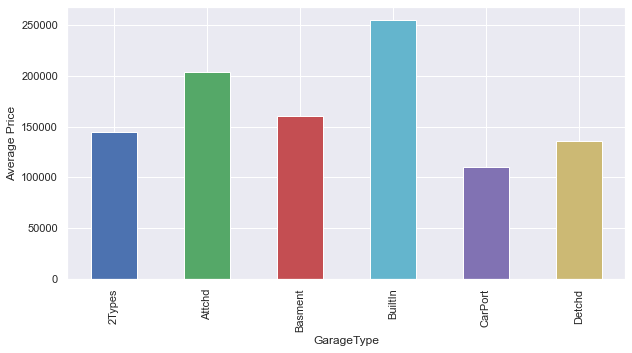

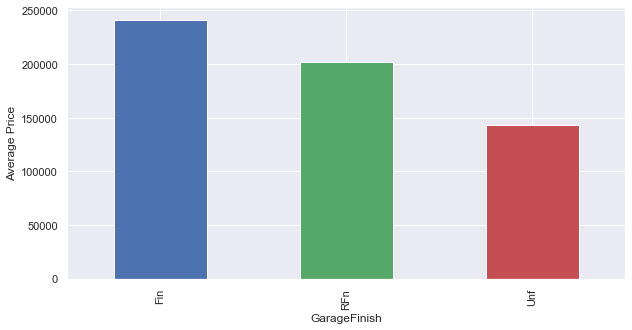

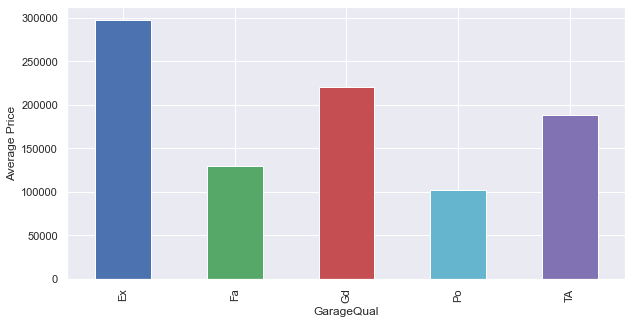

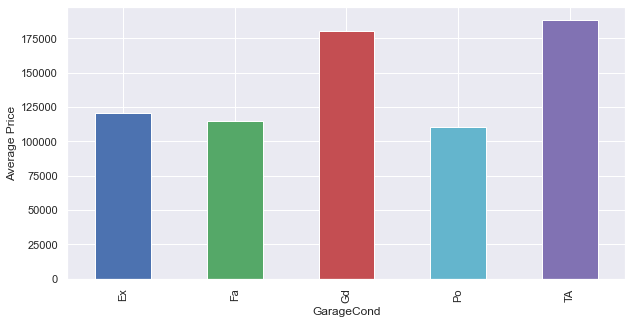

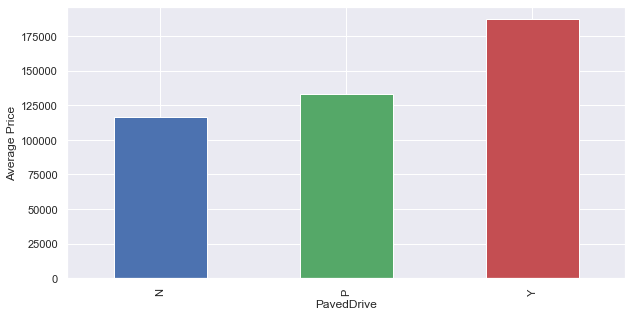

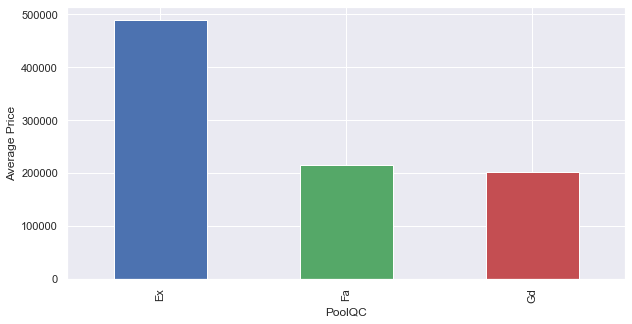

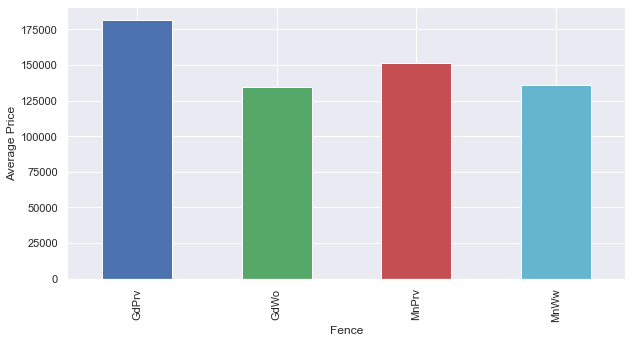

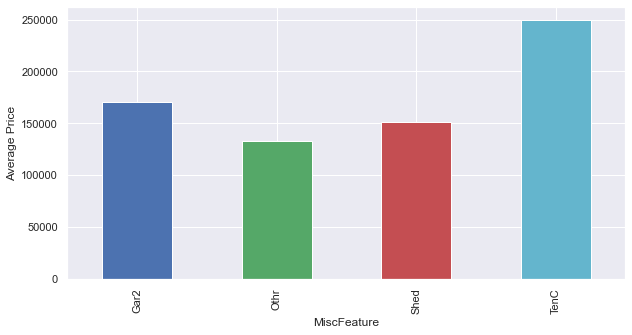

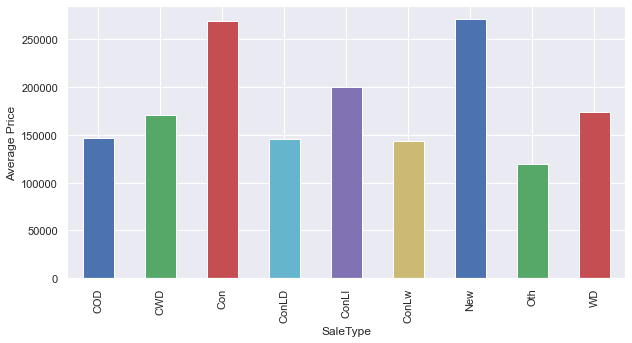

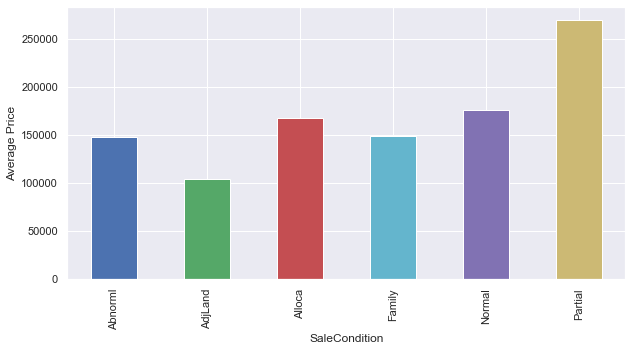

In [2116]:
for feature in categorical_features:
    train_copy = train.copy()
    train_copy.groupby(feature)["SalePrice"].mean().plot.bar(color=["b","g","r","c","m","y"],figsize=(10,5))
    plt.xlabel(feature)
    plt.ylabel("Average Price")
    plt.show()

1- from upper graph Floating Village Residential Zoning showing the Highest Selling Price it could be because Floating Residential are very expensive,Residential Low Density zoning showing 2nd Highest Price.

2- If all Type of utilities are available than Average Price is also High.

3- If Stone is used in Masonry than price is also high in comparison of Brick Common,Brick Face and Cinder Block.

4- from graph it's clear that if Exterior Quality is excellent than the House Price is also High.
5- If Central Air is also Available than the Price is also High.

<AxesSubplot:xlabel='Alley'>

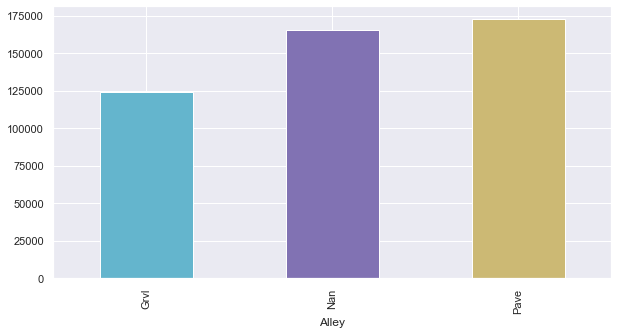

In [2117]:
train_copy = train.copy()

train_copy["Alley"] = train_copy["Alley"].fillna("Nan")


train_copy.groupby("Alley")["SalePrice"].median().plot.bar(color=["c","m","y"],figsize=(10,5))

# Bivariate Analysis

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


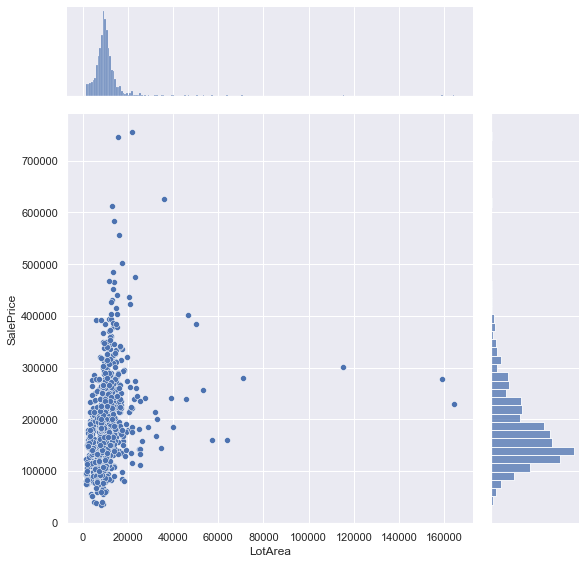

In [2118]:
# scatter and histogram between LotArea and SalePrice
sns.jointplot(train["LotArea"],train["SalePrice"],ratio=4,height=8)

if LotArea is Greater it's not mean Sale Price would also be High. and almost all data lieing between 0 to 50000 squarefeet LotArea

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


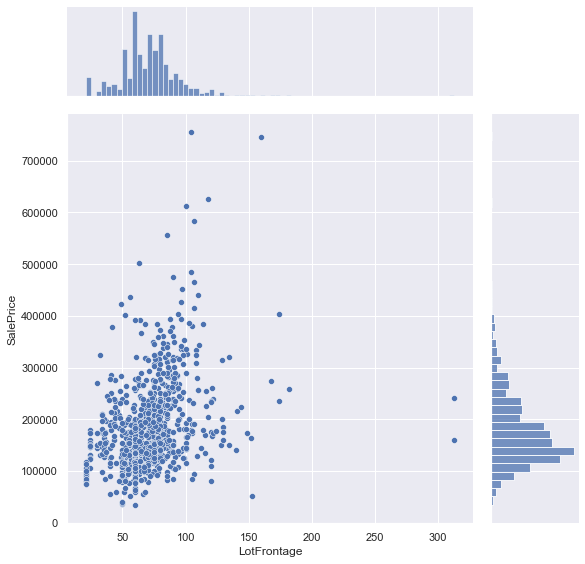

In [2119]:
# scatter and histogram between LotFrontage and SalePrice
sns.jointplot(train["LotFrontage"],train["SalePrice"],ratio=4,height=8)

Mostly all records from LotFrontage are 0 to 150 feet, Big Lot Frontage area not impacting so much the Price.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


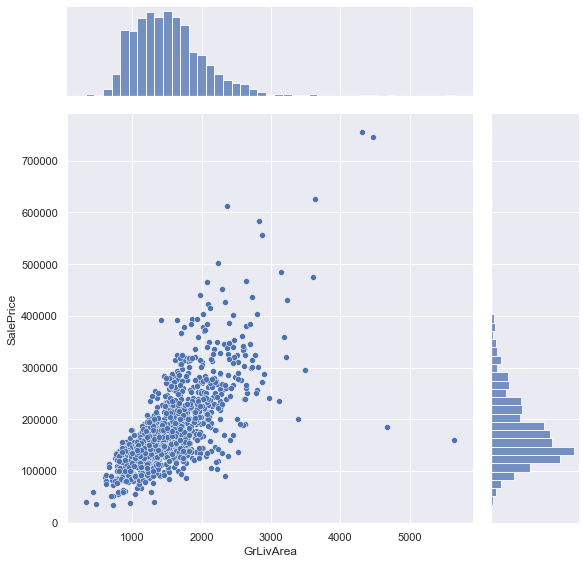

In [2120]:
# scatter and histogram between LotFrontage and SalePrice
sns.jointplot(train["GrLivArea"],train["SalePrice"],ratio=4,height=8)

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


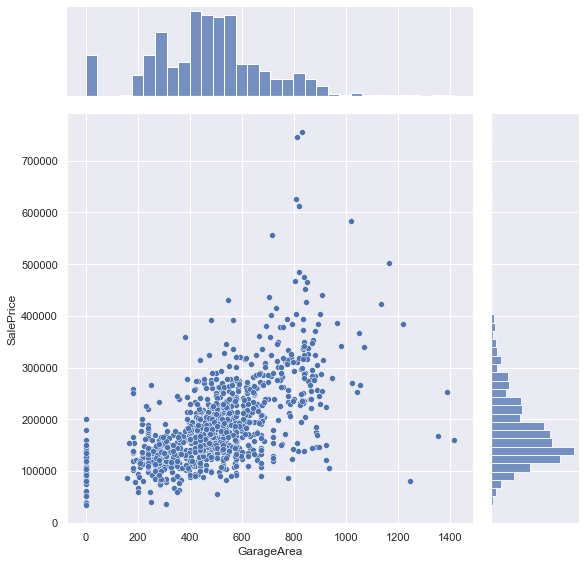

In [2121]:
# scatter and histogram between GarageArea and SalePrice
sns.jointplot(train["GarageArea"],train["SalePrice"],ratio=4,height=8)

Some House's don't have Garage Area instead of that the Price is similar to some of those have Garage Area.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

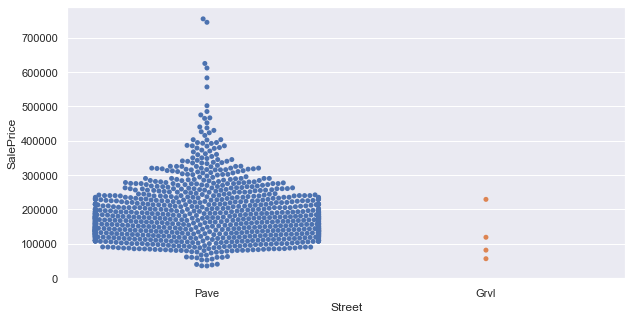

In [2122]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["Street"],train["SalePrice"])
# Mostly records are from Paved category and from Garvel category 6 records.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

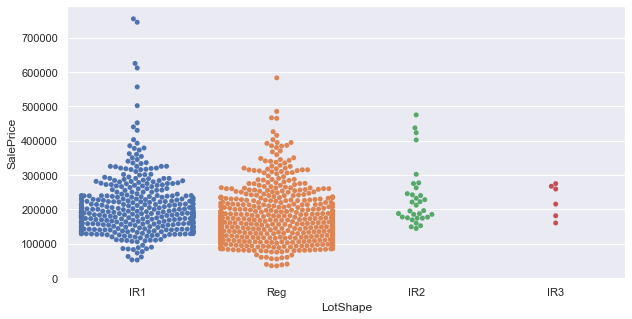

In [2123]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["LotShape"],train["SalePrice"])
# Mostly of the records in LotShape are from Regular and Slightly Regulary category and Slightly Regulary category has the Highest Sale's Price

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

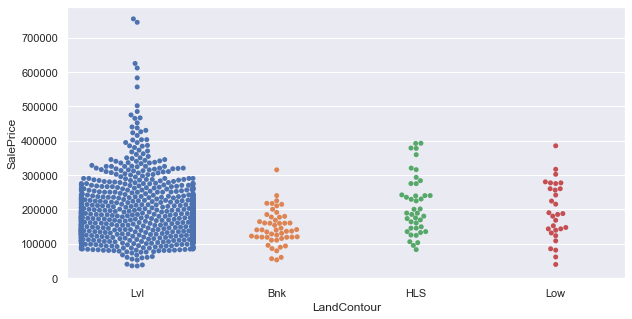

In [2124]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["LandContour"],train["SalePrice"])
# Mostly of the records in LandContour are from Level category and Level category has highest Sale's Price.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

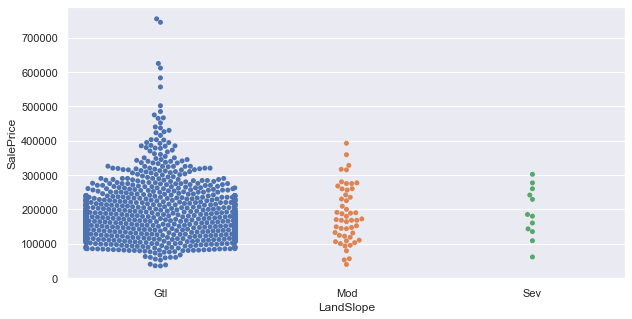

In [2125]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["LandSlope"],train["SalePrice"])
# with severe Slope Sale's Price is low, 

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

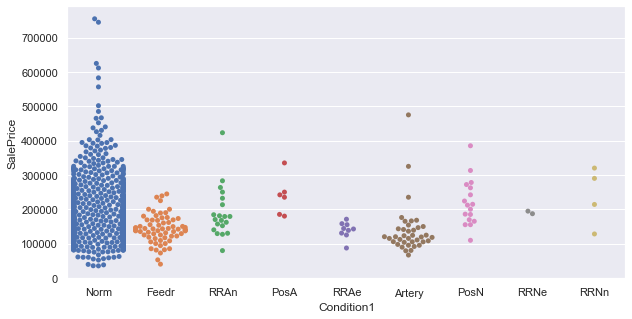

In [2126]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["Condition1"],train["SalePrice"])
# Mostly of the records in Condition1 are from Normal category and At Normal Condition Sale Price is low.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

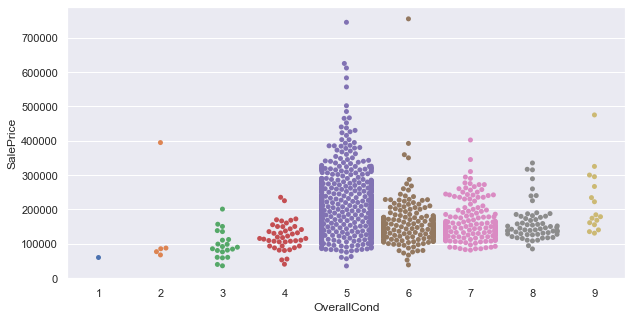

In [2127]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["OverallCond"],train["SalePrice"])
# Mostly of the records in OverallCond are from 5th Overall Condition category and as Overall Condition is increasing minimum  Sale's Price also increseing. 

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

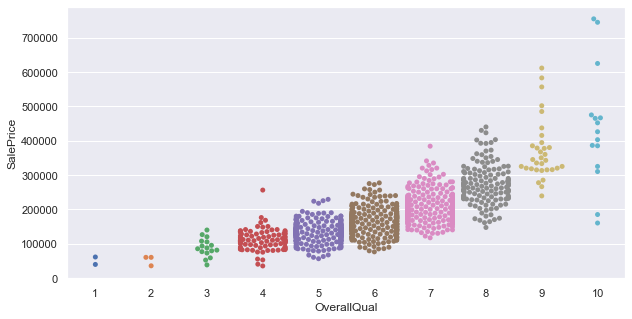

In [2128]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["OverallQual"],train["SalePrice"])

# Mostly House's are from 5th to 8th Overall Quality and can see exponentially growth in Sale's Price as Overall Quality increasing.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

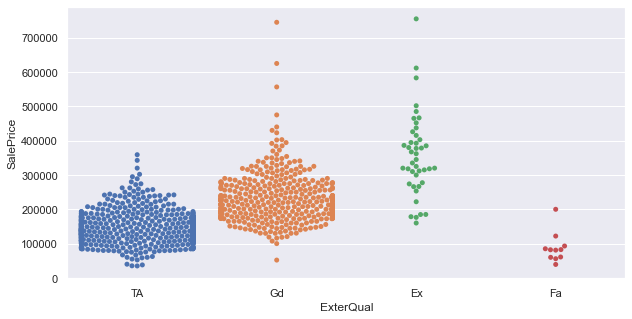

In [2129]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["ExterQual"],train["SalePrice"])

# Mostly House's are from Good and Average Exterior Quality and can see with Good and Excellent Exterior Quality House's have a High Sales Price.

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

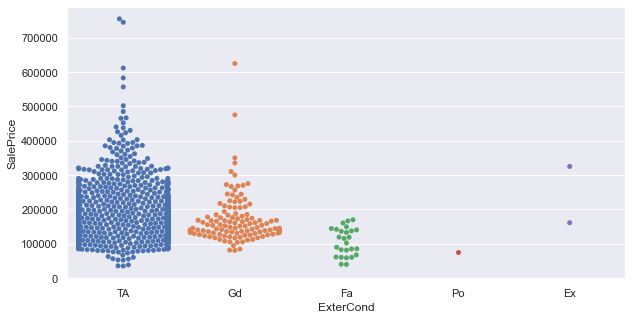

In [2130]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["ExterCond"],train["SalePrice"])

# Mostly House's are from Average Exterior Condition and can see Excelent Exterior Condition not having the High Sale's Price.

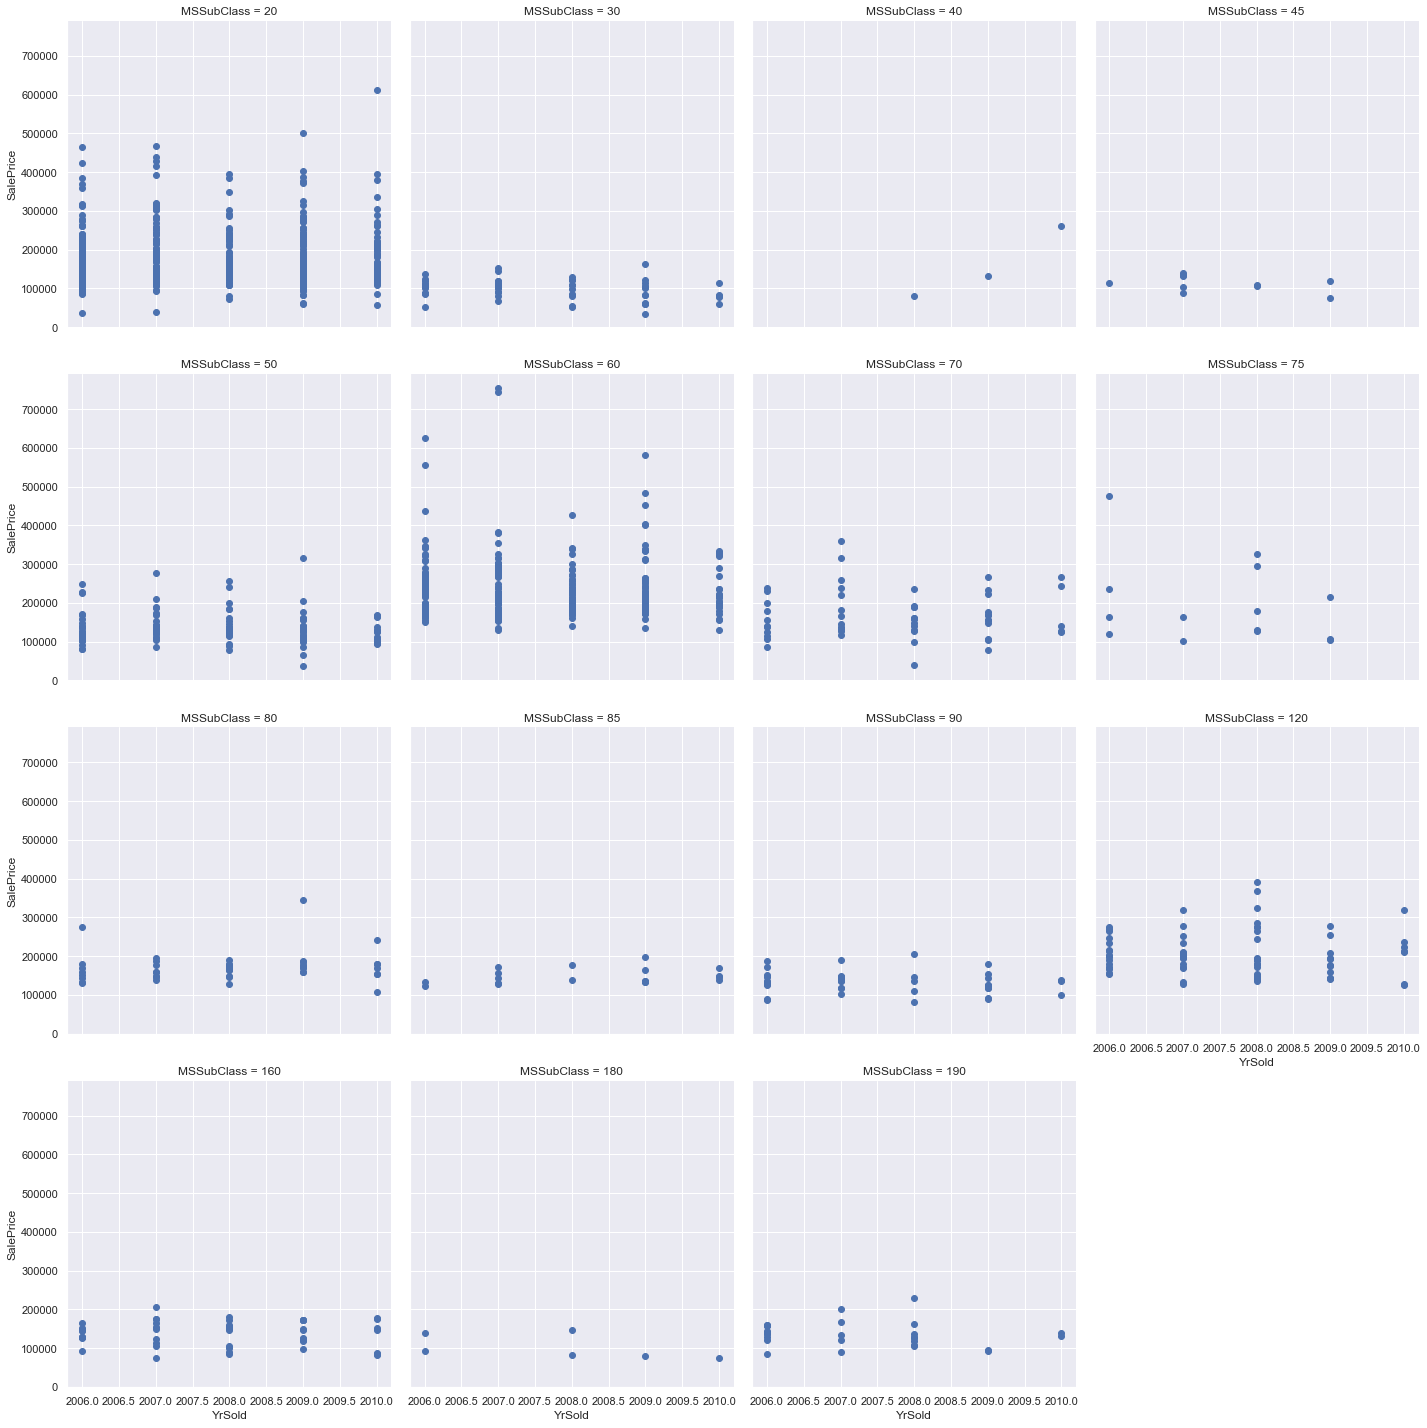

In [2131]:
#Check Sale Price for MSSubClass in every year
fg = sns.FacetGrid(train,col="MSSubClass",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

At MSSubClass 20 and 60 Sales Price are High.

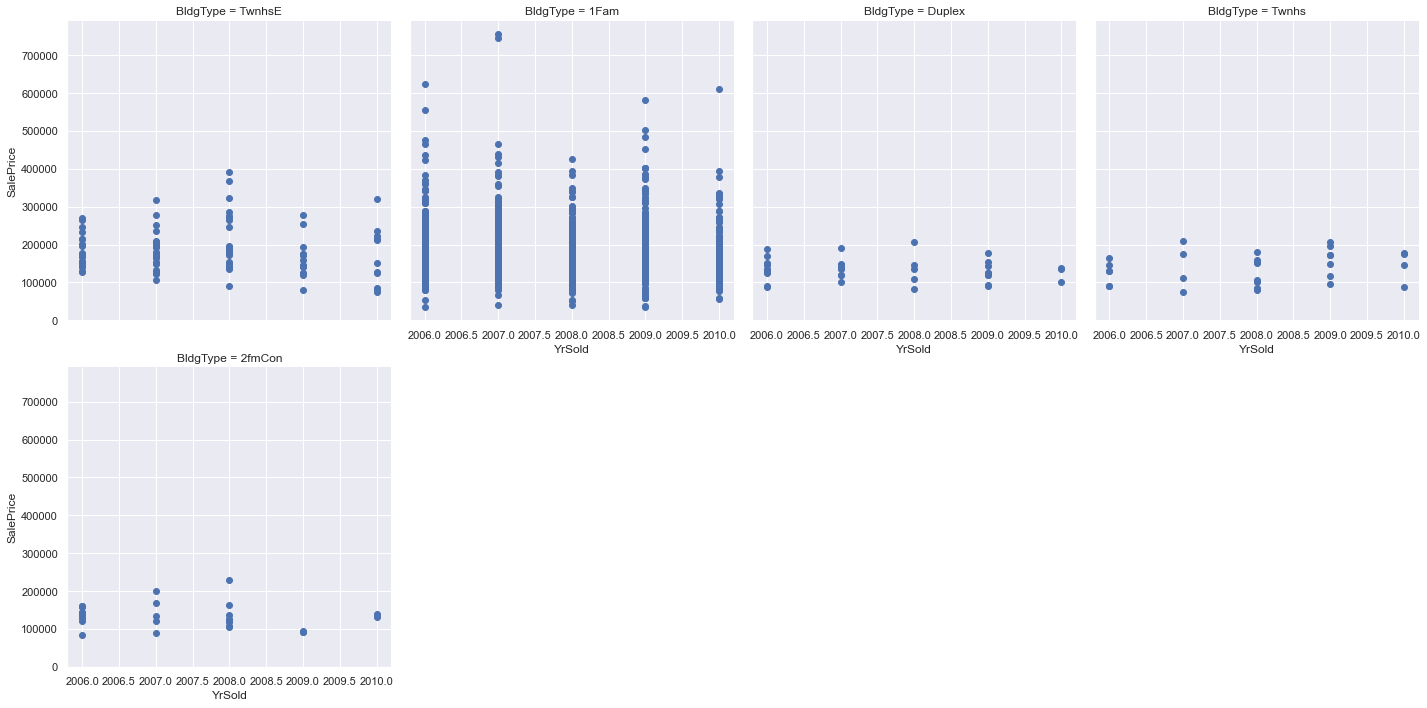

In [2132]:
#Check Sale Price for BuildingType in every year
fg = sns.FacetGrid(train,col="BldgType",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

 As can see in graph some category in BuildingType just have few records and price is also not that much, mostly records are from Single Family Detached Category

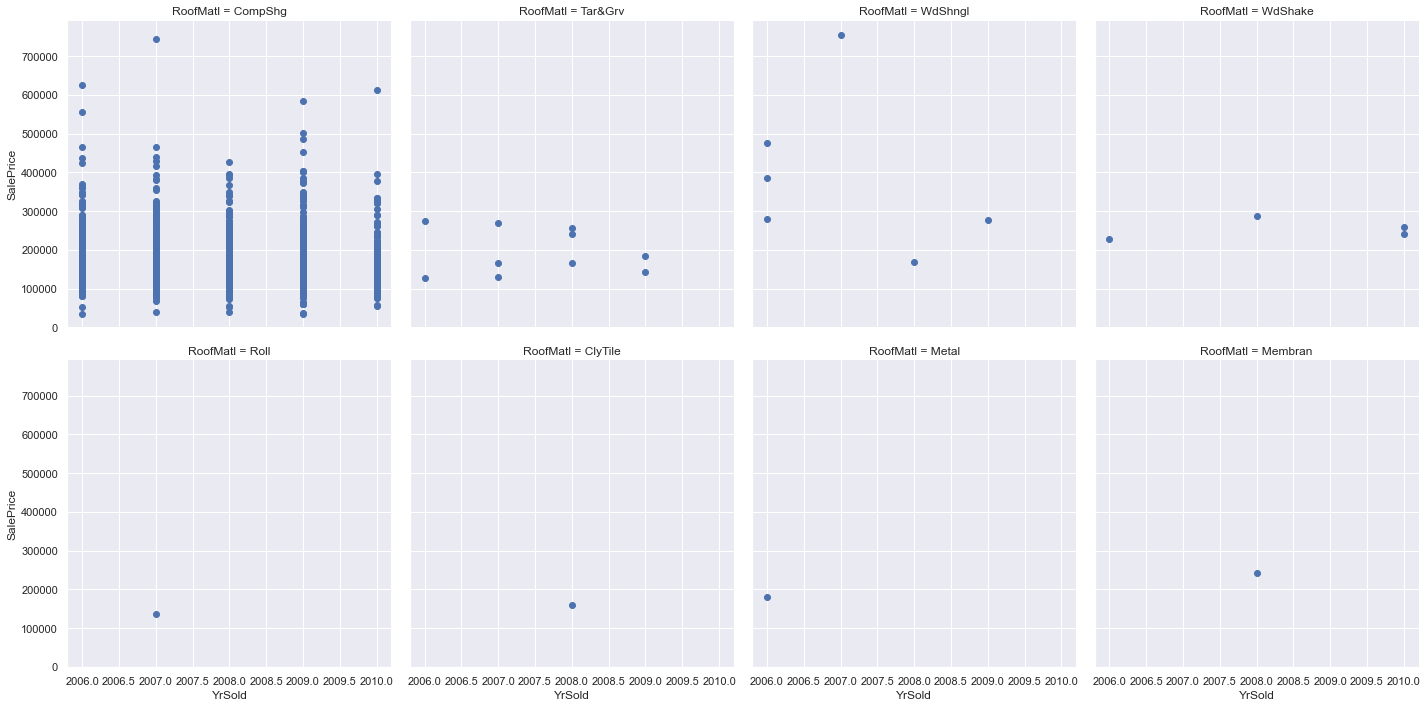

In [2133]:
#Check Sale Price for Roof material in every year
fg = sns.FacetGrid(train,col="RoofMatl",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

In Roof Material feature mostly records are from Standard Composite Shingle Category and this category has also high Sale's Prices

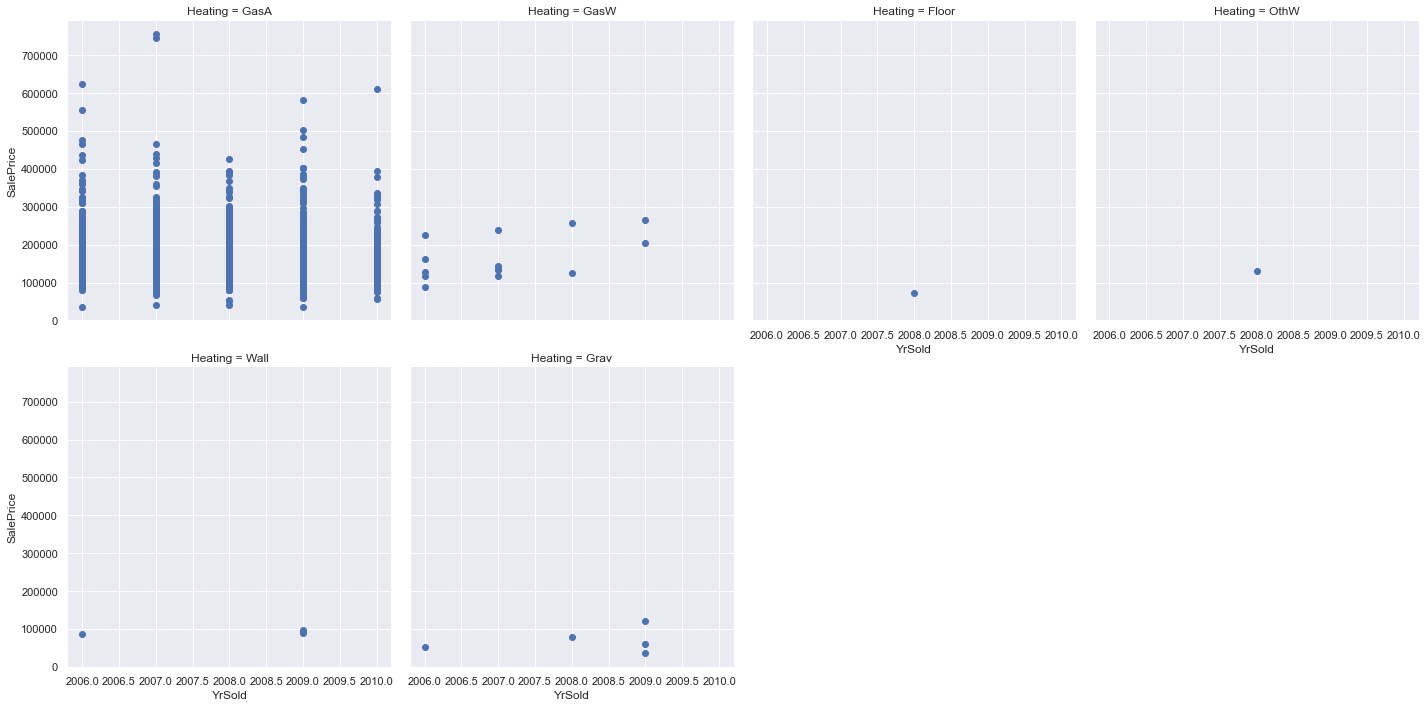

In [2134]:
#Check Sale Price forType of heating in every year
fg = sns.FacetGrid(train,col="Heating",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

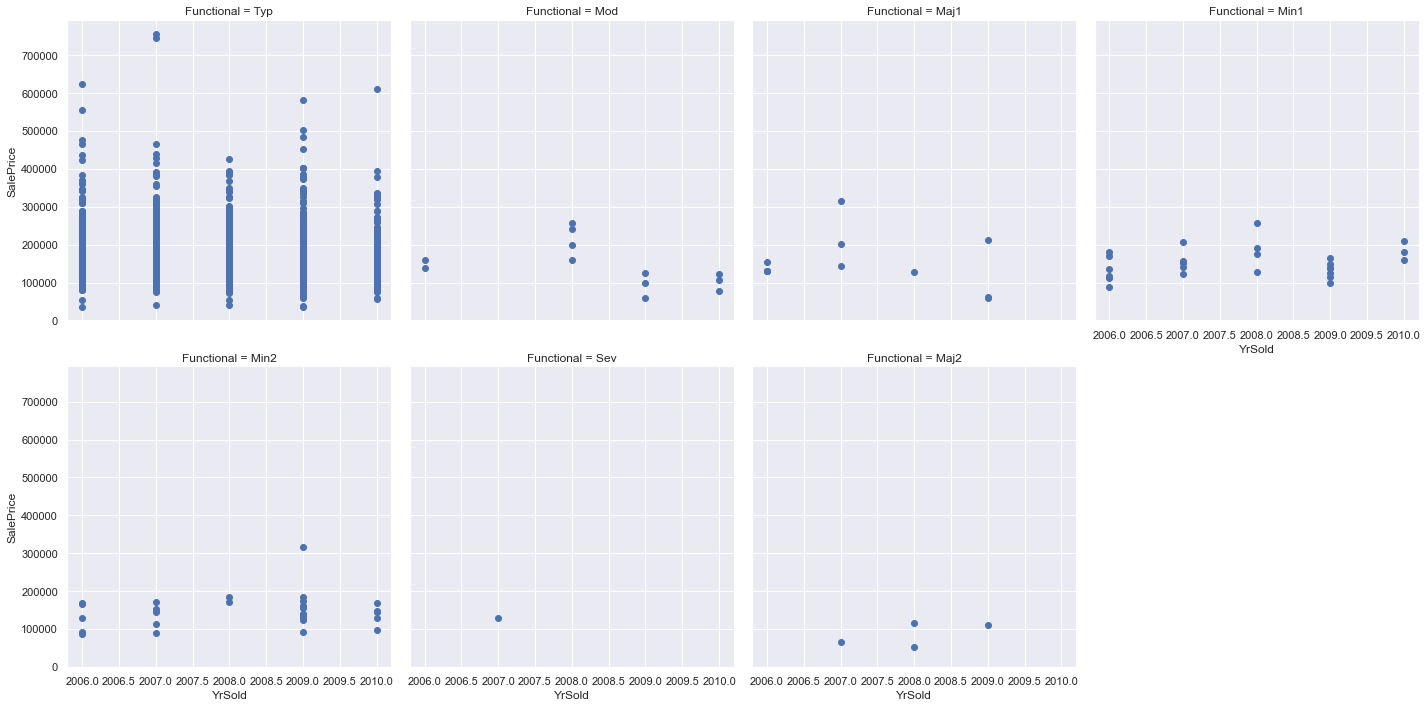

In [2135]:
#Check Sale Price for Home functionality in every year
fg = sns.FacetGrid(train,col="Functional",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

Most of records are from Typical Functionality category this category also having high Price range.

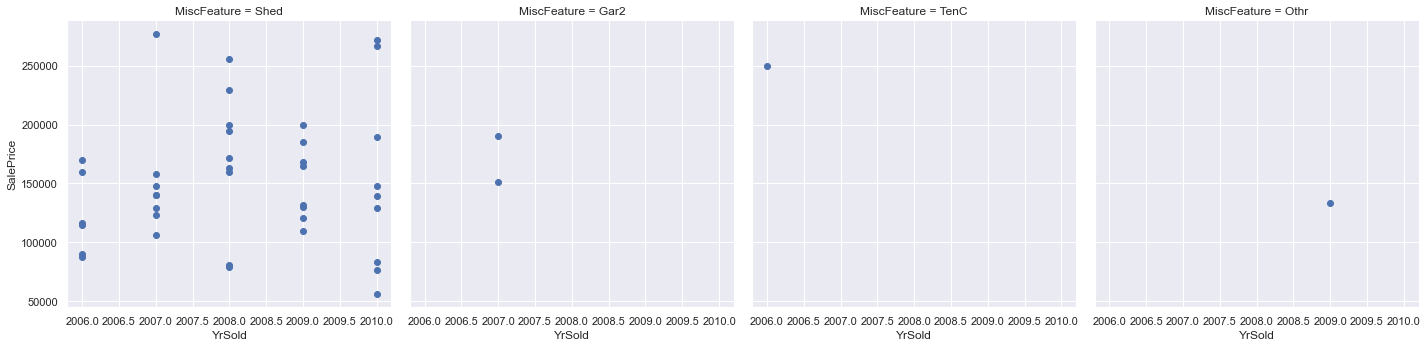

In [2136]:
#Check Sale Price for other Miscellaneous feature in each year
fg = sns.FacetGrid(train,col="MiscFeature",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

As can see from upper graph few records are having Miscellaneous feature and these feature's are Sale Price ranging between 50k to 250k it's lower price range.

# Load Test Dataset

In [2137]:
test = pd.read_csv("C:/Users/ABHISHEK/Project-Housing--2-/Project-Housing_splitted/test.csv")
test = test.drop(["Id"],axis=1)
test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            20       RL         86.0    14157   Pave   NaN      IR1   
1           120       RL          NaN     5814   Pave   NaN      IR1   
2            20       RL          NaN    11838   Pave   NaN      Reg   
3            70       RL         75.0    12000   Pave   NaN      Reg   
4            60       RL         86.0    14598   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
287          20       RL         78.0    10206   Pave   NaN      Reg   
288          20       RL         57.0     9245   Pave   NaN      IR2   
289          20       RL          NaN    11241   Pave   NaN      IR1   
290          50       RM         50.0     5000   Pave   NaN      Reg   
291         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA           No   
4          74.0        Gd        TA      PConc       Gd 

# Cleaning Train and Test Datasets


#Check Null Values by Visualization

<AxesSubplot:>

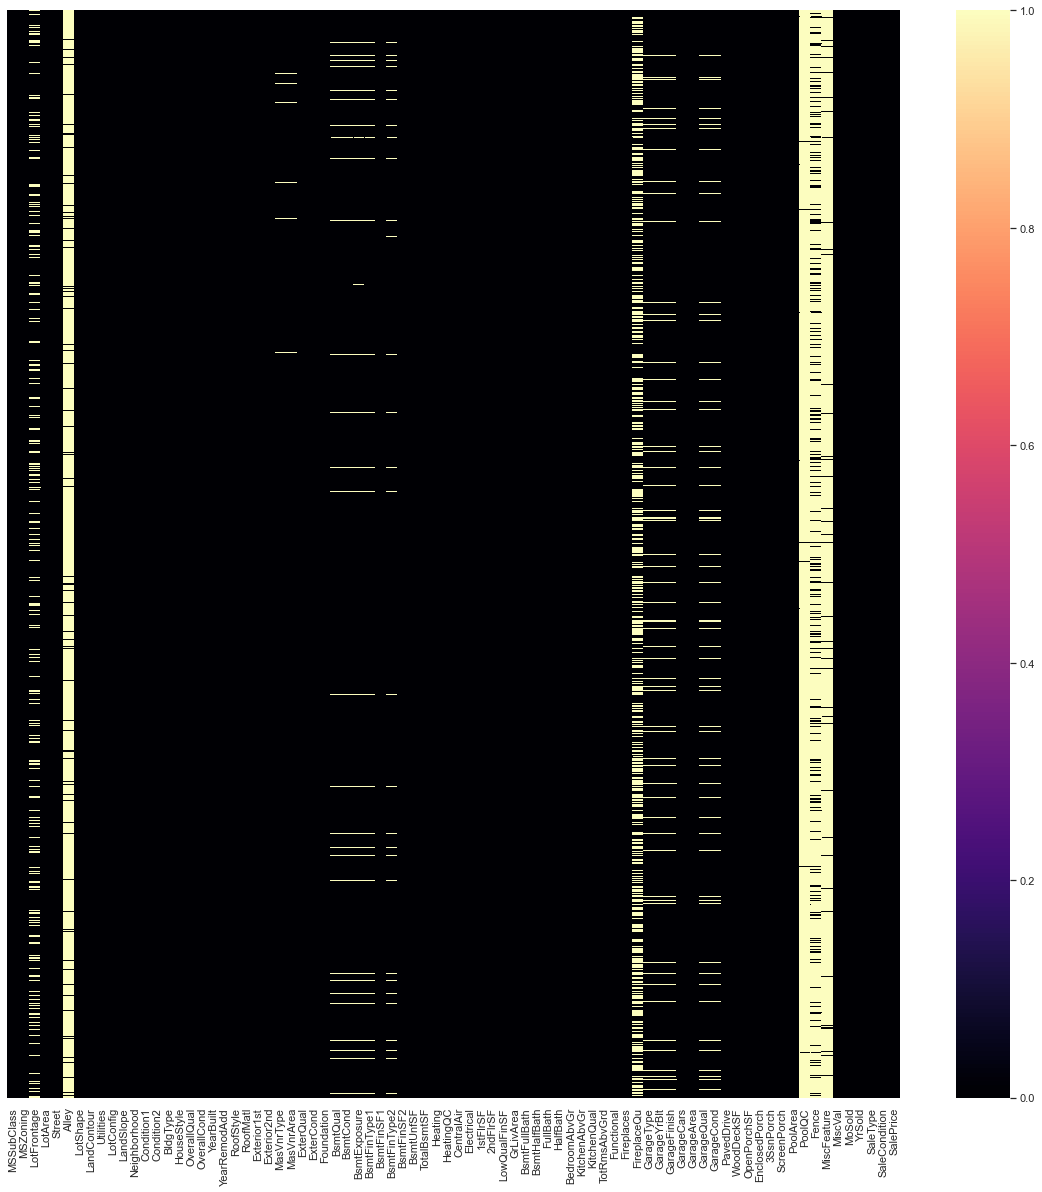

In [2138]:
plt.figure(figsize=(20,20))
sns.heatmap(train.isnull(),yticklabels=False,cmap='magma')

<AxesSubplot:>

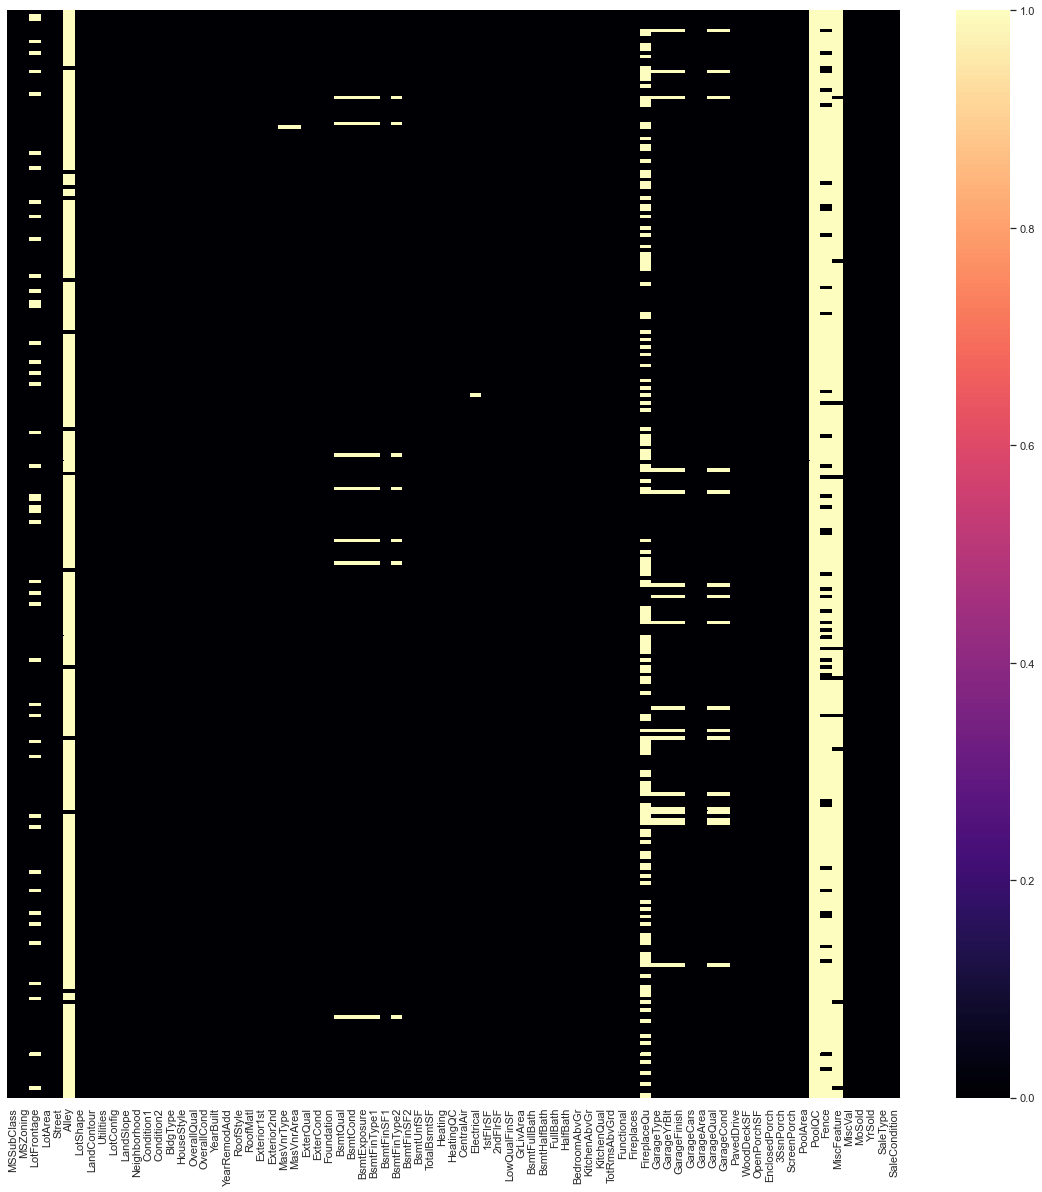

In [2139]:
plt.figure(figsize=(20,20))
sns.heatmap(test.isnull(),yticklabels=False,cmap='magma')

In [2140]:
# null values in  each columns for train:

train_nan_features = [features for features in train.columns if train[features].isnull().sum()>=1]
train_nan_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [2141]:
# null values in  each columns for test:

test_nan_features = [features for features in test.columns if test[features].isnull().sum()>=1]
test_nan_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [2142]:
train[train_nan_features].isnull().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [2143]:
test[test_nan_features].isnull().sum()

LotFrontage      45
Alley           278
MasVnrType        1
MasVnrArea        1
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinType2      7
Electrical        1
FireplaceQu     139
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
GarageCond       17
PoolQC          292
Fence           248
MiscFeature     282
dtype: int64

In [2144]:
# Percentage of null values in each NAN Columns in train
train[train_nan_features].isnull().mean()

LotFrontage     0.183219
Alley           0.934075
MasVnrType      0.005993
MasVnrArea      0.005993
BsmtQual        0.025685
BsmtCond        0.025685
BsmtExposure    0.026541
BsmtFinType1    0.025685
BsmtFinType2    0.026541
FireplaceQu     0.471747
GarageType      0.054795
GarageYrBlt     0.054795
GarageFinish    0.054795
GarageQual      0.054795
GarageCond      0.054795
PoolQC          0.994007
Fence           0.797089
MiscFeature     0.962329
dtype: float64

In [2145]:
# Percentage of null values in each NAN Columns in test
test[test_nan_features].isnull().mean()

C:\Users\ABHISHEK\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


LotFrontage     0.154110
Alley           0.952055
MasVnrType      0.003425
MasVnrArea      0.003425
BsmtQual        0.023973
BsmtCond        0.023973
BsmtExposure    0.023973
BsmtFinType1    0.023973
BsmtFinType2    0.023973
Electrical      0.003425
FireplaceQu     0.476027
GarageType      0.058219
GarageYrBlt     0.058219
GarageFinish    0.058219
GarageQual      0.058219
GarageCond      0.058219
PoolQC          1.000000
Fence           0.849315
MiscFeature     0.965753
dtype: float64

In [2146]:
# Droping those Columns have more than 80% null values in train
train = train.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)

# Droping those Columns have more than 80% null values in test
test = test.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)


#  Function to Handle Missing Value

In [2147]:
# Function for MEAN Imputing in Nan values

def impute_mean(data_frame,feature_name):
    mean_value = data_frame[feature_name].mean()
    data_frame[feature_name+"_mean"] =  data_frame[feature_name].fillna(mean_value)

In [2148]:
# Function for MEDIAN Imputing in Nan values

def impute_median(data_frame,feature_name):
    median_value = data_frame[feature_name].median()
    data_frame[feature_name+"_median"] =  data_frame[feature_name].fillna(median_value)

In [2149]:
# Second Function for MEDIAN Imputing in Nan values

def impute_median_2(data_frame,feature_name):
    median_value = data_frame[feature_name].median()
    data_frame[feature_name] = data_frame[feature_name].fillna(median_value)

In [2150]:
# For Function for MODE Imputing in Nan values

def impute_mode(data_frame,feature_name):
    mode_value = data_frame[feature_name].mode()
    data_frame[feature_name] =  data_frame[feature_name].fillna(mode_value[0])

In [2151]:
# Funtioc for Imputing Nan values by RANDOM method.

def impute_random(data_frame,feature_name):
    data_frame[feature_name+"_random"] = data_frame[feature_name]
    random_state = data_frame[feature_name].dropna().sample(data_frame[feature_name].isnull().sum(),random_state = 0)
    random_state.index =data_frame[data_frame[feature_name].isnull()].index
    data_frame.loc[data_frame[feature_name].isnull(),feature_name+"_random"] = random_state

In [2152]:
# Function for make histogram

def histogram(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

In [2153]:
# Function for make Boxplot

def boxplot(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name])

# Handling Missing Value.

In [2154]:
train_nan_features = [features for features in train.columns if train[features].isnull().sum()>=1]
train_nan_features

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [2155]:
test_nan_features = [features for features in test.columns if test[features].isnull().sum()>=1]
test_nan_features

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [2156]:
train[train_nan_features].isnull().mean()

LotFrontage     0.183219
MasVnrType      0.005993
MasVnrArea      0.005993
BsmtQual        0.025685
BsmtCond        0.025685
BsmtExposure    0.026541
BsmtFinType1    0.025685
BsmtFinType2    0.026541
FireplaceQu     0.471747
GarageType      0.054795
GarageYrBlt     0.054795
GarageFinish    0.054795
GarageQual      0.054795
GarageCond      0.054795
dtype: float64

In [2157]:
test[test_nan_features].isnull().mean()

LotFrontage     0.154110
MasVnrType      0.003425
MasVnrArea      0.003425
BsmtQual        0.023973
BsmtCond        0.023973
BsmtExposure    0.023973
BsmtFinType1    0.023973
BsmtFinType2    0.023973
Electrical      0.003425
FireplaceQu     0.476027
GarageType      0.058219
GarageYrBlt     0.058219
GarageFinish    0.058219
GarageQual      0.058219
GarageCond      0.058219
dtype: float64

In [2158]:
train_continuous_features = train.select_dtypes(include=["float64","int64"])
train_continuous_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120          NaN     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20          NaN    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20          NaN     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60          NaN     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             1976         0.0         120           0        958   
1             1970         0.0         351         823       1043   
2             1997         0.0         862           0        255   
3             1977       480.0         705           0       1139   
4             2000       126.0        1246           0        356   
...            ...         ...         ...         ...        ...   
1163          1967        31.0         450           0        432   
1164          2003         0.0           0           0          0   
1165          1976         0.0         566           0        289   
1166          1950         0.0           0           0        649   
1167          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4                8           1       1977.0           2         529   


In [2159]:
test_continuous_features = test.select_dtypes(include=["float64","int64"])
test_continuous_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120          NaN     5814            8            5       1984   
2            20          NaN    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20          NaN    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            2006       200.0        1249           0        673         1922   
1            1984         0.0        1036           0        184         1220   
2            2001         0.0           0           0       1753         1753   
3            1950         0.0         275           0        429          704   
4            2007        74.0           0           0        894          894   
..            ...         ...         ...         ...        ...          ...   
287          2007       468.0          33           0       1530         1563   
288          1995         0.0         686           0        304          990   
289          1970       180.0         578           0        426         1004   
290          1950         0.0         399           0        605         1004   
291          1973       408.0         309           0        174          483   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        1922         0             0       1922             1             0   
1        1360         0             0       1360             1             0   
2        1788         0             0       1788             0             0   
3         860       704             0       1564             0             0   
4         894      1039             0       1933             0             0   
..        ...       ...           ...        ...           ...           ...   
287      1563         0             0       1563             0             0   
288       990         0             0        990             0             1   
289      1004         0             0       1004             1             0   
290      1004       660             0       1664             0             0   
291       483       504             0        987             0             0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           2         0             3             1             8           1   
1           1         0             1             1             4           1   
2           2         0             3             1             7           1   
3           1         1             3             1             7           1   
4           2         1             4             1             9           1   
..        ...       ...           ...           ...           ...         ...   
287         2         0             3             1             6           1   
288         1         0             3             1             5           0   
289         1         0             2             1             5           1   
290         2         0             3             1             7           2   
291         1         1             2             1             5           0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2005.0           3         676         178           51   
1         1984.0       

In [2160]:
train_continuous_nan_features = [feature for feature in train_continuous_features.columns if train_continuous_features[feature].isnull().sum()>=1]
train_continuous_nan_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [2161]:
test_continuous_nan_features = [feature for feature in test_continuous_features.columns if test_continuous_features[feature].isnull().sum()>=1]
test_continuous_nan_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [2162]:
train_categorical_features = train.select_dtypes(include=["object"])
train_categorical_features

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1163       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock      NaN      NaN          NaN          NaN          NaN   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [2163]:
test_categorical_features =test.select_dtypes(include=["object"])
test_categorical_features

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0         RL   Pave      IR1         HLS    AllPub    Corner       Gtl   
1         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
2         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
3         RL   Pave      Reg         Bnk    AllPub    Inside       Gtl   
4         RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
..       ...    ...      ...         ...       ...       ...       ...   
287       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
288       RL   Pave      IR2         Lvl    AllPub    Inside       Gtl   
289       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
290       RM   Pave      Reg         Lvl    AllPub    Corner       Gtl   
291       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0        StoneBr       Norm       Norm     1Fam     1Story       Hip  CompShg   
1        StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
2        CollgCr       Norm       Norm     1Fam     1Story       Hip  CompShg   
3        Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4        Somerst      Feedr       Norm     1Fam     2Story     Gable  CompShg   
..           ...        ...        ...      ...        ...       ...      ...   
287      Somerst       Norm       Norm     1Fam     1Story     Gable  CompShg   
288      CollgCr       Norm       Norm     1Fam     1Story     Gable  CompShg   
289        NAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   
290      BrkSide      Feedr       Norm     1Fam     1.5Fin     Gable  CompShg   
291       BrDale       Norm       Norm    Twnhs     2Story     Gable  CompShg   

    Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0       VinylSd     VinylSd      Stone        Gd        TA      PConc   
1       HdBoard     HdBoard       None        Gd        TA     CBlock   
2       VinylSd     VinylSd       None        Gd        TA      PConc   
3       MetalSd     MetalSd       None        TA        TA     CBlock   
4       VinylSd     VinylSd      Stone        Gd        TA      PConc   
..          ...         ...        ...       ...       ...        ...   
287     VinylSd     VinylSd      Stone        TA        TA      PConc   
288     VinylSd     VinylSd       None        TA        TA      PConc   
289     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock   
290     CemntBd     CmentBd       None        TA        Gd     CBlock   
291     HdBoard     HdBoard    BrkFace        TA        TA     CBlock   

    BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
0         Ex       TA           Gd          GLQ          Unf    GasA   
1         Gd       TA           Av          GLQ          Unf    GasA   
2         Gd       TA           Av          Unf          Unf    GasA   
3         TA       TA           No          Rec          Unf    GasA   
4         Gd       TA           Mn          Unf          Unf    GasA   
..       ...      ...          ...          ...          ...     ...   
287       Gd       TA           No          GLQ          Unf    GasA   
288       Gd       TA           No          GLQ          Unf    GasA   
289       TA       TA           No          ALQ          Unf    GasA   
290       TA       TA           No          ALQ          Unf    GasA   
291       TA       Fa           No          BLQ          Unf    GasA   

    HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
0          Ex          Y      SBrkr          Gd        Typ          Gd   
1          Gd          Y      SBrkr          Gd        Typ          Ex   
2          Ex          Y      SBrkr          Ex        Typ          TA   
3          Ex          Y      SBrkr          Fa        Typ          Gd   
4          Ex          Y      

In [2164]:
# null values in categorical features for each columns for train:

train_categorical_nan_features = [features for features in train_categorical_features.columns if train_categorical_features[features].isnull().sum()>=1]

# null values in categorical features for each columns for test:

test_categorical_nan_features = [features for features in test_categorical_features.columns if test_categorical_features[features].isnull().sum()>=1]


In [2165]:
# null values in categorical features for each columns for train:

train_categorical_nan_features = [features for features in train_categorical_features.columns if train_categorical_features[features].isnull().sum()>=1]


# null values in categorical features for each columns for test:

test_categorical_nan_features = [features for features in test_categorical_features.columns if test_categorical_features[features].isnull().sum()>=1]


In [2166]:
# Percentage of null values in categorical features for each columns

train[train_categorical_nan_features].isnull().mean()

# Percentage of null values in categorical features for each columns

test[test_categorical_nan_features].isnull().mean()

MasVnrType      0.003425
BsmtQual        0.023973
BsmtCond        0.023973
BsmtExposure    0.023973
BsmtFinType1    0.023973
BsmtFinType2    0.023973
Electrical      0.003425
FireplaceQu     0.476027
GarageType      0.058219
GarageFinish    0.058219
GarageQual      0.058219
GarageCond      0.058219
dtype: float64

#some categorical features are having null values, reason could be for null values is some of House's don't have these category for Example Fire place Quality feature having lots of nan because some house's don't have Fire Place's so there Quality would have Nan. 
so fill all these categorical feature with new category .

In [2167]:
#MasVnrType feature
train[train["MasVnrType"].isna()]


test[test["MasVnrType"].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
31          20       RL         67.0    10083   Pave      Reg         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
31    AllPub    Inside       Gtl      SawyerW       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
31     1Story            7            5       2003          2003     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
31  CompShg     VinylSd     VinylSd        NaN         NaN        Gd   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
31        TA      PConc       Gd       TA           No          GLQ   

    BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
31         833          Unf           0        343         1176    GasA   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
31        Ex          Y      SBrkr      1200         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
31       1200             1             0         2         0             2   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
31             1          Gd             5        Typ           0         NaN   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
31     Attchd       2003.0          RFn           2         555         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
31         TA          Y           0           41              0          0   

    ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
31            0         0        0       8    2009       WD        Normal

In [2168]:
# MasVnrType and MasVnrArea both feature have some relation.

In [2169]:
train["MasVnrType"].isna().sum()


7

In [2170]:
test["MasVnrType"].isna().sum()

1

In [2171]:
train["MasVnrArea"].isna().sum()

7

In [2172]:
test["MasVnrArea"].isna().sum()

1

In [2173]:
# fill nan value in MasVnrType by new category in train
train["MasVnrType"] = train["MasVnrType"].fillna("None")

# fill nan value in MasVnrType by new category in test
test["MasVnrType"] = test["MasVnrType"].fillna("None")

In [2174]:
# fill nan value in MasVnrArea by 0 in train
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

# fill nan value in MasVnrArea by 0 in test
test["MasVnrArea"] =test["MasVnrArea"].fillna(0)

In [2175]:
# fill na in FireplaceQu feature by No Fireplace in train
train["FireplaceQu"] = train["FireplaceQu"].fillna("No Fireplace")

# fill na in FireplaceQu feature by No Fireplace in test
test["FireplaceQu"] = test["FireplaceQu"].fillna("No Fireplace")

In [2176]:
# Some of House's don't have Basement so fill nan by No Basement in some feature like BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2

train["BsmtQual"] = train["BsmtQual"].fillna("No Basement")
train["BsmtCond"] = train["BsmtCond"].fillna("No Basement")
train["BsmtExposure"] = train["BsmtExposure"].fillna("No Basement")
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("No Basement")
train["BsmtFinType2"] = train["BsmtFinType2"].fillna("No Basement")




# Some of House's don't have Basement so fill nan by No Basement in some feature like BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2

test["BsmtQual"] = test["BsmtQual"].fillna("No Basement")
test["BsmtCond"] = test["BsmtCond"].fillna("No Basement")
test["BsmtExposure"] = test["BsmtExposure"].fillna("No Basement")
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("No Basement")
test["BsmtFinType2"] = test["BsmtFinType2"].fillna("No Basement")

In [2177]:
# Similarly fill nan in Continous features related to Basement by 0 because some of House don't have basement in train
train["BsmtFinSF1"] = train["BsmtFinSF1"].fillna(0)
train["BsmtFinSF2"] = train["BsmtFinSF2"].fillna(0)
train["BsmtUnfSF"] = train["BsmtUnfSF"].fillna(0)
train["TotalBsmtSF"] = train["TotalBsmtSF"].fillna(0)




# Similarly fill nan in Continous features related to Basement by 0 because some of House don't have basement in test
test["BsmtFinSF1"] = test["BsmtFinSF1"].fillna(0)
test["BsmtFinSF2"] = test["BsmtFinSF2"].fillna(0)
test["BsmtUnfSF"] = test["BsmtUnfSF"].fillna(0)
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(0)

In [2178]:
#BsmtHalfBath in tain
train["BsmtHalfBath"].value_counts()


#BsmtHalfBath in test
test["BsmtHalfBath"].value_counts()

0    273
1     19
Name: BsmtHalfBath, dtype: int64

In [2179]:
train[train["BsmtFullBath"].isna()]

test[test["BsmtFullBath"].isna()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

In [2180]:
# fill na value in BsmtHalfBath by 0 for train
train["BsmtHalfBath"] = train["BsmtHalfBath"].fillna(0)

# fill na value in BsmtHalfBath by 0 for test
test["BsmtHalfBath"] = test["BsmtHalfBath"].fillna(0)

In [2181]:
#BsmtfullBath in train
print("No. of Nan in BsmtfullBath :", train["BsmtFullBath"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["BsmtFullBath"].value_counts())


#BsmtfullBath in test
print("No. of Nan in BsmtfullBath :", test["BsmtFullBath"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["BsmtFullBath"].value_counts())

No. of Nan in BsmtfullBath : 0
***************************************
Value_Count
0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64
No. of Nan in BsmtfullBath : 0
***************************************
Value_Count
0    170
1    120
2      2
Name: BsmtFullBath, dtype: int64


In [2182]:
# fill na value in BsmtFullBath by 0 for train
train["BsmtFullBath"] = train["BsmtFullBath"].fillna(0)



# fill na value in BsmtFullBath by 0 for test
test["BsmtFullBath"] = test["BsmtFullBath"].fillna(0)

In [2183]:
# Electrical feature in train

print("No. of Nan in Electrical feature :", train["Electrical"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["Electrical"].value_counts())



# Electrical feature in test

print("No. of Nan in Electrical feature :", test["Electrical"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["Electrical"].value_counts())

No. of Nan in Electrical feature : 0
***************************************
Value_Count
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64
No. of Nan in Electrical feature : 1
***************************************
Value_Count
SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64


In [2184]:
# fill na value in Electrical by Mode in train
train["Electrical"] = train["Electrical"].fillna("SBrkr")



# fill na value in Electrical by Mode in test
test["Electrical"] = test["Electrical"].fillna("SBrkr")

In [2185]:
# Kitchen Qual feature in train

print("No. of Nan in Kitchen Qual feature :", train["KitchenQual"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["KitchenQual"].value_counts())


# Kitchen Qual feature in test

print("No. of Nan in Kitchen Qual feature :", test["KitchenQual"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["KitchenQual"].value_counts())

No. of Nan in Kitchen Qual feature : 0
***************************************
Value_Count
TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64
No. of Nan in Kitchen Qual feature : 0
***************************************
Value_Count
TA    157
Gd    108
Ex     18
Fa      9
Name: KitchenQual, dtype: int64


In [2186]:
train[train["KitchenQual"].isnull()]

test[test["KitchenQual"].isnull()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

In [2187]:
# fill na value in KitchenQual by Mode in train
train["KitchenQual"] = train["KitchenQual"].fillna("TA")

# fill na value in KitchenQual by Mode  test
test["KitchenQual"] = test["KitchenQual"].fillna("TA")

In [2188]:
# Functional feature in train

print("No. of Nan in Functional feature :", train["Functional"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["Functional"].value_counts())

# Functional feature in test

print("No. of Nan in Functional feature :", test["Functional"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["Functional"].value_counts())

No. of Nan in Functional feature : 0
***************************************
Value_Count
Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64
No. of Nan in Functional feature : 0
***************************************
Value_Count
Typ     275
Min1      6
Min2      4
Mod       3
Maj1      3
Maj2      1
Name: Functional, dtype: int64


In [2189]:
# fill na value in KitchenQual by Mode in train
train["Functional"] = train["Functional"].fillna("Typ")

# fill na value in KitchenQual by Mode in test
test["Functional"] = test["Functional"].fillna("Typ")

In [2190]:
#Some of House's don't have Garage so fill nan by No Garage in some feature like (GarageType,GarageFinish,GarageCond,GarageQual) in train

train["GarageType"] = train["GarageType"].fillna("No Garage")
train["GarageFinish"] = train["GarageFinish"].fillna("No Garage")
train["GarageCond"] = train["GarageCond"].fillna("No Garage")
train["GarageQual"] = train["GarageQual"].fillna("No Garage")


#Some of House's don't have Garage so fill nan by No Garage in some feature like (GarageType,GarageFinish,GarageCond,GarageQual) in test

test["GarageType"] = test["GarageType"].fillna("No Garage")
test["GarageFinish"] = test["GarageFinish"].fillna("No Garage")
test["GarageCond"] = test["GarageCond"].fillna("No Garage")
test["GarageQual"] = test["GarageQual"].fillna("No Garage")

In [2191]:
#GarageYrBlt in train

train["GarageYrBlt"].isnull().sum()

#GarageYrBlt in test

test["GarageYrBlt"].isnull().sum()

17

In [2192]:
train[train["GarageYrBlt"].isnull()]

test[test["GarageYrBlt"].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
5           180       RM         21.0     1936   Pave      Reg         Lvl   
16           20       RL          NaN     8780   Pave      IR1         Lvl   
23          190       RM         70.0     5600   Pave      Reg         Lvl   
123          90       RL         60.0     9000   Pave      Reg         Lvl   
129         190       RM         33.0     4456   Pave      Reg         Lvl   
154          20       RL         50.0     9405   Pave      Reg         Lvl   
157          50       RL        138.0    18030   Pave      IR1         Bnk   
164          50       RM         60.0     5586   Pave      IR1         Bnk   
187          45       RM         55.0     4388   Pave      IR1         Bnk   
193          30       RL         58.0     9098   Pave      IR1         Lvl   
195          30       RL         45.0     8248   Pave      Reg         Lvl   
210          30       RM         40.0     3880   Pave      Reg         Lvl   
214          30       RL         56.0     4060   Pave      Reg         Lvl   
215          70       RM         50.0     5250   Pave      Reg         Lvl   
217          90       RL         92.0    12108   Pave      Reg         Lvl   
218          20       RL         60.0     8070   Pave      Reg         Lvl   
256          50       RM         85.0     8500   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
5      AllPub    Inside       Gtl      MeadowV       Norm       Norm    Twnhs   
16     AllPub    Corner       Gtl      Mitchel       Norm       Norm     1Fam   
23     AllPub    Inside       Gtl       IDOTRR       Norm       Norm   2fmCon   
123    AllPub       FR2       Gtl        NAmes       Norm       Norm   Duplex   
129    AllPub    Inside       Gtl      OldTown       Norm       Norm   2fmCon   
154    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam   
157    AllPub    Inside       Gtl      ClearCr       Norm       Norm     1Fam   
164    AllPub    Inside       Gtl      OldTown      Feedr       Norm     1Fam   
187    AllPub    Inside       Gtl      OldTown      Feedr       Norm     1Fam   
193    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam   
195    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam   
210    AllPub    Inside       Gtl      OldTown       Norm       Norm     1Fam   
214    AllPub    Corner       Gtl      Edwards      Feedr       Norm     1Fam   
215    AllPub    Inside       Gtl      OldTown       Norm       Norm     1Fam   
217    AllPub    Inside       Gtl      Edwards       Norm       Norm   Duplex   
218    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
256    AllPub    Corner       Gtl       IDOTRR     Artery       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
5       SFoyer            4            6       1970          1970     Gable   
16      1Story            5            5       1985          1985     Gable   
23      2Story            4            5       1930          1950       Hip   
123     2Story            5            5       1974          1974     Gable   
129     2Story            4            5       1920          2008     Gable   
154     1Story            5            9       1947          2008       Hip   
157     1.5Fin            5            6       1946          1994     Gable   
164     1.5Fin            6            7       1920          1998     Gable   
187     1.5Unf            5            7       1930          1950     Gable   
193     1Story            4            7       1920          2002     Gable   
195     1Story            3            3       1914          1950     Gable   
210     1Story            5            9       1945          1997     Gable   
214     1Story            5            8       1922          1950     Gable   
215     2Story            8        

In [2193]:
# In some of house's has no garage than GarageYrBlt should be zero it's continuous feature can't assign no garage in train
train["GarageYrBlt"]=train["GarageYrBlt"].fillna(0)

# In some of house's has no garage than GarageYrBlt should be zero it's continuous feature can't assign no garage in test
test["GarageYrBlt"]=test["GarageYrBlt"].fillna(0)

In [2194]:
# Similarly GarageArea also zero  some of house's has no garage in train
train["GarageArea"]=train["GarageArea"].fillna(0)


# Similarly GarageArea also zero  some of house's has no garage in test
test["GarageArea"]=test["GarageArea"].fillna(0)

In [2195]:
# GarageCars feature in train

print("No. of Nan in GarageCars feature :", train["GarageCars"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["GarageCars"].value_counts())


# GarageCars feature in test

print("No. of Nan in GarageCars feature :", test["GarageCars"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["GarageCars"].value_counts())

No. of Nan in GarageCars feature : 0
***************************************
Value_Count
2    159
1     81
3     34
0     17
4      1
Name: GarageCars, dtype: int64
No. of Nan in GarageCars feature : 0
***************************************
Value_Count
2    159
1     81
3     34
0     17
4      1
Name: GarageCars, dtype: int64


In [2196]:
# fill na value in GarageCars by 0 in train

train["GarageCars"] = train["GarageCars"].fillna(0)


# fill na value in GarageCars by 0 in test

test["GarageCars"] = test["GarageCars"].fillna(0)

In [2197]:
# MSZoning feature in train

print("No. of Nan in MSZoning feature :", train["MSZoning"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["MSZoning"].value_counts())


# MSZoning feature in test

print("No. of Nan in MSZoning feature :", test["MSZoning"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["MSZoning"].value_counts())

No. of Nan in MSZoning feature : 0
***************************************
Value_Count
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
No. of Nan in MSZoning feature : 0
***************************************
Value_Count
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64


In [2198]:
# fill na value in MSZoning by Mode in train

train["MSZoning"] = train["MSZoning"].fillna("RL")


# fill na value in MSZoning by Mode in test

test["MSZoning"] = test["MSZoning"].fillna("RL")

In [2199]:
# Utilities feature in train

print("No. of Nan in Utilities feature :", train["Utilities"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["Utilities"].value_counts())


# Utilities feature in test

print("No. of Nan in Utilities feature :", test["Utilities"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["Utilities"].value_counts())

No. of Nan in Utilities feature : 0
***************************************
Value_Count
AllPub    1168
Name: Utilities, dtype: int64
No. of Nan in Utilities feature : 0
***************************************
Value_Count
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64


In [2200]:
# fill na value in Utilities by Mode in train

train["Utilities"] = train["Utilities"].fillna("AllPub")


# fill na value in Utilities by Mode in test

test["Utilities"] = test["Utilities"].fillna("AllPub")

In [2201]:
# Exterior1st feature in train

print("No. of Nan in Exterior1st feature :", train["Exterior1st"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["Exterior1st"].value_counts())




# Exterior1st feature in test

print("No. of Nan in Exterior1st feature :", test["Exterior1st"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["Exterior1st"].value_counts())

No. of Nan in Exterior1st feature : 0
***************************************
Value_Count
VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
BrkComm      1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64
No. of Nan in Exterior1st feature : 0
***************************************
Value_Count
VinylSd    119
HdBoard     43
MetalSd     42
Wd Sdng     32
CemntBd     19
Plywood     15
BrkFace      9
WdShing      7
Stucco       3
BrkComm      1
AsbShng      1
CBlock       1
Name: Exterior1st, dtype: int64


In [2202]:
# fill na value in Exterior1st by Mode in train

train["Exterior1st"] = train["Exterior1st"].fillna("VinylSd")

# fill na value in Exterior1st by Mode in test

test["Exterior1st"] = test["Exterior1st"].fillna("VinylSd")

In [2203]:
# Exterior2nd feature in train

print("No. of Nan in Exterior2nd feature :", train["Exterior2nd"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["Exterior2nd"].value_counts())




# Exterior2nd feature in test

print("No. of Nan in Exterior2nd feature :", test["Exterior2nd"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["Exterior2nd"].value_counts())

No. of Nan in Exterior2nd feature : 0
***************************************
Value_Count
VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64
No. of Nan in Exterior2nd feature : 0
***************************************
Value_Count
VinylSd    117
MetalSd     41
HdBoard     37
Wd Sdng     32
Plywood     24
CmentBd     18
Wd Shng      7
BrkFace      5
Stucco       3
ImStucc      2
Brk Cmn      2
AsbShng      2
Stone        1
CBlock       1
Name: Exterior2nd, dtype: int64


In [2204]:
# fill na value in Exterior2nd by Mode in train

train["Exterior2nd"] = train["Exterior2nd"].fillna("VinylSd")


# fill na value in Exterior2nd by Mode in test

test["Exterior2nd"] = test["Exterior2nd"].fillna("VinylSd")

In [2205]:
# SaleType feature in train

print("No. of Nan in SaleType feature :", train["SaleType"].isnull().sum())

print("***************************************")

print("Value_Count")
print(train["SaleType"].value_counts())




# SaleType feature in test

print("No. of Nan in SaleType feature :", test["SaleType"].isnull().sum())

print("***************************************")

print("Value_Count")
print(test["SaleType"].value_counts())

No. of Nan in SaleType feature : 0
***************************************
Value_Count
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64
No. of Nan in SaleType feature : 0
***************************************
Value_Count
WD       268
New       16
COD        5
ConLD      1
CWD        1
ConLw      1
Name: SaleType, dtype: int64


In [2206]:
# fill na value in Exterior2nd by Mode in train

train["SaleType"] = train["SaleType"].fillna("WD")




# fill na value in Exterior2nd by Mode in test

test["SaleType"] = test["SaleType"].fillna("WD")

In [2207]:
train[train_categorical_nan_features].isnull().sum()

test[test_categorical_nan_features].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [2208]:
train.shape

(1168, 76)

In [2209]:
test.shape

(292, 75)

In [2210]:
# Handling Missing Values in LotFrontage Feature in train

train[train["LotFrontage"].isnull()]


# Handling Missing Values in LotFrontage Feature in test

test[test["LotFrontage"].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1           120       RL          NaN     5814   Pave      IR1         Lvl   
2            20       RL          NaN    11838   Pave      Reg         Lvl   
8            80       RL          NaN    12800   Pave      Reg         Low   
11           20       RL          NaN     9503   Pave      Reg         Lvl   
16           20       RL          NaN     8780   Pave      IR1         Lvl   
22           20       RL          NaN    10355   Pave      IR1         Lvl   
38           60       RL          NaN    12936   Pave      IR1         Lvl   
42           60       RL          NaN    12394   Pave      IR1         Lvl   
51           20       RL          NaN     9819   Pave      IR1         Lvl   
55           80       RL          NaN    10246   Pave      IR1         Lvl   
61           60       RL          NaN    10304   Pave      IR1         Lvl   
71           20       RL          NaN    14375   Pave      IR1         Lvl   
75           60       RL          NaN     8795   Pave      IR1         Lvl   
78           20       RL          NaN    13265   Pave      IR1         Lvl   
79           20       RL          NaN    11553   Pave      IR1         Lvl   
89           60       RL          NaN     8121   Pave      IR1         Lvl   
94           60       RL          NaN    12046   Pave      IR1         Lvl   
97           80       RL          NaN     9125   Pave      IR1         Lvl   
100          60       RL          NaN     9375   Pave      Reg         Lvl   
113          60       RL          NaN    53107   Pave      IR2         Low   
122          60       RL          NaN    11170   Pave      IR2         Lvl   
130          20       RL          NaN     8246   Pave      IR1         Lvl   
131          60       RL          NaN    29959   Pave      IR2         Lvl   
133          60       RL          NaN    11616   Pave      IR1         Lvl   
134          50       RL          NaN    11275   Pave      IR1         HLS   
137         160       RM          NaN     2665   Pave      Reg         Lvl   
153          20       RL          NaN     7340   Pave      IR1         Lvl   
156          80       RL          NaN    17871   Pave      IR1         Lvl   
159         160       FV          NaN     2117   Pave      Reg         Lvl   
174          20       RL          NaN     8750   Pave      IR1         Lvl   
186          50       RL          NaN    15660   Pave      IR1         Lvl   
189          60       RL          NaN    10900   Pave      IR1         Lvl   
196         120       RM          NaN     4500   Pave      Reg         Lvl   
200         120       RM          NaN     4426   Pave      Reg         Lvl   
216         120       RM          NaN     4426   Pave      Reg         Lvl   
219          20       RL          NaN    12155   Pave      IR3         Lvl   
231          80       RL          NaN    11333   Pave      IR1         Lvl   
236          60       RL          NaN     9636   Pave      IR1         Lvl   
242          50       RL          NaN    14100   Pave      IR1         Lvl   
245          20       RL          NaN     6853   Pave      IR1         Lvl   
250          20       RL          NaN    36500   Pave      IR1         Low   
261          60       RL          NaN    18800   Pave      IR1         Lvl   
265         160       FV          NaN     2117   Pave      Reg         Lvl   
280          20       RL          NaN     9200   Pave      IR1         Lvl   
289          20       RL          NaN    11241   Pave      IR1         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1      AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE   
2      AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
8      AllPub    Inside       Mod      SawyerW       Norm       Norm     1Fam   
11     AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam   
16     AllP

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


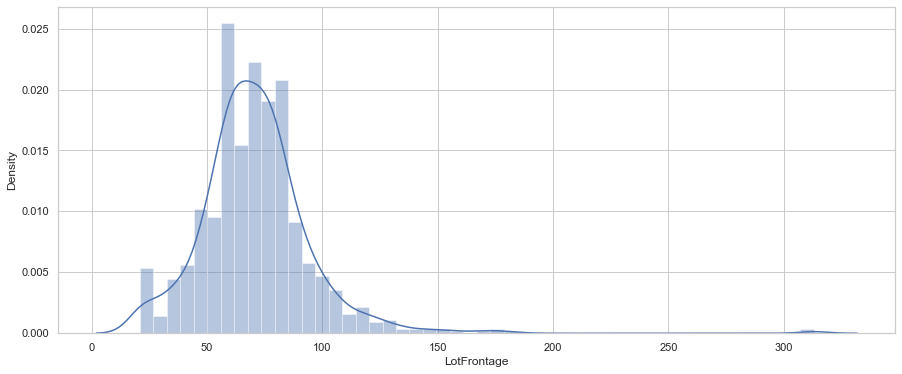

In [2211]:
histogram(train,"LotFrontage")


C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


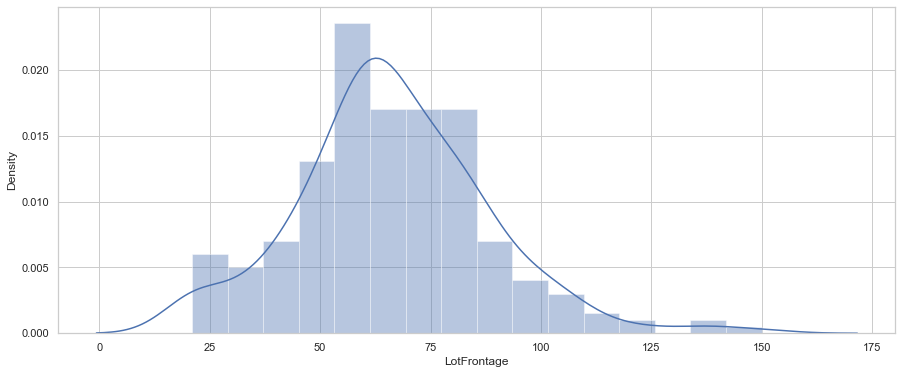

In [2212]:
histogram(test,"LotFrontage")

In [2213]:
impute_median(train,"LotFrontage")
impute_mean(train,"LotFrontage")
impute_random(train,"LotFrontage")

impute_median(test,"LotFrontage")
impute_mean(test,"LotFrontage")
impute_random(test,"LotFrontage")

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

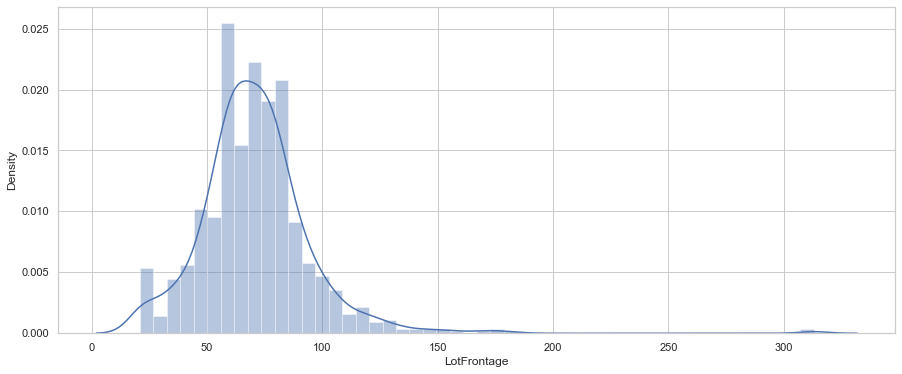

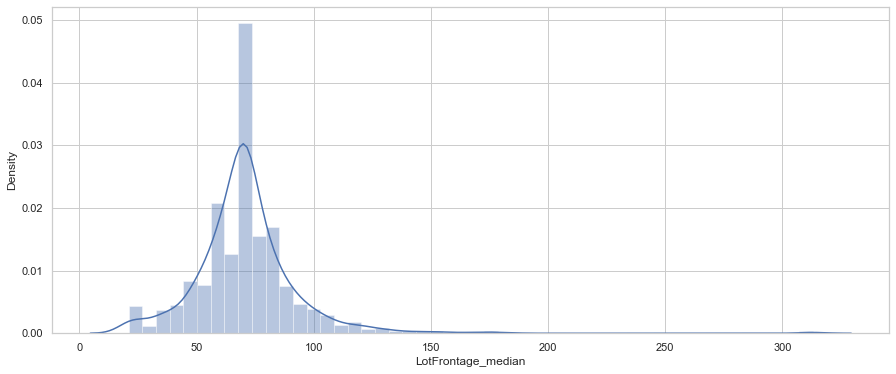

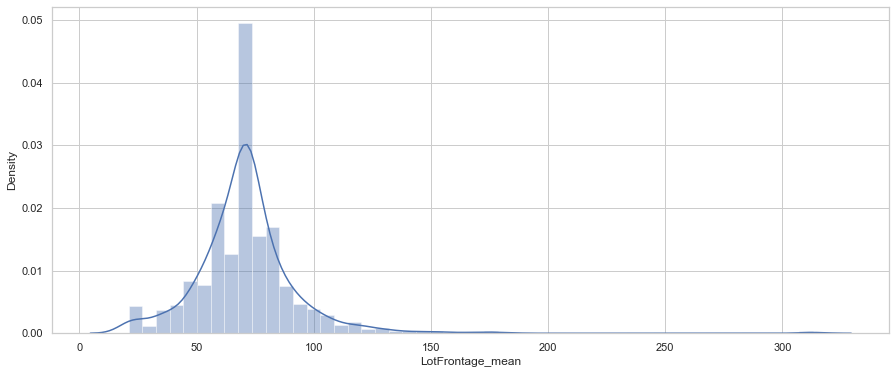

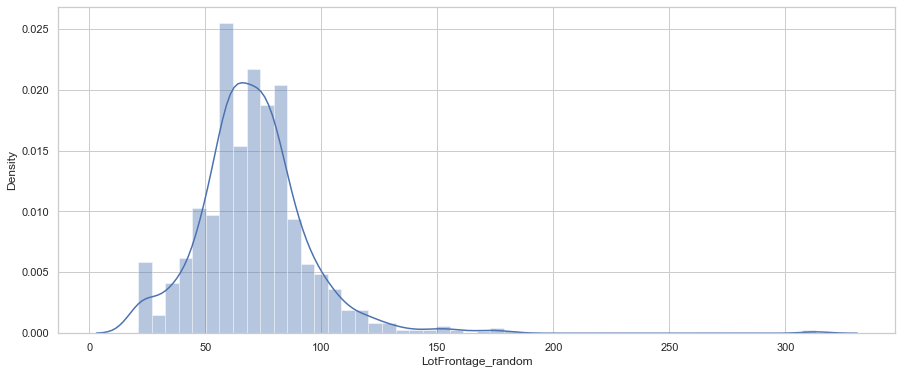

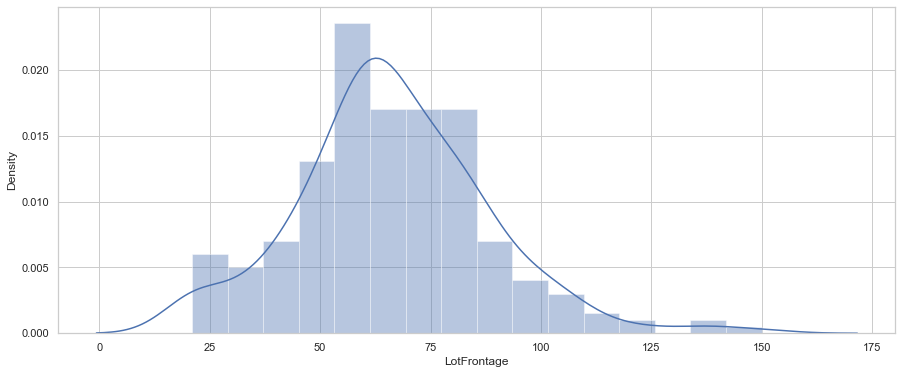

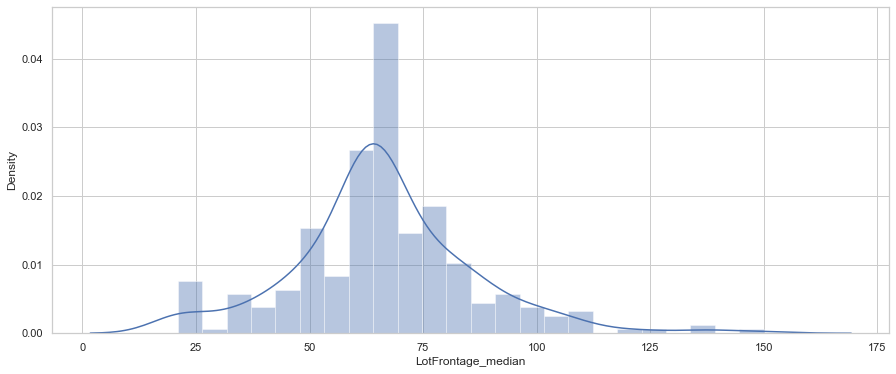

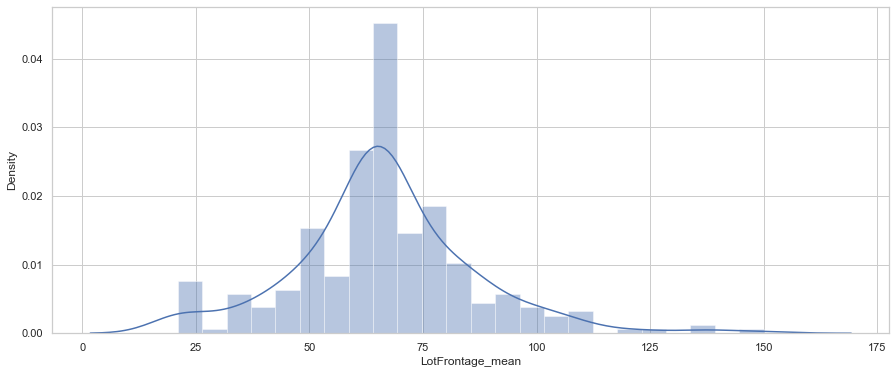

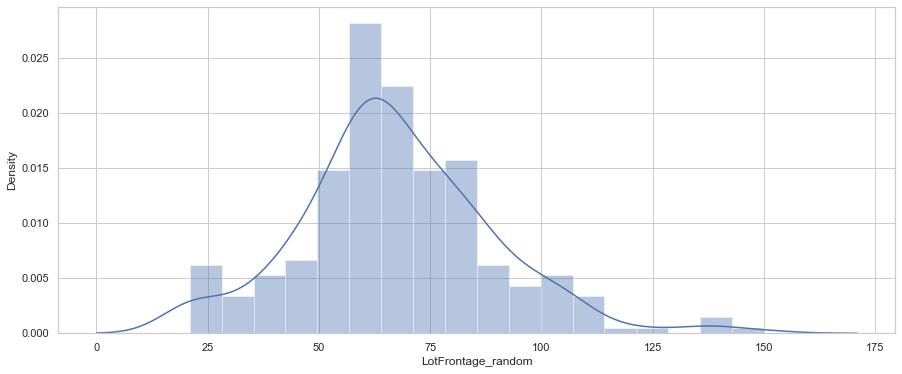

In [2214]:

histogram(train,"LotFrontage")
histogram(train,"LotFrontage_median")
histogram(train,"LotFrontage_mean")
histogram(train,"LotFrontage_random")

histogram(test,"LotFrontage")
histogram(test,"LotFrontage_median")
histogram(test,"LotFrontage_mean")
histogram(test,"LotFrontage_random")

<AxesSubplot:ylabel='Density'>

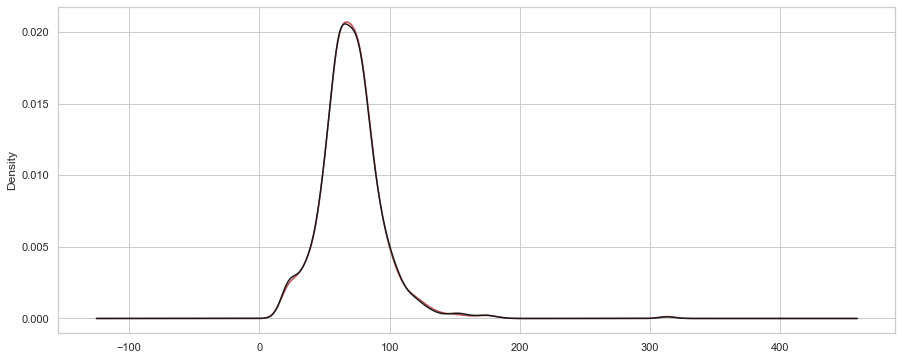

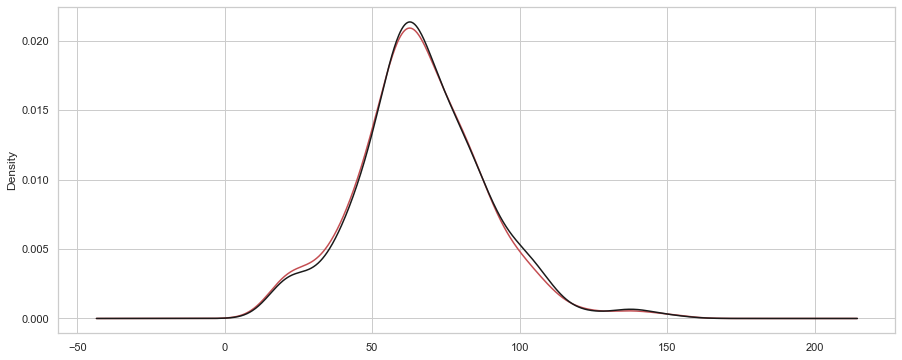

In [2215]:
# Feature LotFrontage having more than 10% Null values so replace nan values by Random Sampling Method in train

plt.figure(figsize=(15,6))
train["LotFrontage"].plot(kind="kde",c="r")
train["LotFrontage_random"].plot(kind="kde",c = "k")



# Feature LotFrontage having more than 10% Null values so replace nan values by Random Sampling Method in test

plt.figure(figsize=(15,6))
test["LotFrontage"].plot(kind="kde",c="r")
test["LotFrontage_random"].plot(kind="kde",c = "k")

After Missing Value Imputation Distribution hasn't changed by Random Sampling 

In [2216]:
print(train["LotFrontage"].std())
print(train["LotFrontage_random"].std())

    
    
print(test["LotFrontage"].std())
print(test["LotFrontage_random"].std())
# std also same after Random Sampling

24.828749734837476
24.639675573217648
21.72634349157963
21.755098648060372


In [2217]:
train["LotFrontage"] = train["LotFrontage_random"] 
test["LotFrontage"] = test["LotFrontage_random"] 

In [2218]:
train["LotFrontage"].isnull().sum()
test["LotFrontage"].isnull().sum()

0

In [2219]:
train = train.drop(["LotFrontage_random","LotFrontage_mean","LotFrontage_median"], axis=1)

test = test.drop(["LotFrontage_random","LotFrontage_mean","LotFrontage_median"], axis=1)


In [2220]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [2221]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

<AxesSubplot:>

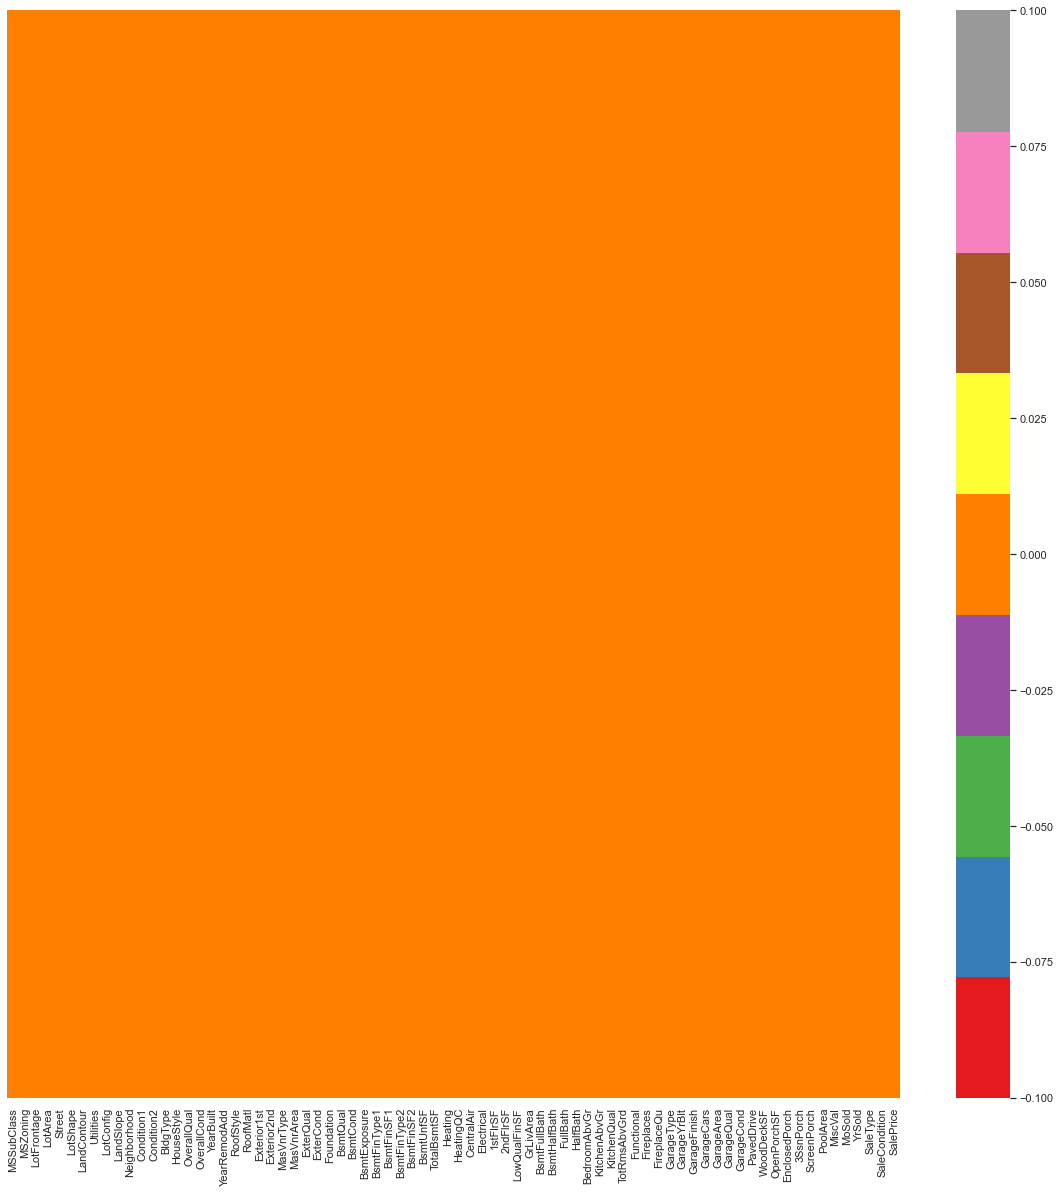

In [2222]:
#check again for null values
plt.figure(figsize=(20,20))
sns.heatmap(train.isnull(),yticklabels=False,cmap='Set1')

<AxesSubplot:>

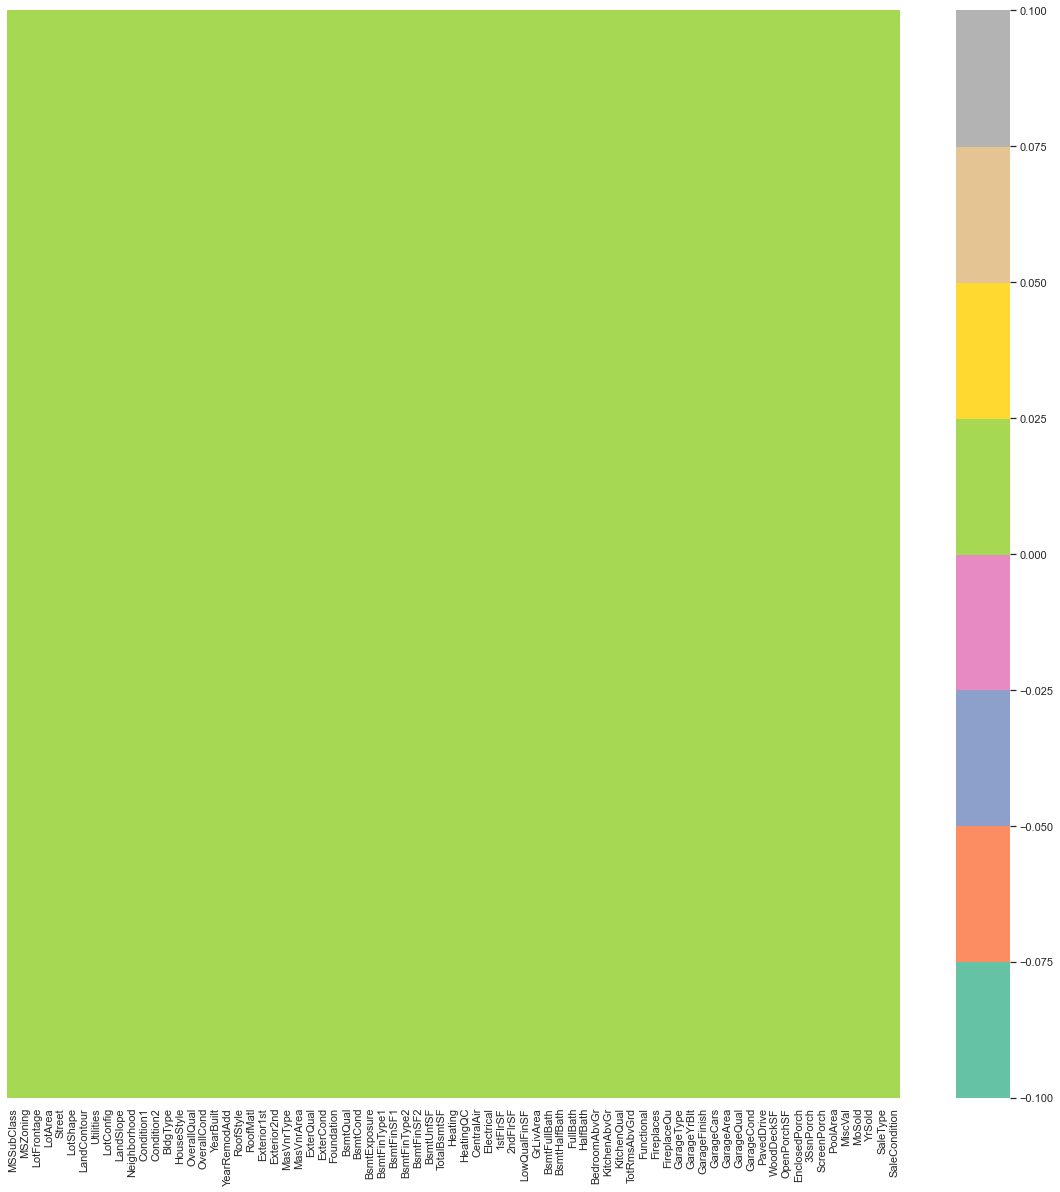

In [2223]:
#check again for null values
plt.figure(figsize=(20,20))
sns.heatmap(test.isnull(),yticklabels=False,cmap='Set2')

# Handle Outliers and Transformation

In [2224]:
#function for detect Outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)
    

In [2225]:
#function for detect Outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*3)
    return (lower_bridge,upper_bridge)
    

In [2226]:
#function for detect Outliers when feature has Noramally Distributed (by mean-+3std)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return (lower_boundary,upper_boundary)
    

In [2227]:
#function for check data is Noramally Distributed by QQ-Plot

from scipy  import  stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("original_dist")
    

In [2228]:
# funtion for LOG Transformation Technique 

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")

In [2229]:
# function for Reciprocal Transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name]
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")

In [2230]:
# function for SquareRoot Transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")   

In [2231]:
# function for Exponential Transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")

In [2232]:
# function for Box Cox Transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name],parameter = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")

# LotFrontage Feature

In [2233]:
train["LotFrontage"].describe()


count    1168.000000
mean       70.768836
std        24.639676
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [2234]:
test["LotFrontage"].describe()

count    292.000000
mean      67.256849
std       21.755099
min       21.000000
25%       55.000000
50%       65.000000
75%       80.000000
max      150.000000
Name: LotFrontage, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


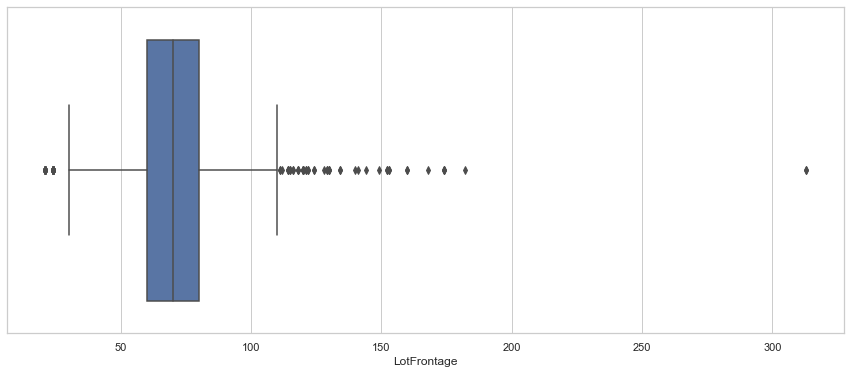

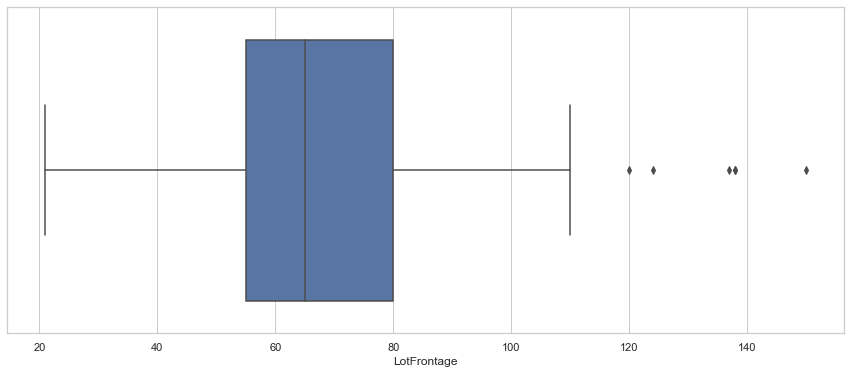

In [2235]:
# Detect outliers by boxplot in train

boxplot(train,"LotFrontage")

# Detect outliers by boxplot in test

boxplot(test,"LotFrontage")

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


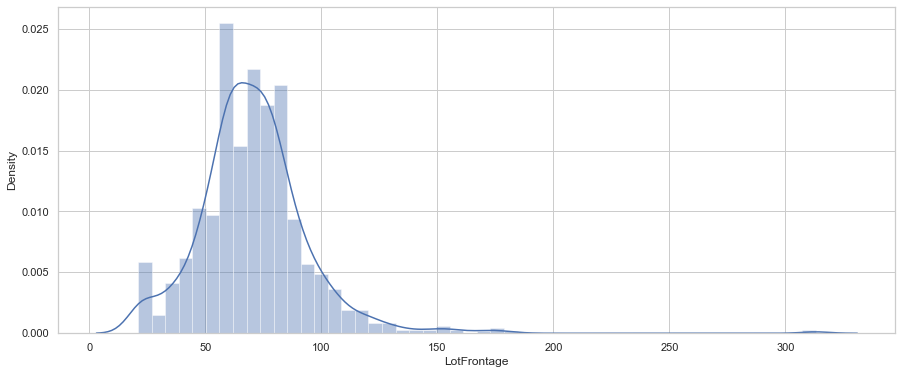

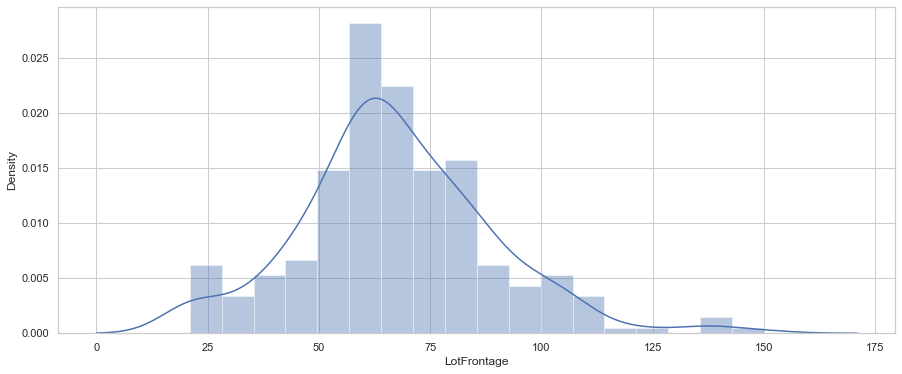

In [2236]:
# check Distribution by Histogram in train

histogram(train,"LotFrontage")

# check Distribution by Histogram in test

histogram(test,"LotFrontage")

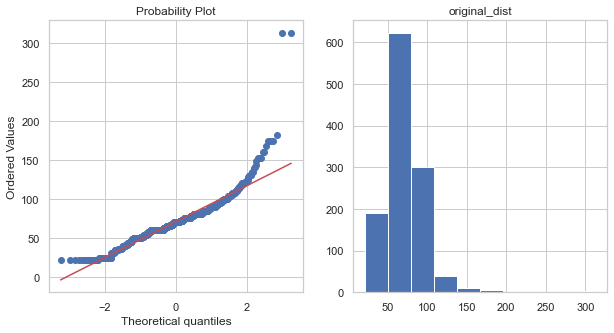

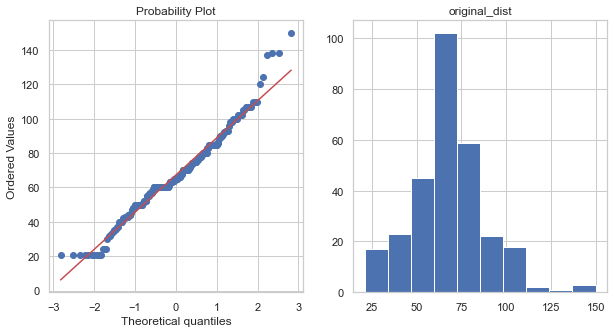

In [2237]:
#Check LotFrontage feature Distribution by QQ-plot in train
original_dist(train,"LotFrontage")

#Check LotFrontage feature Distribution by QQ-plot in test
original_dist(test,"LotFrontage")

In [2238]:
#LotFrontage distribution seems to normally distributed. so detect outliers (by mean-+3std) in train
outlier_normally(train,"LotFrontage")

#LotFrontage distribution seems to normally distributed. so detect outliers (by mean-+3std) in test
outlier_normally(test,"LotFrontage")

(1.9915533708873738, 132.5221452592496)

In [2239]:
# In LotFrontage more than 138.36 value consider as outliers in train
train.loc[train["LotFrontage"]>=138.36,"LotFrontage"] = 138.36

# In LotFrontage more than 138.36 value consider as outliers in test
test.loc[test["LotFrontage"]>=138.36,"LotFrontage"] = 138.36

In [2240]:
train[train["LotFrontage"]>=138.36]
test[test["LotFrontage"]>=138.36]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
273          20       RL       138.36   215245   Pave      IR3         Low   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
273    AllPub    Inside       Sev       Timber       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
273     1Story            7            5       1965          1965       Hip   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
273  CompShg     BrkFace     BrkFace       None         0.0        TA   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
273        TA     CBlock       Gd       TA           Gd          ALQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
273        1236          Rec         820         80         2136    GasW   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
273        TA          Y      SBrkr      2036         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
273       2036             2             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
273             1          TA             8        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
273          Gd     Attchd       1965.0          RFn           2         513   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
273         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
273          0            0         0        0       6    2009       WD   

    SaleCondition  
273        Normal

Apply Some Transformation Techniques on LotFrontage for make distribution as Normally Distributed and check Distribution by QQ-plot.

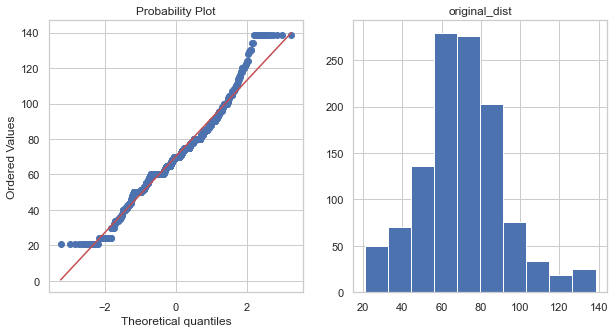

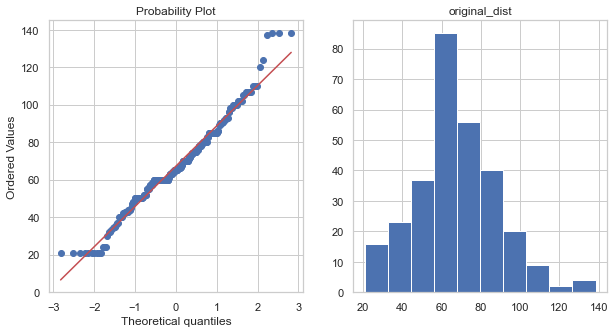

In [2241]:
original_dist(train,"LotFrontage")
original_dist(test,"LotFrontage")

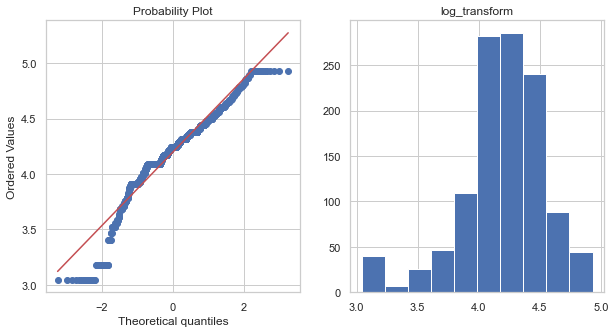

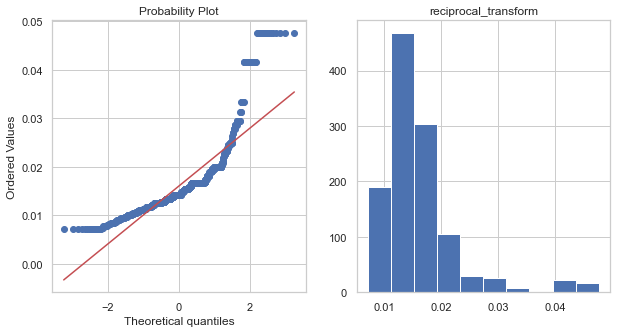

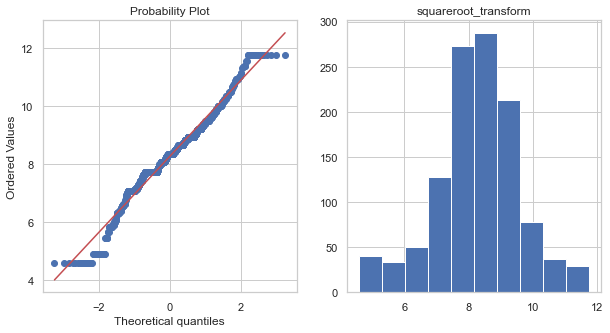

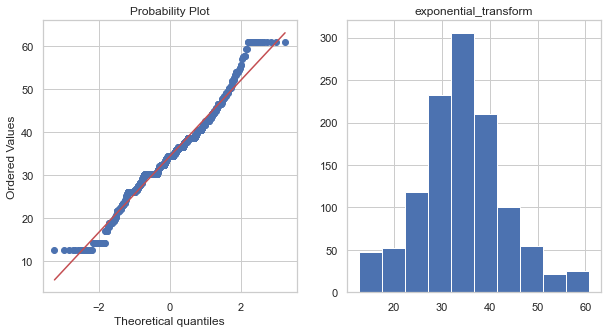

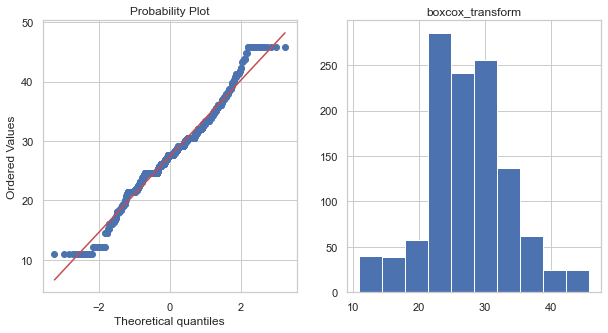

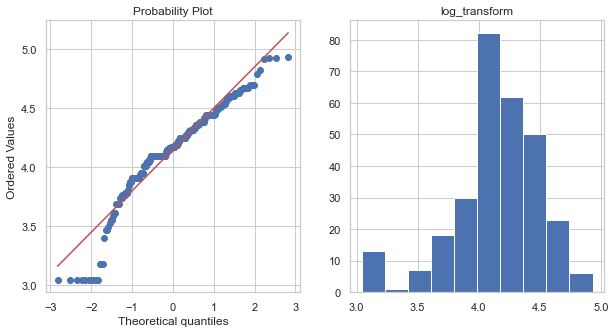

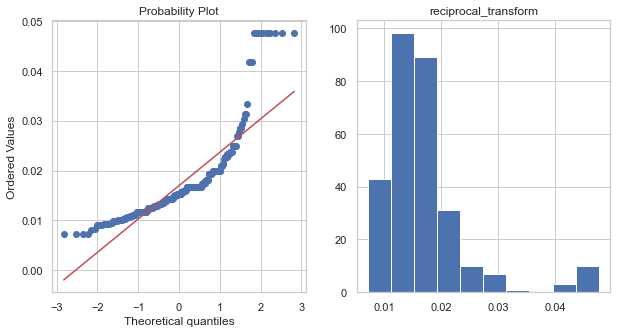

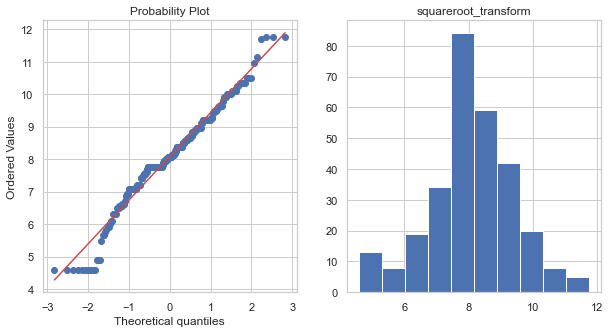

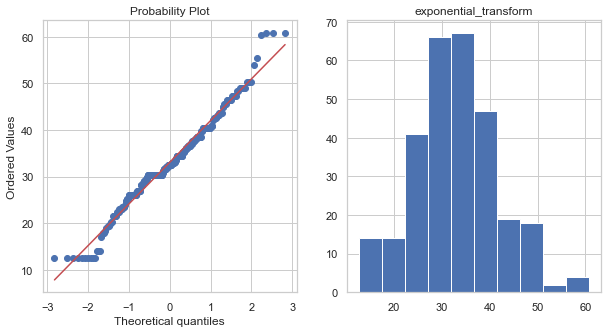

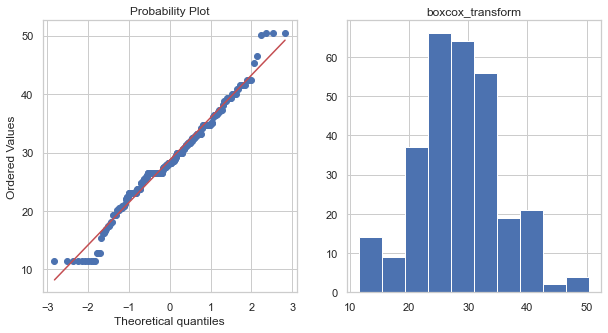

In [2242]:
log_transform(train,"LotFrontage")

reciprocal_transform(train,"LotFrontage")

squareroot_transform(train,"LotFrontage")

exponential_transform(train,"LotFrontage")

boxcox_transform(train,"LotFrontage")






log_transform(test,"LotFrontage")

reciprocal_transform(test,"LotFrontage")

squareroot_transform(test,"LotFrontage")

exponential_transform(test,"LotFrontage")

boxcox_transform(test,"LotFrontage")

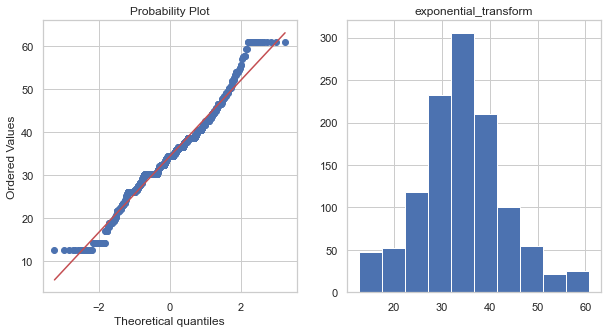

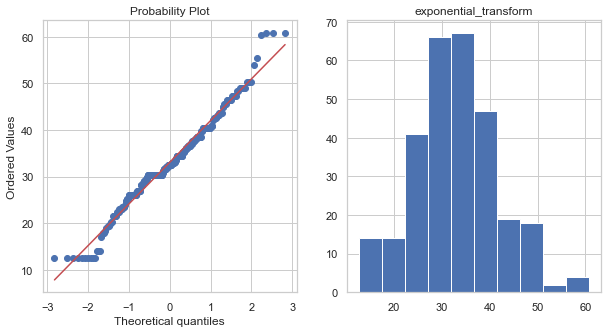

In [2243]:
#After Apply Exponential Transformation LotFrontage Feature looks more Normally distributed so apply on main dataset in train

if 0 in train["LotFrontage"].unique():
    pass
else:
    train["LotFrontage"] = train["LotFrontage"]**(1/1.2)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(train["LotFrontage"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    train["LotFrontage"].hist()
    plt.title("exponential_transform")
    
    
 #After Apply Exponential Transformation LotFrontage Feature looks more Normally distributed so apply on main dataset in test

if 0 in test["LotFrontage"].unique():
    pass
else:
    test["LotFrontage"] = test["LotFrontage"]**(1/1.2)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(test["LotFrontage"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    test["LotFrontage"].hist()
    plt.title("exponential_transform")

# LotArea Feature

In [2244]:
train["LotArea"].describe()


count      1168.000000
mean      10484.749144
std        8957.442311
min        1300.000000
25%        7621.500000
50%        9522.500000
75%       11515.500000
max      164660.000000
Name: LotArea, dtype: float64

In [2245]:

test["LotArea"].describe()

count       292.000000
mean      10645.143836
std       13330.669795
min        1526.000000
25%        7200.000000
50%        9200.000000
75%       11658.750000
max      215245.000000
Name: LotArea, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


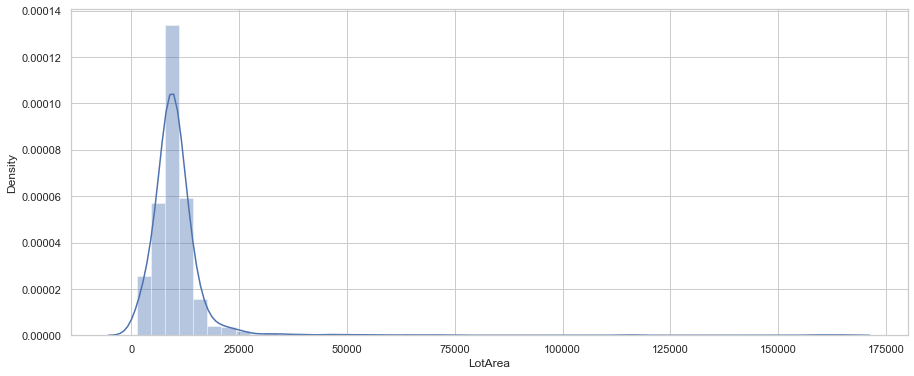

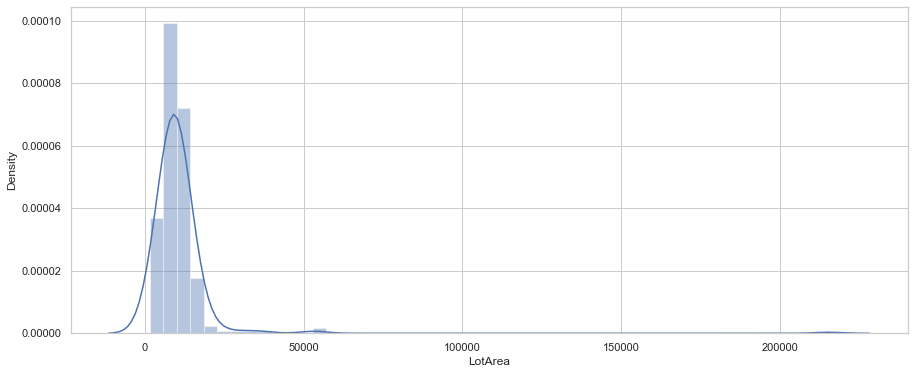

In [2246]:
# check Distribution by Histogram in train

histogram(train,"LotArea")


# check Distribution by Histogram in test

histogram(test,"LotArea")

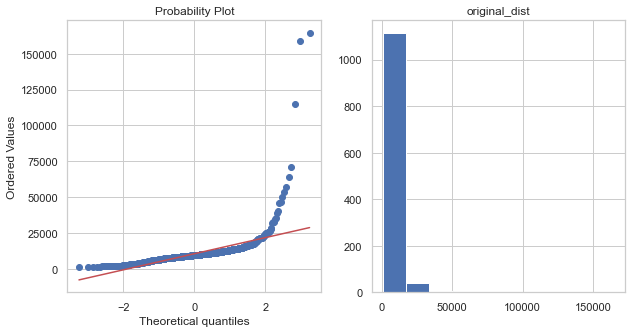

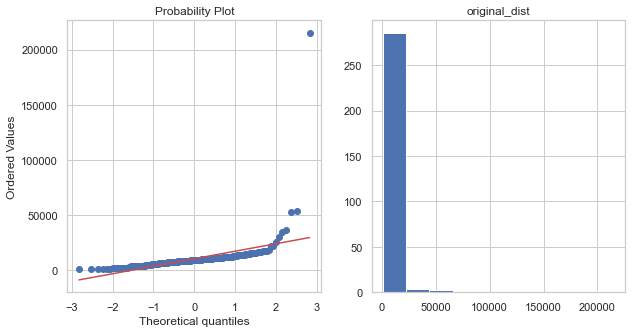

In [2247]:
#Check LotFrontage feature Distribution by QQ-plot in train

original_dist(train,"LotArea")



#Check LotFrontage feature Distribution by QQ-plot in test

original_dist(test,"LotArea")

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


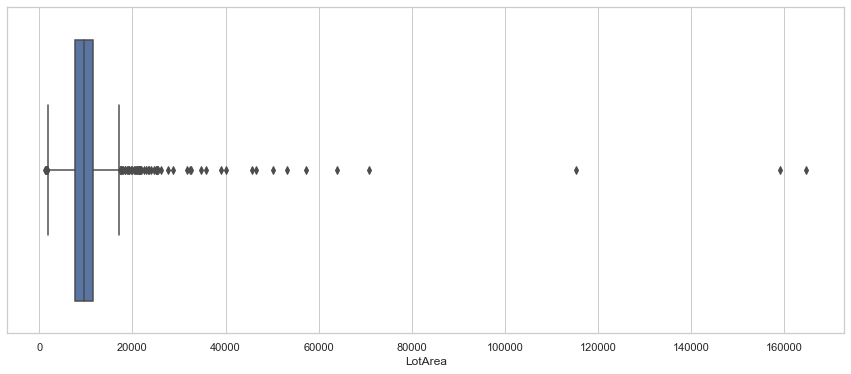

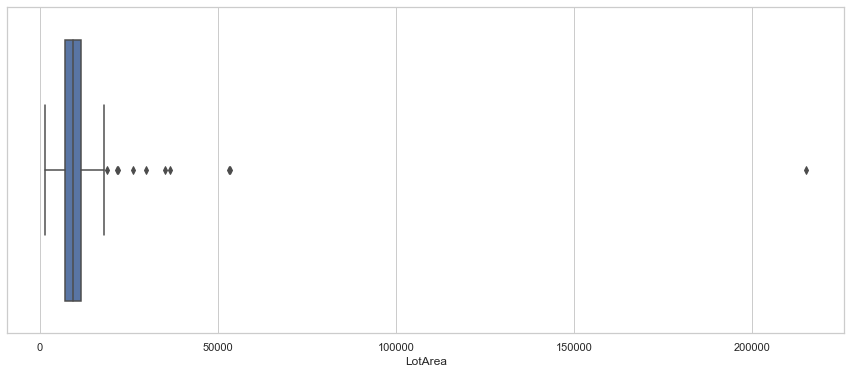

In [2248]:
# Detect outliers by boxplot in train

boxplot(train,"LotArea")


# Detect outliers by boxplot in test

boxplot(test,"LotArea")

In [2249]:
#LotArea distribution seems to normally distributed. so detect outliers (by mean-+3std) in train
outlier_normally(train,"LotArea")



#LotArea distribution seems to normally distributed. so detect outliers (by mean-+3std) in test
outlier_normally(test,"LotArea")

(-29346.865549233233, 50637.153220466105)

In [2250]:
# In LotArea more than 33829.10315 value consider as outliers in train

train.loc[train["LotArea"]>=33829.10315,"LotArea"]=33829.10315 


# In LotArea more than 33829.10315 value consider as outliers in test

test.loc[test["LotArea"]>=33829.10315,"LotArea"]=33829.10315

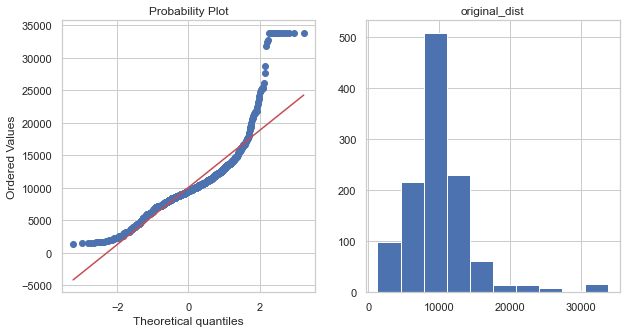

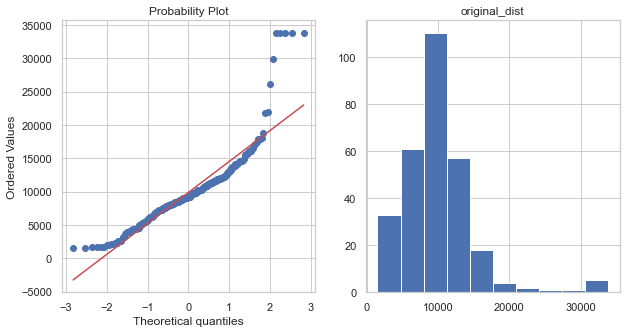

In [2251]:
original_dist(train,"LotArea") 


original_dist(test,"LotArea")

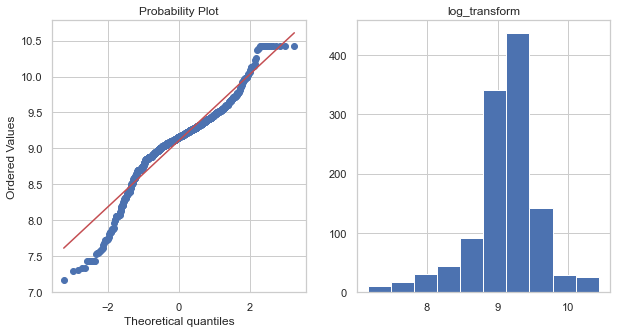

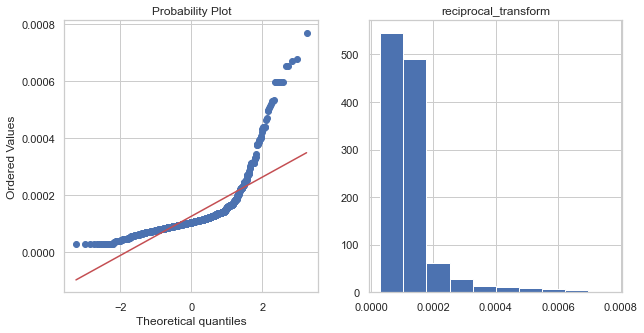

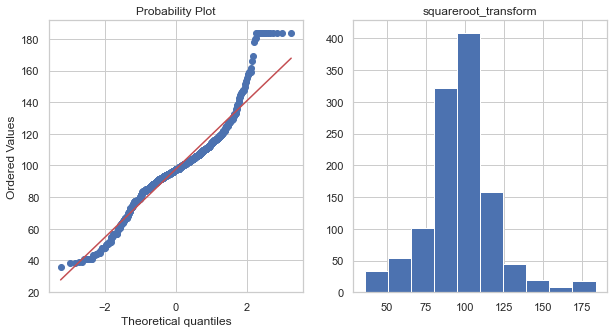

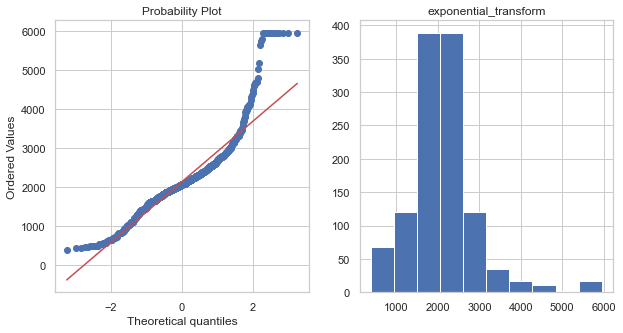

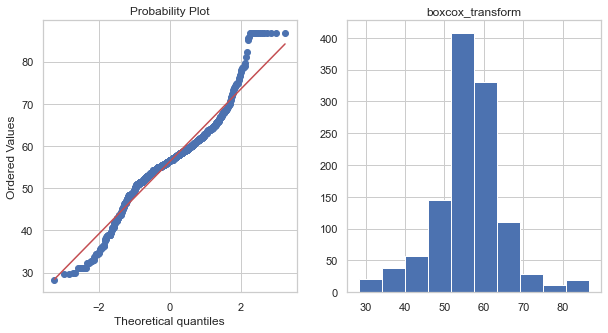

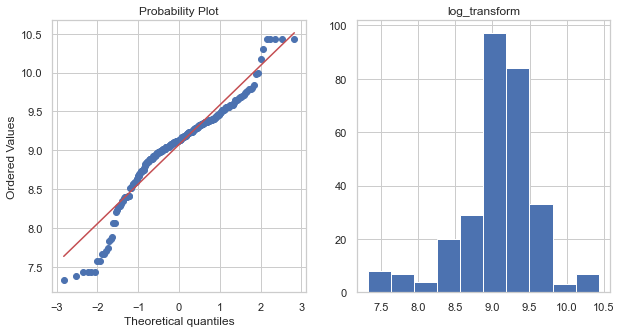

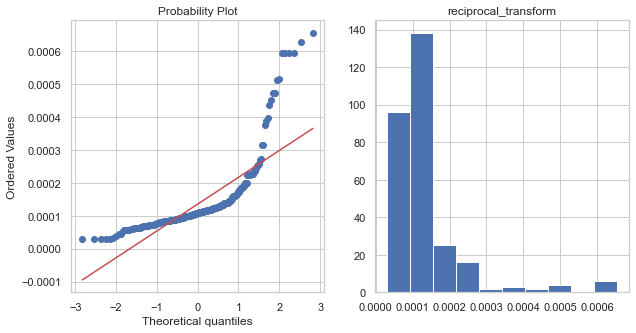

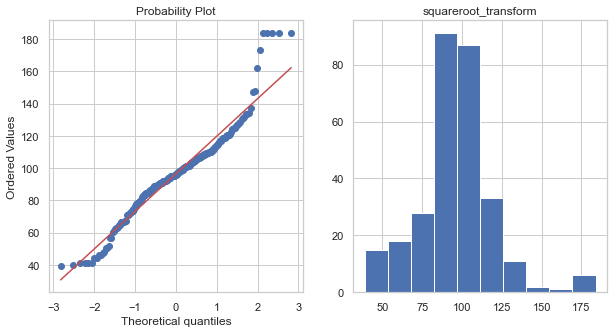

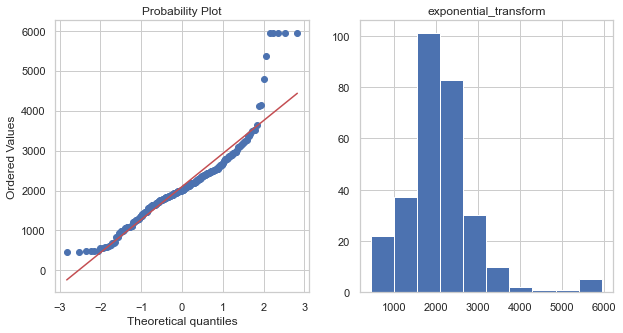

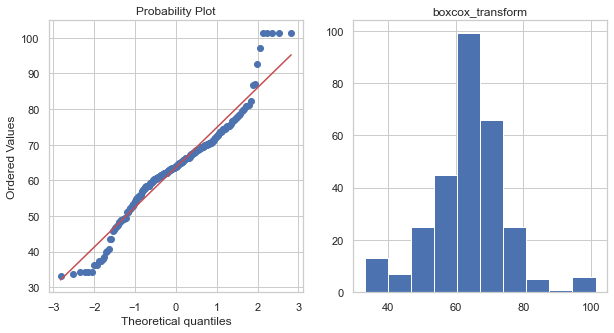

In [2252]:
#Apply Some Transformation Techniques on LotArea for make distribution as Normally Distributed and check Distribution by QQ plot in train

log_transform(train,"LotArea")

reciprocal_transform(train,"LotArea")

squareroot_transform(train,"LotArea")

exponential_transform(train,"LotArea")

boxcox_transform(train,"LotArea")


#Apply Some Transformation Techniques on LotArea for make distribution as Normally Distributed and check Distribution by QQ plot in test

log_transform(test,"LotArea")

reciprocal_transform(test,"LotArea")

squareroot_transform(test,"LotArea")

exponential_transform(test,"LotArea")

boxcox_transform(test,"LotArea")


After squareroot and boxcox Transformation LotArea feature seems to more Normally Distributed so apply one transformation on main dataset

In [2253]:
# Apply boxcox Transformation on LotArea feature in train
if 0 in train["LotArea"].unique():
    pass
else:
    train["LotArea"],parameter = stats.boxcox(train["LotArea"])
    
    
# Apply boxcox Transformation on LotArea feature in test
if 0 in test["LotArea"].unique():
    pass
else:
    test["LotArea"],parameter = stats.boxcox(test["LotArea"])

# MasVnrArea Feature

In [2254]:
train[train["MasVnrArea"]==0]
test[test["MasVnrArea"]==0]

MSSubClass MSZoning  LotFrontage    LotArea Street LotShape LandContour  \
1           120       RL    43.692054  54.101339   Pave      IR1         Lvl   
2            20       RL    23.417682  69.851089   Pave      Reg         Lvl   
3            70       RL    36.521706  70.191152   Pave      Reg         Bnk   
5           180       RM    12.642979  36.185024   Pave      Reg         Lvl   
10           30       RM    30.324434  55.769824   Pave      IR1         Lvl   
..          ...      ...          ...        ...    ...      ...         ...   
280          20       RL    31.582787  63.822539   Pave      IR1         Lvl   
284         120       RM    23.417682  48.182905   Pave      Reg         Lvl   
285          20       RL    34.070165  59.586104   Pave      Reg         Lvl   
288          20       RL    29.055546  63.934337   Pave      IR2         Lvl   
290          50       RM    26.050037  51.226332   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1      AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE   
2      AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3      AllPub    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
5      AllPub    Inside       Gtl      MeadowV       Norm       Norm    Twnhs   
10     AllPub    Inside       Gtl      BrkSide      Feedr       RRNn     1Fam   
..        ...       ...       ...          ...        ...        ...      ...   
280    AllPub   CulDSac       Gtl      CollgCr       Norm       Norm     1Fam   
284    AllPub    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE   
285    AllPub    Corner       Gtl      Mitchel       Norm       Norm     1Fam   
288    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
290    AllPub    Corner       Gtl      BrkSide      Feedr       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
1       1Story            8            5       1984          1984     Gable   
2       1Story            8            5       2001          2001       Hip   
3       2Story            7            7       1941          1950     Gable   
5       SFoyer            4            6       1970          1970     Gable   
10      1Story            4            6       1927          1950     Gable   
..         ...          ...          ...        ...           ...       ...   
280     1Story            5            6       1975          1980       Hip   
284     1Story            5            5       1976          1976     Gable   
285     1Story            4            6       1982          2006     Gable   
288     1Story            5            5       1994          1995     Gable   
290     1.5Fin            6            7       1947          1950     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
1    CompShg     HdBoard     HdBoard       None         0.0        Gd   
2    CompShg     VinylSd     VinylSd       None         0.0        Gd   
3    CompShg     MetalSd     MetalSd       None         0.0        TA   
5    CompShg     CemntBd     CmentBd       None         0.0        TA   
10   CompShg     MetalSd     MetalSd       None         0.0        TA   
..       ...         ...         ...        ...         ...       ...   
280  CompShg     VinylSd     VinylSd       None         0.0        TA   
284  CompShg     CemntBd     CmentBd       None         0.0        TA   
285  CompShg     HdBoard     Plywood       None         0.0        TA   
288  CompShg     VinylSd     VinylSd       None         0.0        TA   
290  CompShg     CemntBd     CmentBd       None         0.0        TA   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
1          TA     CBlock       Gd       TA           Av          GLQ   
2          TA      PConc       Gd       TA           Av          Unf   
3          TA     CBlock     

In [2255]:
train["MasVnrArea"].describe()

test["MasVnrArea"].describe()

count     292.000000
mean      108.797945
std       174.845785
min         0.000000
25%         0.000000
50%         0.000000
75%       180.000000
max      1031.000000
Name: MasVnrArea, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


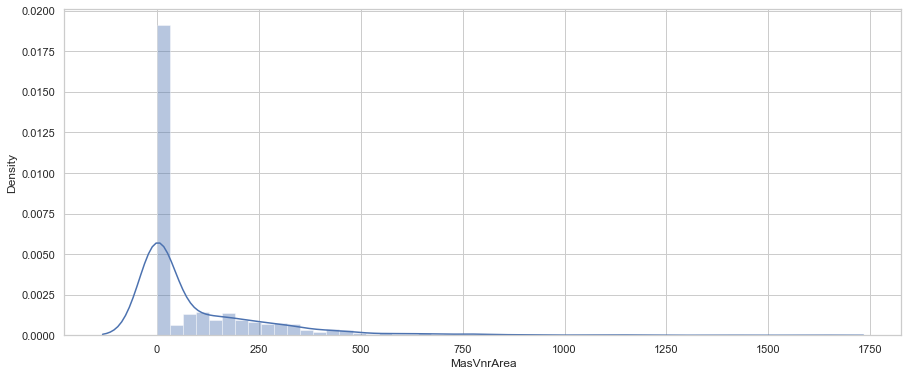

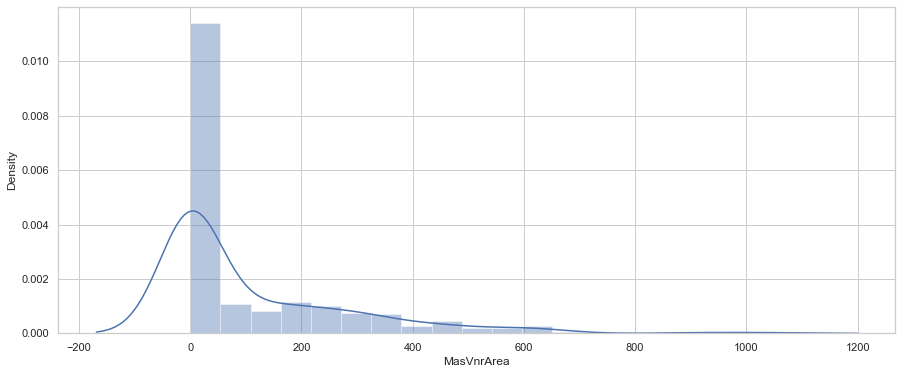

In [2256]:
histogram(train,"MasVnrArea")

histogram(test,"MasVnrArea")

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


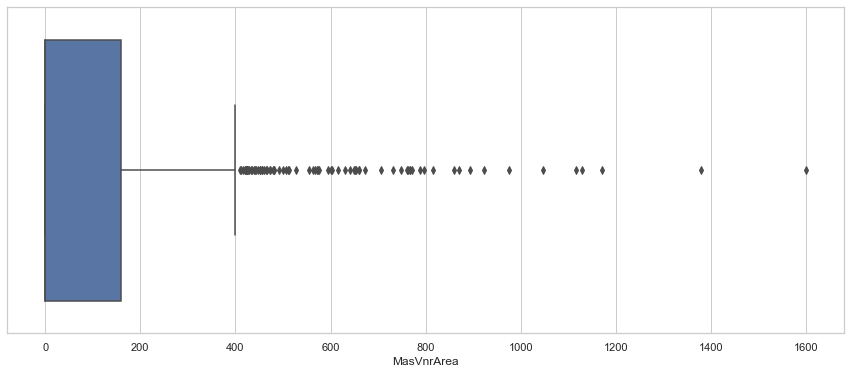

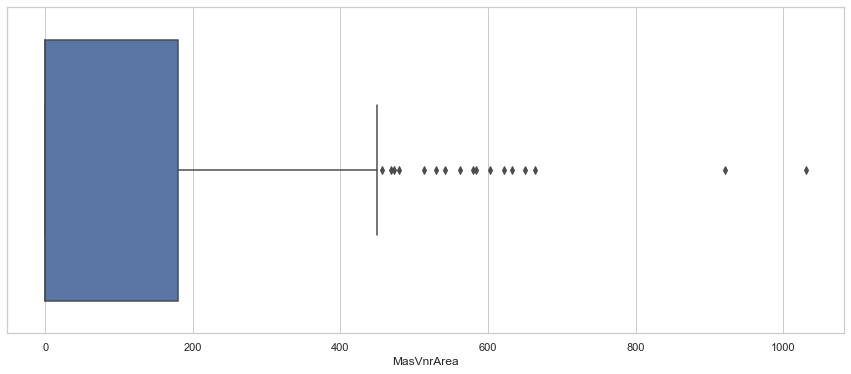

In [2257]:
# Detect outliers by boxplot in train

boxplot(train,"MasVnrArea")

# Detect outliers by boxplot in test

boxplot(test,"MasVnrArea")

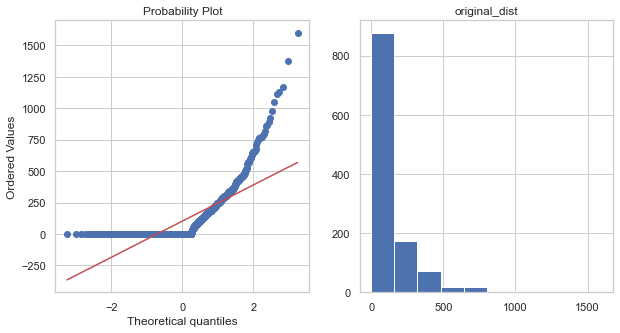

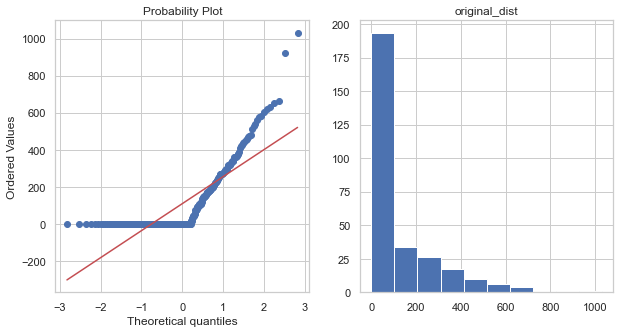

In [2258]:
#check Distribution by QQ-plot in train

original_dist(train,"MasVnrArea")
#check Distribution by QQ-plot in test

original_dist(test,"MasVnrArea")

In [2259]:
# MasVnrArea feature is Right skewed ,so detect outliers by 3*IQR in train

outlier_IQR3(train,"MasVnrArea")
# MasVnrArea feature is Right skewed ,so detect outliers by 3*IQR in test

outlier_IQR3(test,"MasVnrArea")

(-540.0, 720.0)

In [2260]:
# In MasVnrArea more than 654.0 value consider as outliers in train

train.loc[train["MasVnrArea"]>=654,"MasVnrArea"]=654

# In MasVnrArea more than 654.0 value consider as outliers in test

test.loc[test["MasVnrArea"]>=654,"MasVnrArea"]=654

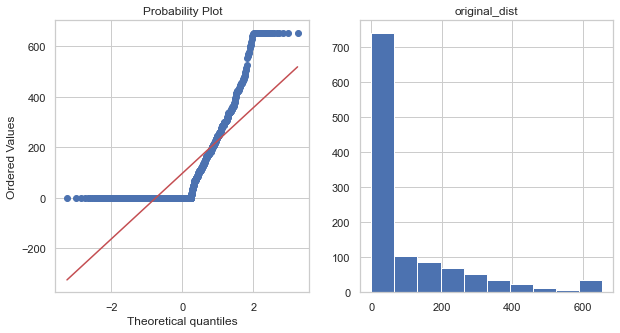

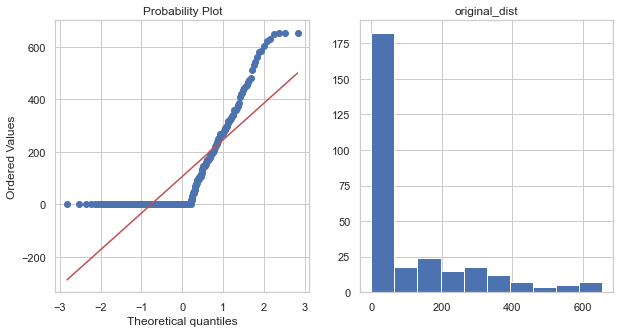

In [2261]:
original_dist(train,"MasVnrArea")

original_dist(test,"MasVnrArea")

# BsmtFinSF1 Feature

In [2262]:
train["BsmtFinSF1"].describe()

test["BsmtFinSF1"].describe()

count     292.000000
mean      439.294521
std       429.559675
min         0.000000
25%         0.000000
50%       369.500000
75%       700.500000
max      1767.000000
Name: BsmtFinSF1, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


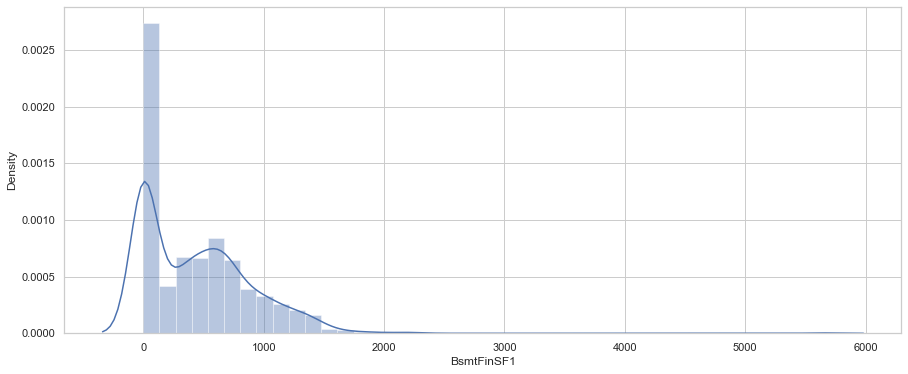

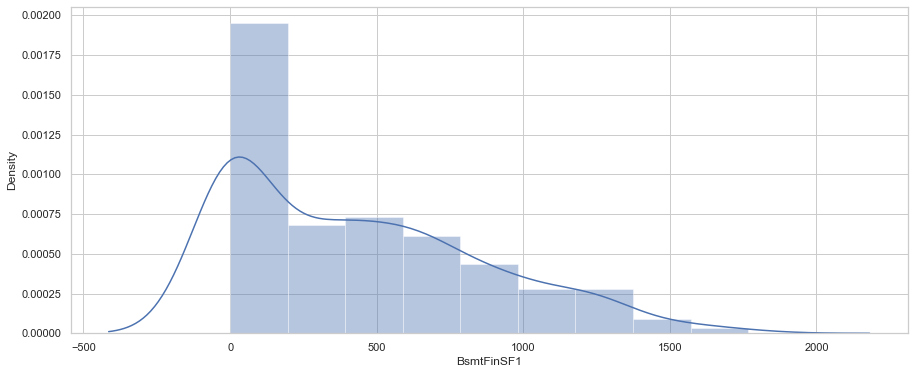

In [2263]:
#check Distribution of BsmtFinSF1 feature by Histogram in train

histogram(train,"BsmtFinSF1")

#check Distribution of BsmtFinSF1 feature by Histogram in test

histogram(test,"BsmtFinSF1")

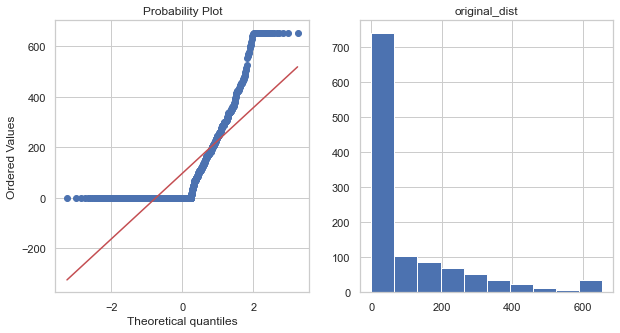

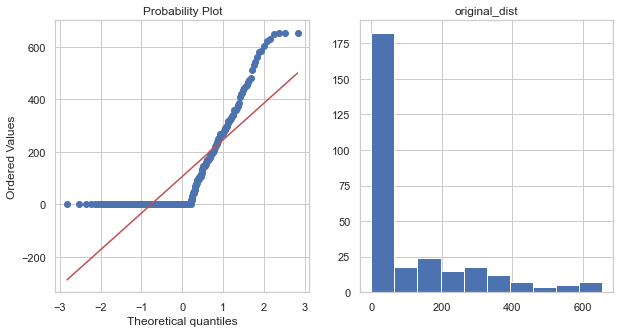

In [2264]:
#Check Distribution by QQ-plot  in train
original_dist(train,"MasVnrArea")

#Check Distribution by QQ-plot in test
original_dist(test,"MasVnrArea")

In [2265]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR in train

outlier_IQR(train,'BsmtFinSF1')


# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR in test

outlier_IQR(test,'BsmtFinSF1')

(-1050.75, 1751.25)

In [2266]:
# In BsmtFinSF1 more than 1832.5 value consider as outliers in train


train.loc[train["BsmtFinSF1"]>=1832.5,"BsmtFinSF1"]=1832.5


# In BsmtFinSF1 more than 1832.5 value consider as outliers in test


test.loc[test["BsmtFinSF1"]>=1832.5,"BsmtFinSF1"]=1832.5

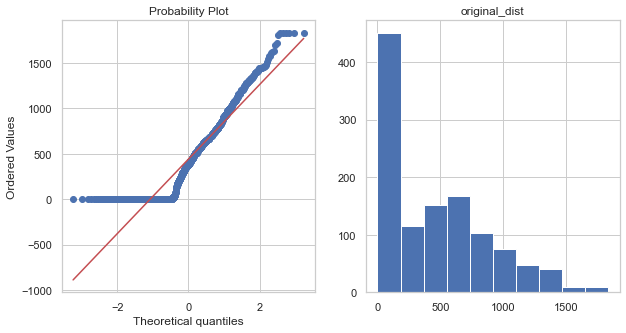

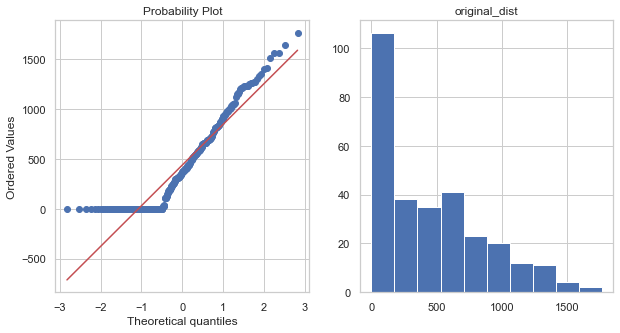

In [2267]:
original_dist(train,"BsmtFinSF1")

original_dist(test,"BsmtFinSF1")

# BsmtFinSF2 Feature

In [2268]:
train["BsmtFinSF2"].describe()


count    1168.000000
mean       46.647260
std       163.520016
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [2269]:
test["BsmtFinSF2"].describe()

count     292.000000
mean       46.157534
std       152.467119
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1085.000000
Name: BsmtFinSF2, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF2'>

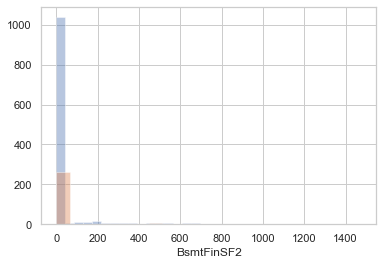

In [2270]:
#Check Distribution by Histogram in train
sns.distplot(train["BsmtFinSF2"],kde=False)

#Check Distribution by Histogram in test
sns.distplot(test["BsmtFinSF2"],kde=False)

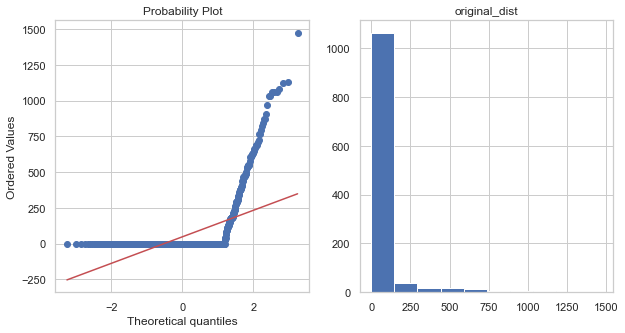

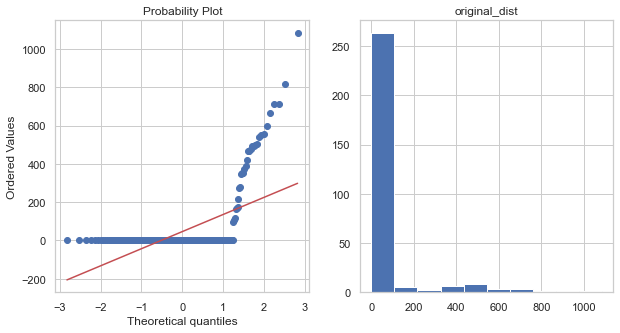

In [2271]:
#check Distribution by QQ-plot in train
original_dist(train,"BsmtFinSF2")


#check Distribution by QQ-plot in test
original_dist(test,"BsmtFinSF2")

In [2272]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 3*IQR in train

outlier_IQR3(train,"BsmtFinSF2")



# BsmtFinSF1 feature is right skewed so detect ouliers by 3*IQR inn test

outlier_IQR3(test,"BsmtFinSF2")

(0.0, 0.0)

Because min=0 , 0.25 = 0 so that's why outlier_IQR also 0 , now check by outlier_normally

# BsmtUnfSF Feature

In [2273]:
train["BsmtUnfSF"].describe()

count    1168.000000
mean      569.721747
std       449.375525
min         0.000000
25%       216.000000
50%       474.000000
75%       816.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [2274]:
test["BsmtUnfSF"].describe()

count     292.000000
mean      557.315068
std       411.043768
min         0.000000
25%       255.000000
50%       487.000000
75%       780.000000
max      1935.000000
Name: BsmtUnfSF, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


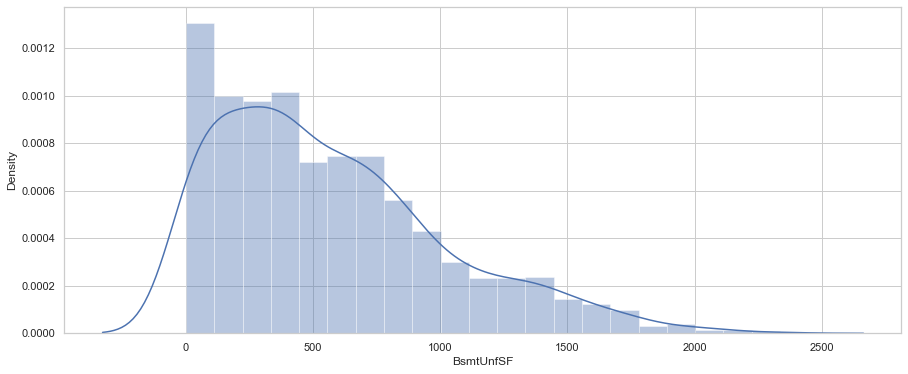

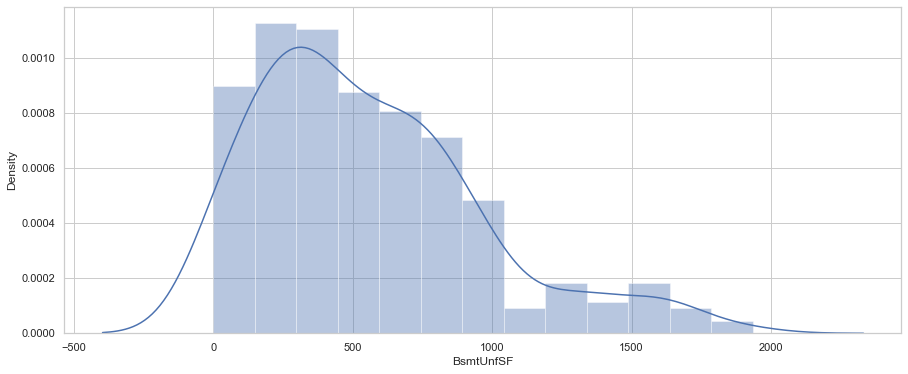

In [2275]:
#Check Distribution by Histogram in train
histogram(train,"BsmtUnfSF")

#Check Distribution by Histogram in test
histogram(test,"BsmtUnfSF")

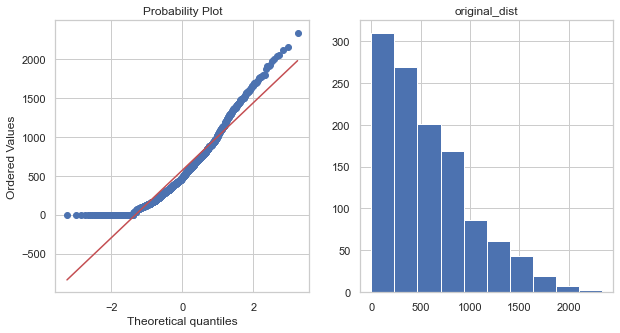

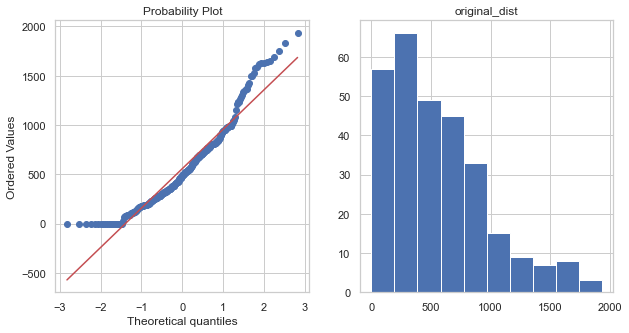

In [2276]:
#check Distribution by QQ-plot in train
original_dist(train,"BsmtUnfSF")

#check Distribution by QQ-plot in test
original_dist(test,"BsmtUnfSF")

In [2277]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR in train

outlier_IQR(train,"BsmtUnfSF")

# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR in test

outlier_IQR(test,"BsmtUnfSF")

(-532.5, 1567.5)

In [2278]:
# In BsmtUnfSF more than 1682.5 value consider as outliers in train


train.loc[train["BsmtUnfSF"]>=1682.5,"BsmtUnfSF"] =1682.5



# In BsmtUnfSF more than 1682.5 value consider as outliers in test


test.loc[test["BsmtUnfSF"]>=1682.5,"BsmtUnfSF"] =1682.5

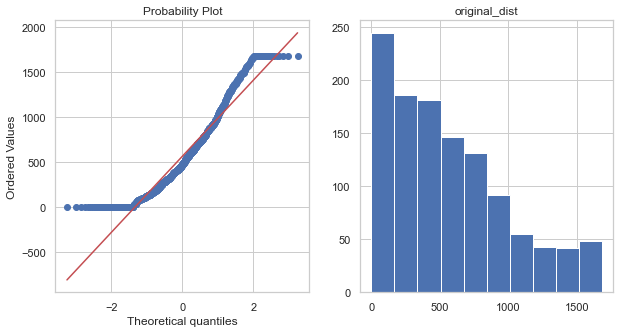

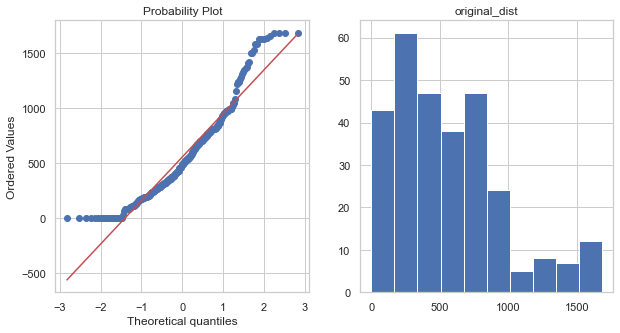

In [2279]:
original_dist(train,"BsmtUnfSF")

original_dist(test,"BsmtUnfSF")

# TotalBsmtSF Feature

In [2280]:
train["TotalBsmtSF"].describe()

test["TotalBsmtSF"].describe()

count     292.000000
mean     1042.767123
std       424.561153
min         0.000000
25%       771.750000
50%       971.000000
75%      1322.000000
max      3094.000000
Name: TotalBsmtSF, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


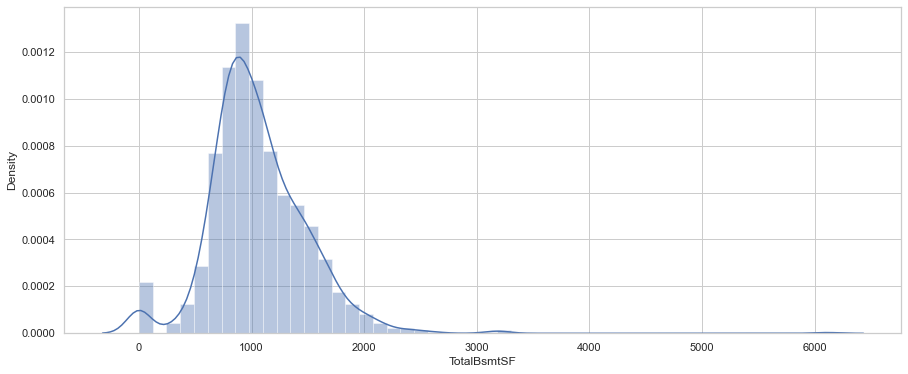

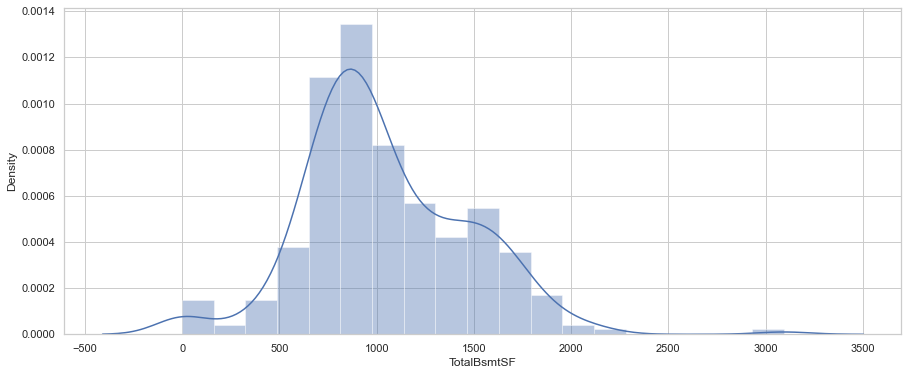

In [2281]:
#check Distribution by Histogram in train

histogram(train,"TotalBsmtSF")

#check Distribution by Histogram in test

histogram(test,"TotalBsmtSF")

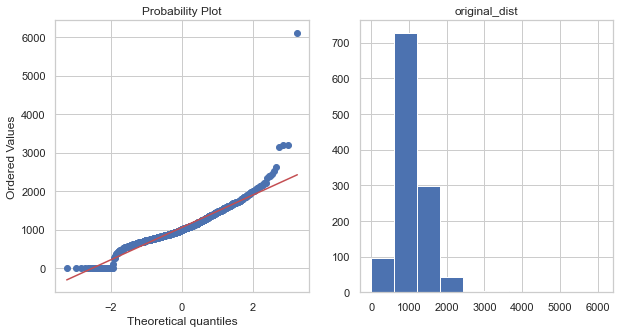

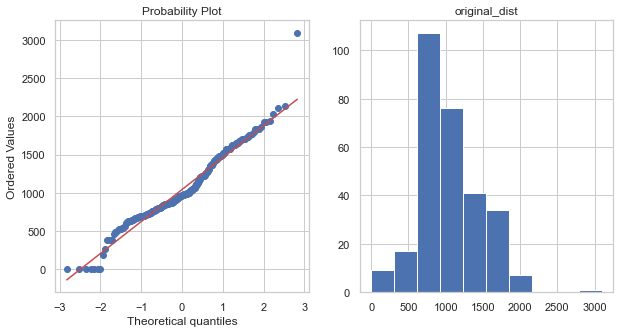

In [2282]:
#check Distribution by QQ-plot in train

original_dist(train,"TotalBsmtSF")

#check Distribution by QQ-plot in test

original_dist(test,"TotalBsmtSF")

In [2283]:
#TotalBsmtSF distribution seems to normally distributed. so detect outliers (by mean-+3std) in train
outlier_normally(train,"TotalBsmtSF")

#TotalBsmtSF distribution seems to normally distributed. so detect outliers (by mean-+3std) in test
outlier_normally(test,"TotalBsmtSF")

(-230.91633482732664, 2316.450581402669)

In [2284]:
# In BsmtUnfSF more than 2374.77 value consider as outliers in train

train.loc[train["TotalBsmtSF"]>=2374.77,"TotalBsmtSF"] =2374.77

# In BsmtUnfSF more than 2374.77 value consider as outliers in test

test.loc[test["TotalBsmtSF"]>=2374.77,"TotalBsmtSF"] =2374.77

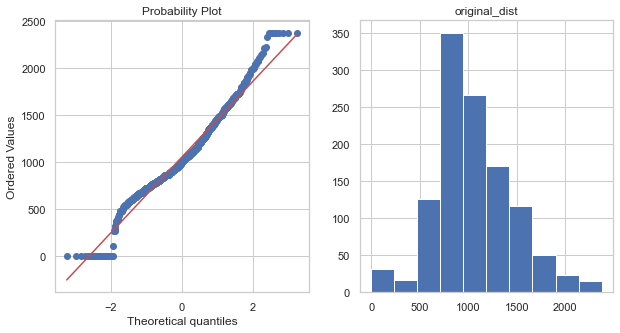

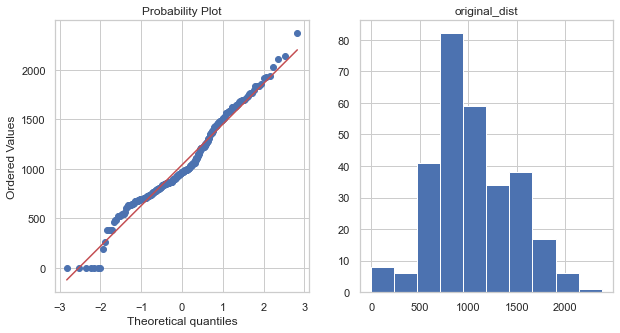

In [2285]:
original_dist(train,"TotalBsmtSF")

original_dist(test,"TotalBsmtSF")

# 1stFlrSF Feature

In [2286]:
train["1stFlrSF"].describe()

count    1168.000000
mean     1169.860445
std       391.161983
min       334.000000
25%       892.000000
50%      1096.500000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [2287]:
test["1stFlrSF"].describe()

count     292.000000
mean     1133.691781
std       366.941919
min       372.000000
25%       858.000000
50%      1047.500000
75%      1370.500000
max      2402.000000
Name: 1stFlrSF, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


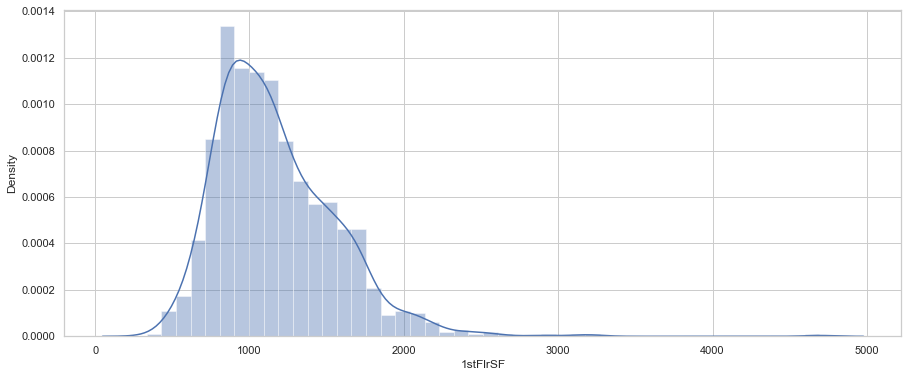

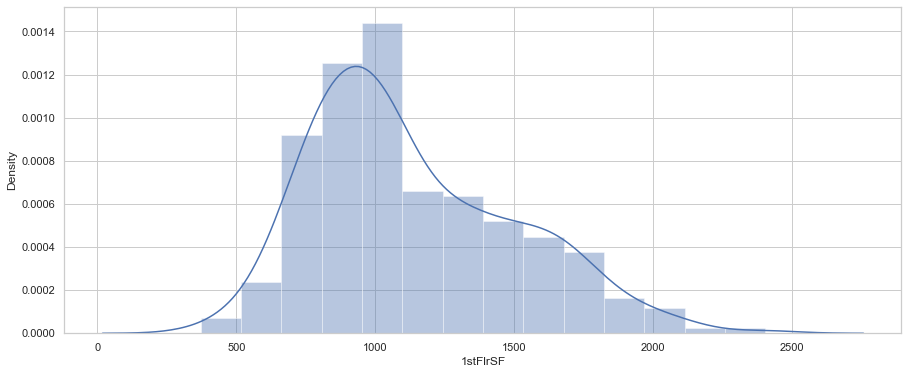

In [2288]:
#check Distribution by Histogram in train

histogram(train,"1stFlrSF")
#check Distribution by Histogram in test

histogram(test,"1stFlrSF")

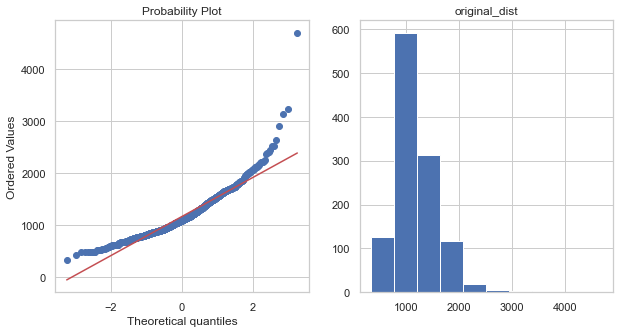

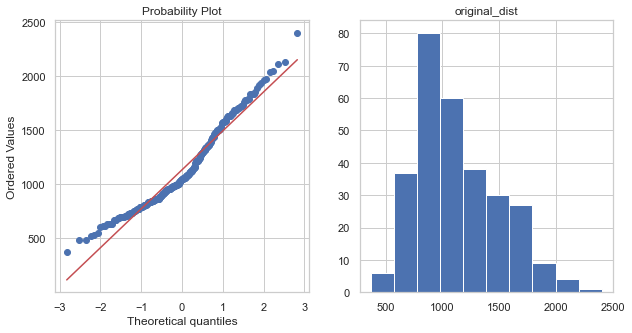

In [2289]:
#check Distribution by QQ-plot in train

original_dist(train,"1stFlrSF")


#check Distribution by QQ-plot in test

original_dist(test,"1stFlrSF")

In [2290]:
#1stFlrSF distribution seems to normally distributed. so detect outliers (by mean-+3std) in train
outlier_normally(train,"1stFlrSF")

#1stFlrSF distribution seems to normally distributed. so detect outliers (by mean-+3std) in test
outlier_normally(test,"1stFlrSF")

(32.86602337621912, 2234.517538267616)

In [2291]:
# In 1stFlrSF more than 2336.667 value consider as outliers in train

train.loc[train["1stFlrSF"]>=2336.667,"1stFlrSF"]=2336.667

# In 1stFlrSF more than 2336.667 value consider as outliers in test

test.loc[test["1stFlrSF"]>=2336.667,"1stFlrSF"]=2336.667

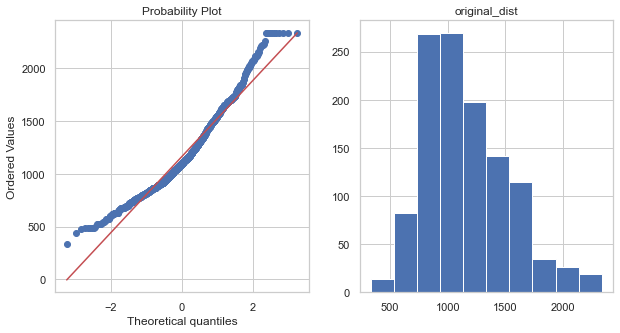

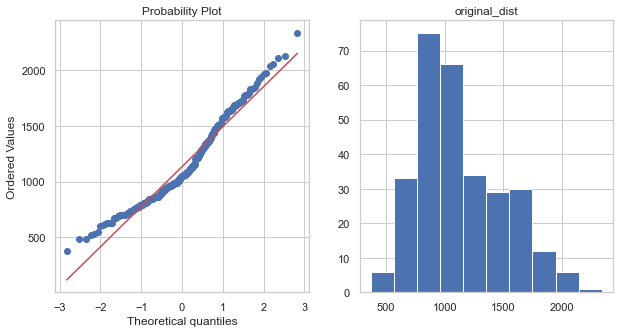

In [2292]:
original_dist(train,"1stFlrSF")
original_dist(test,"1stFlrSF")

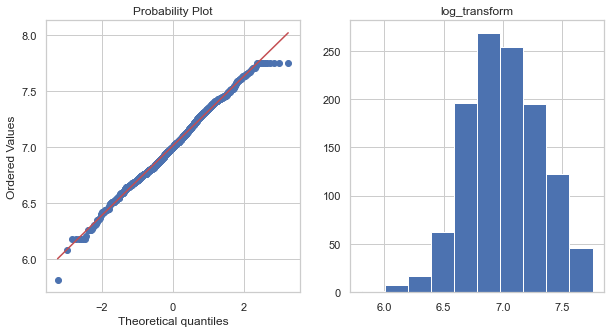

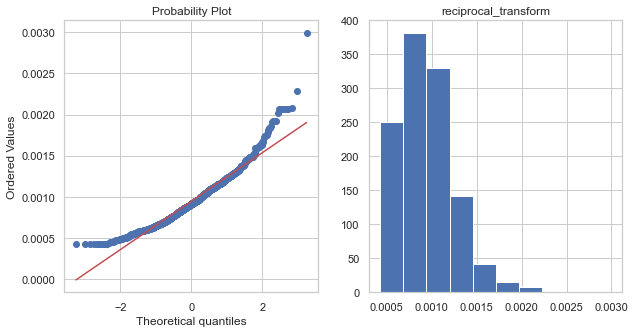

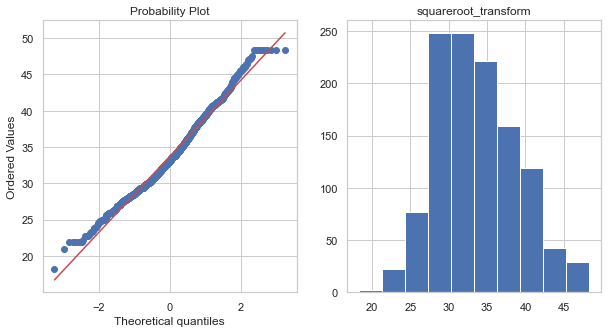

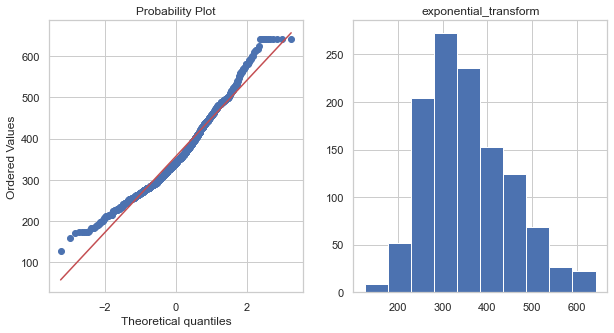

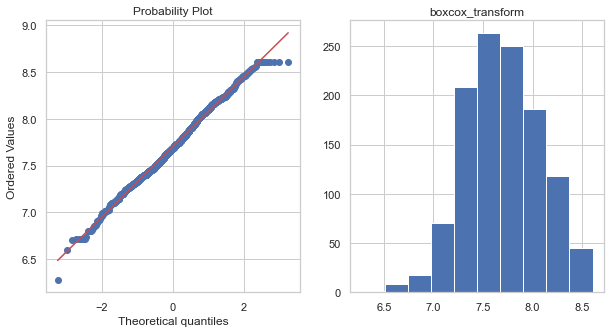

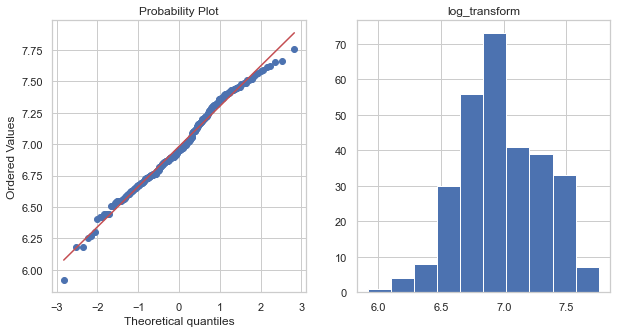

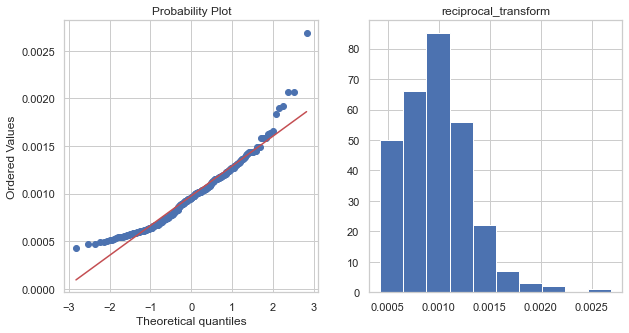

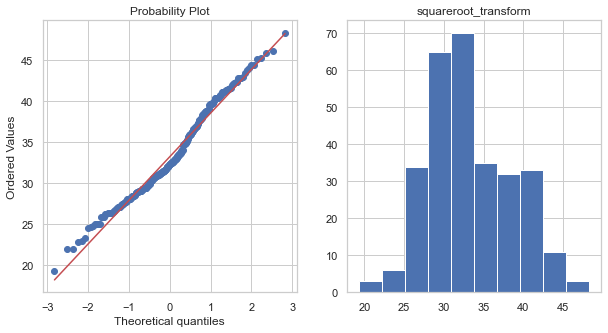

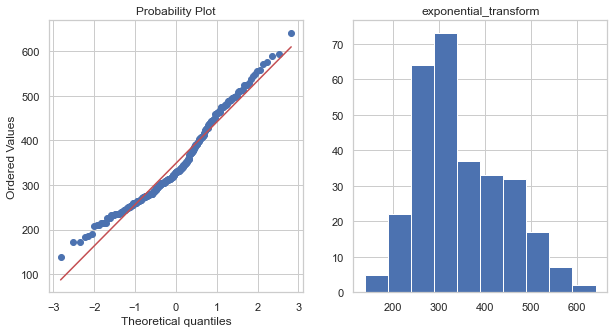

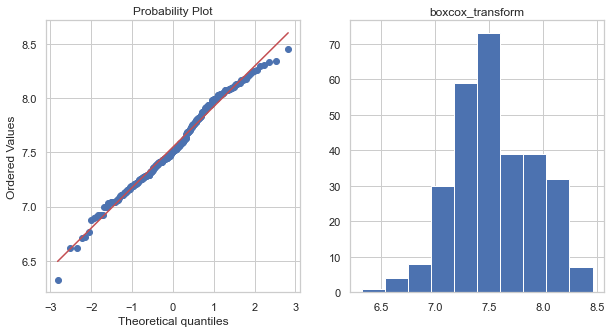

In [2293]:
#Apply Some Transformation Techniques on 1stFlrSF for make distribution as Normally Distributed and check Distribution by QQ plot in train

log_transform(train,"1stFlrSF")

reciprocal_transform(train,"1stFlrSF")

squareroot_transform(train,"1stFlrSF")

exponential_transform(train,"1stFlrSF")

boxcox_transform(train,"1stFlrSF")




#Apply Some Transformation Techniques on 1stFlrSF for make distribution as Normally Distributed and check Distribution by QQ plot in test

log_transform(test,"1stFlrSF")

reciprocal_transform(test,"1stFlrSF")

squareroot_transform(test,"1stFlrSF")

exponential_transform(test,"1stFlrSF")

boxcox_transform(test,"1stFlrSF")

After boxcox Transformation 1stFlrSF feature seems more Normally Distributed so apply boxcox Transformation on Main Dataset

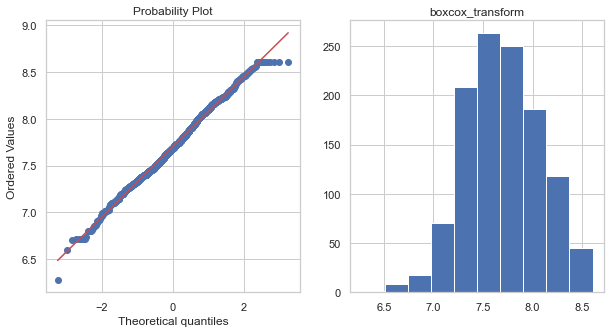

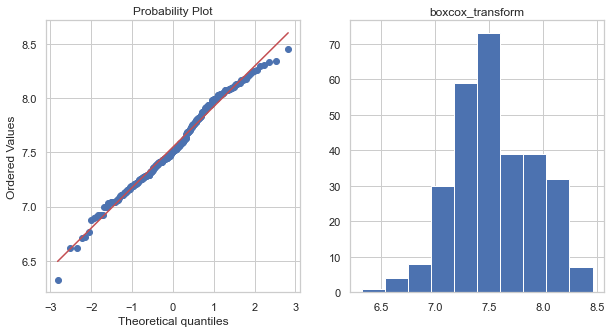

In [2294]:
if 0 in train["1stFlrSF"].unique():
    pass
else:
    train["1stFlrSF"],parameter = stats.boxcox(train["1stFlrSF"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(train["1stFlrSF"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    train["1stFlrSF"].hist()
    plt.title("boxcox_transform")
    
    
    
if 0 in test["1stFlrSF"].unique():
    pass
else:
    test["1stFlrSF"],parameter = stats.boxcox(test["1stFlrSF"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(test["1stFlrSF"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    test["1stFlrSF"].hist()
    plt.title("boxcox_transform")

# 2ndFlrSF Feature

In [2295]:
train["2ndFlrSF"].describe()

count    1168.000000
mean      348.826199
std       439.696370
min         0.000000
25%         0.000000
50%         0.000000
75%       729.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [2296]:
test["2ndFlrSF"].describe()

count     292.000000
mean      339.657534
std       424.278825
min         0.000000
25%         0.000000
50%         0.000000
75%       717.000000
max      1589.000000
Name: 2ndFlrSF, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


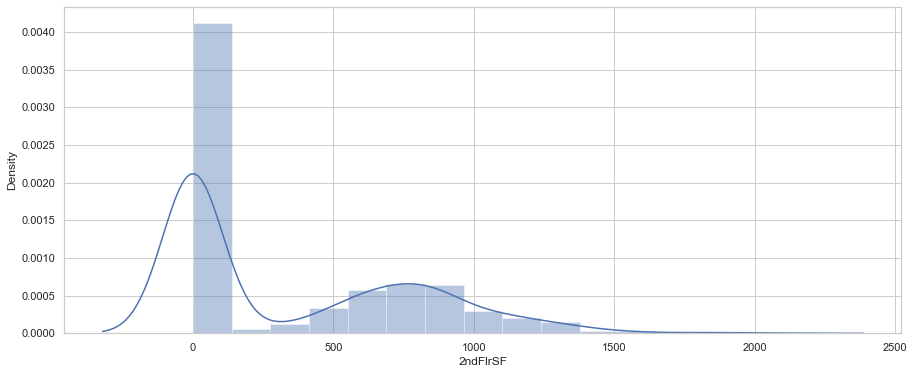

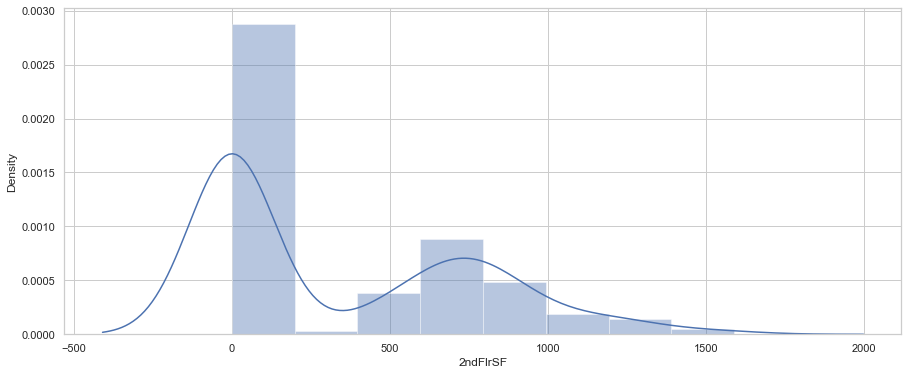

In [2297]:
#check Distribution by Histogram in train

histogram(train,"2ndFlrSF")

#check Distribution by Histogram in test

histogram(test,"2ndFlrSF")

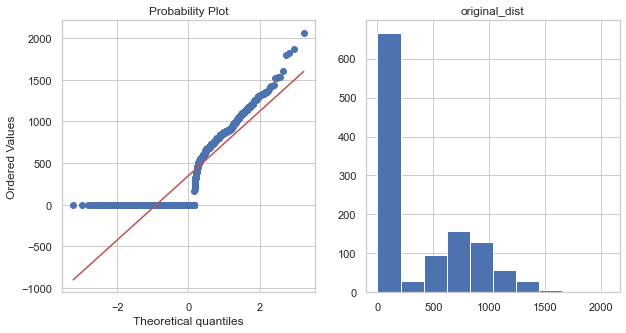

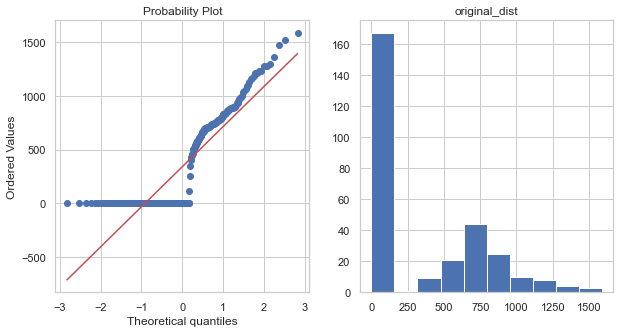

In [2298]:
original_dist(train,"2ndFlrSF")

original_dist(test,"2ndFlrSF")

In [2299]:
# 2ndFlrSF feature is right skewed so detect ouliers by 1.5*IQR in train

outlier_IQR(train,"2ndFlrSF")

# 2ndFlrSF feature is right skewed so detect ouliers by 1.5*IQR in test

outlier_IQR(test,"2ndFlrSF")

(-1075.5, 1792.5)

In [2300]:
# In 2ndFlrSF more than 1760 value consider as outliers in train

train.loc[train["2ndFlrSF"]>=1760,"2ndFlrSF"]=1760

# In 2ndFlrSF more than 1760 value consider as outliers in test

test.loc[test["2ndFlrSF"]>=1760,"2ndFlrSF"]=1760

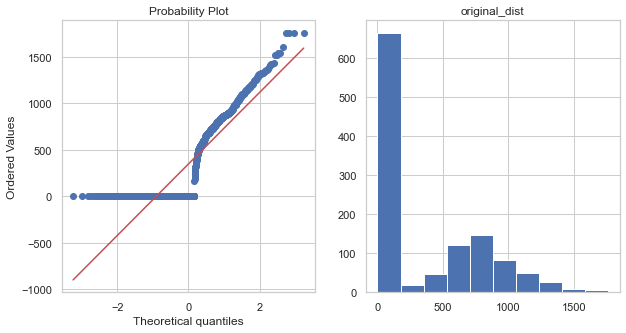

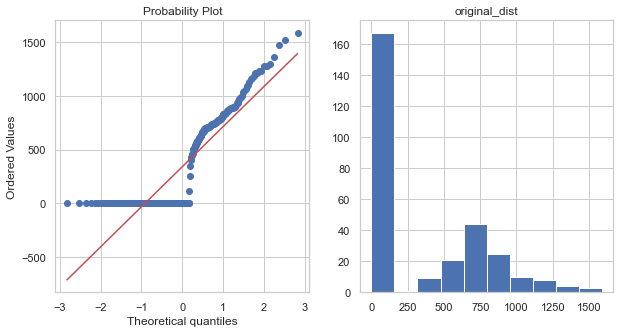

In [2301]:
original_dist(train,"2ndFlrSF")

original_dist(test,"2ndFlrSF")

# LowQualFinSF Feature

In [2302]:
train["LowQualFinSF"].describe()

count    1168.000000
mean        6.380137
std        50.892844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

In [2303]:
test["LowQualFinSF"].describe()

count    292.000000
mean       3.702055
std       38.219527
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      479.000000
Name: LowQualFinSF, dtype: float64

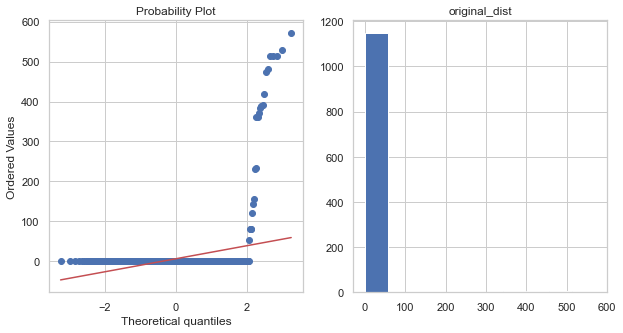

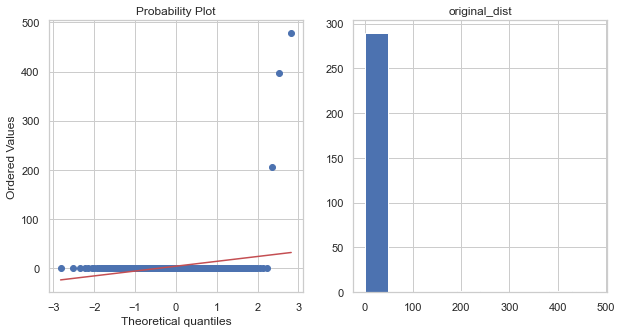

In [2304]:
original_dist(train,"LowQualFinSF")
original_dist(test,"LowQualFinSF")

In [2305]:
outlier_normally(train,"LowQualFinSF")
outlier_normally(test,"LowQualFinSF")

(-110.95652562998372, 118.36063521902481)

In [2306]:
# In LowQualFinSF more than 143.88 value consider as outliers in train

train.loc[train["LowQualFinSF"]>=143.88,"LowQualFinSF"]=143.88

# In LowQualFinSF more than 143.88 value consider as outliers in test

test.loc[test["LowQualFinSF"]>=143.88,"LowQualFinSF"]=143.88

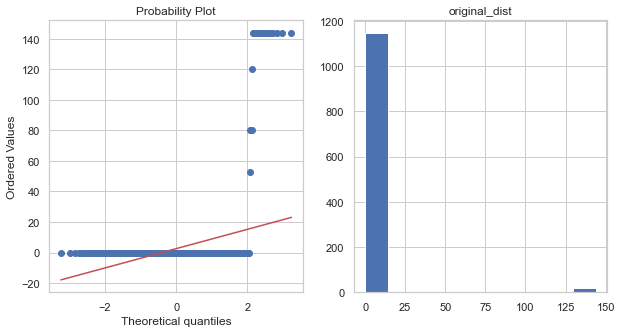

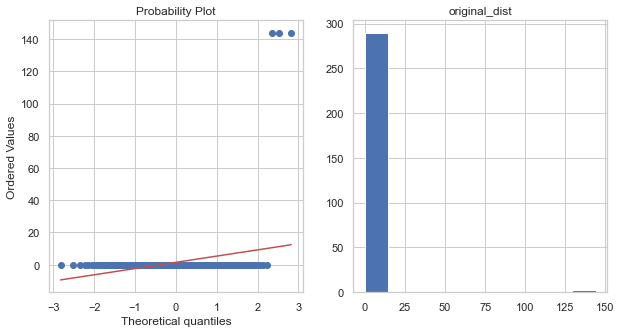

In [2307]:
original_dist(train,"LowQualFinSF")


original_dist(test,"LowQualFinSF")

# GrLivArea Feature

In [2308]:
train["GrLivArea"].describe()

count    1168.000000
mean     1525.066781
std       528.042957
min       334.000000
25%      1143.250000
50%      1468.500000
75%      1795.000000
max      5642.000000
Name: GrLivArea, dtype: float64

In [2309]:
test["GrLivArea"].describe()

count     292.000000
mean     1477.051370
std       514.199429
min       520.000000
25%      1061.500000
50%      1440.000000
75%      1720.250000
max      3447.000000
Name: GrLivArea, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


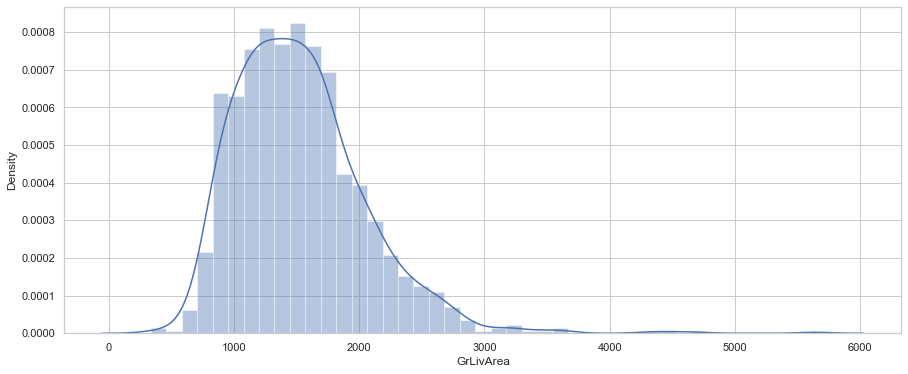

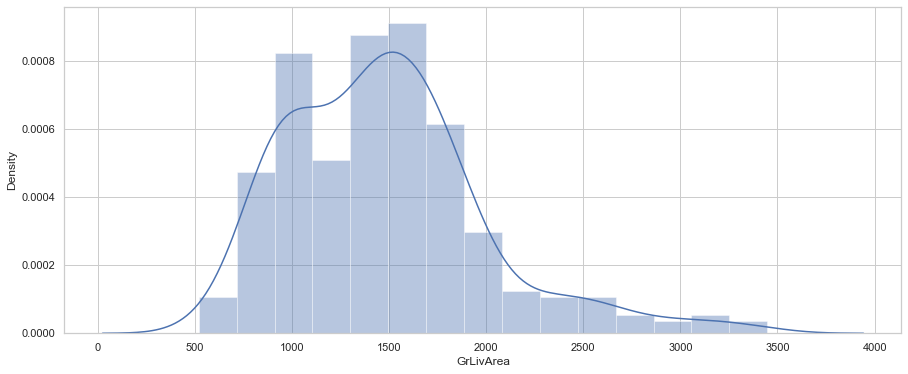

In [2310]:
#check Distribution by Histogram in train

histogram(train,"GrLivArea")

#check Distribution by Histogram in test

histogram(test,"GrLivArea")

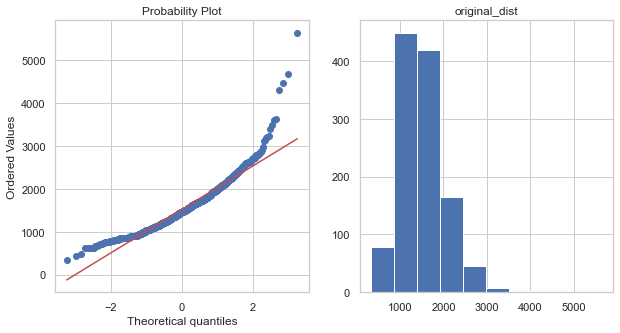

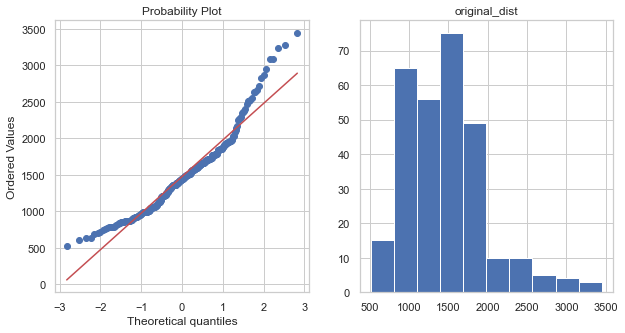

In [2311]:
#check distribution by qq-plot in train
original_dist(train,"GrLivArea")
#check distribution by qq-plot in test
original_dist(test,"GrLivArea")

In [2312]:
#GrLivArea distribution seems to normally distributed. so detect outliers (by mean-+3std) in train

outlier_normally(train,"GrLivArea")

#GrLivArea distribution seems to normally distributed. so detect outliers (by mean-+3std) in test

outlier_normally(test,"GrLivArea")

(-65.5469158270696, 3019.6496555530966)

In [2313]:
# In GrLivArea more than 3018.91 value consider as outliers in train

train.loc[train["GrLivArea"]>=3018.91,"GrLivArea"]=3018.91

# In GrLivArea more than 3018.91 value consider as outliers in test

test.loc[test["GrLivArea"]>=3018.91,"GrLivArea"]=3018.91

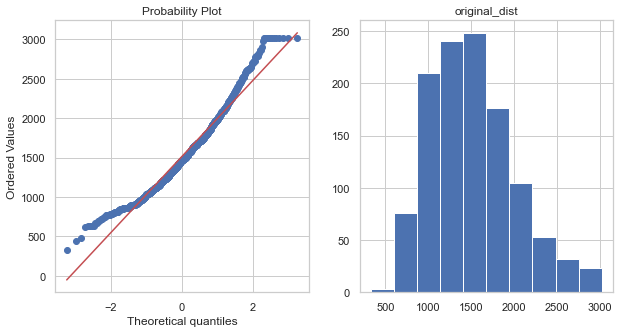

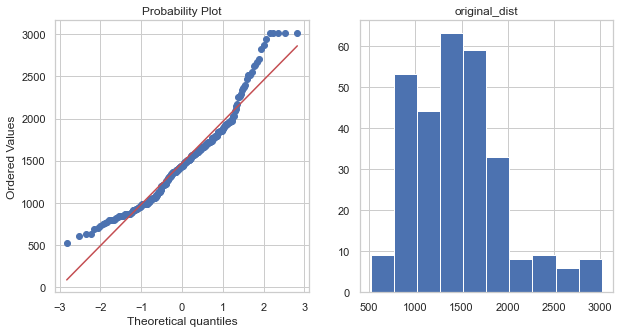

In [2314]:
original_dist(train,"GrLivArea")
original_dist(test,"GrLivArea")

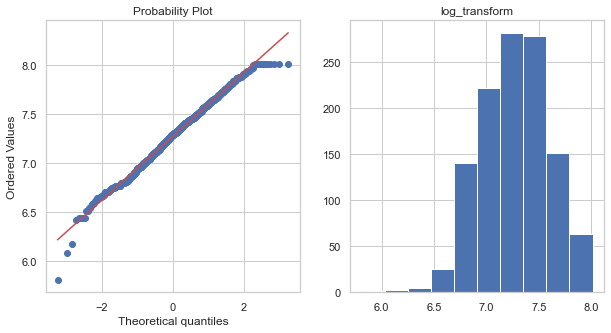

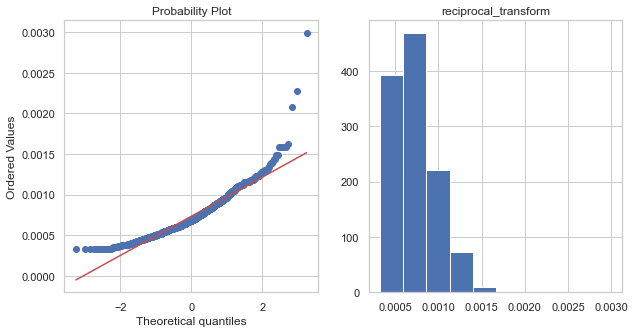

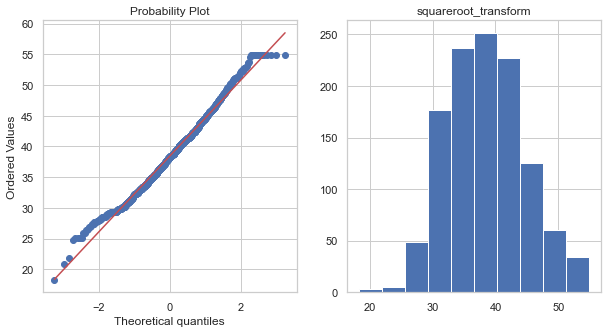

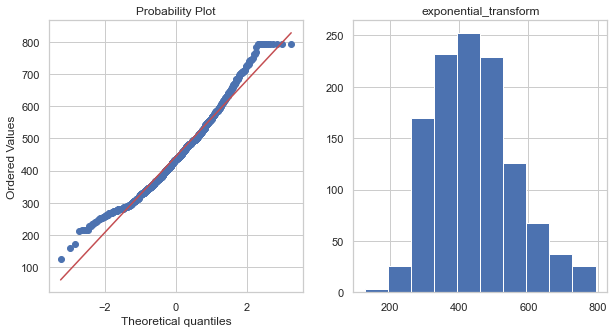

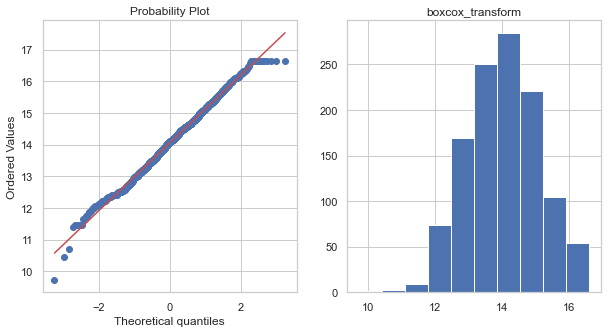

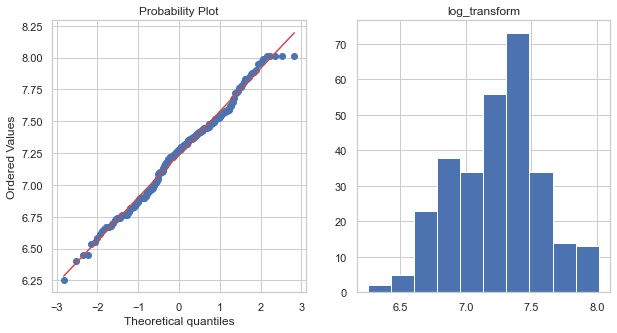

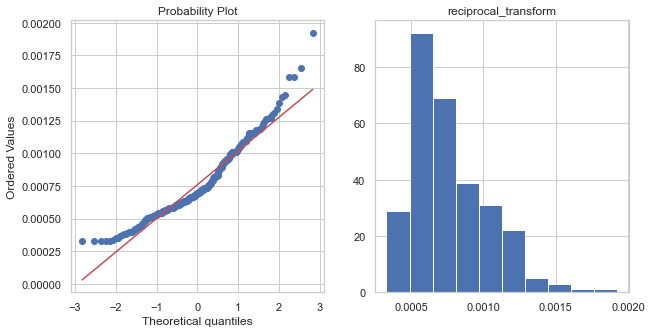

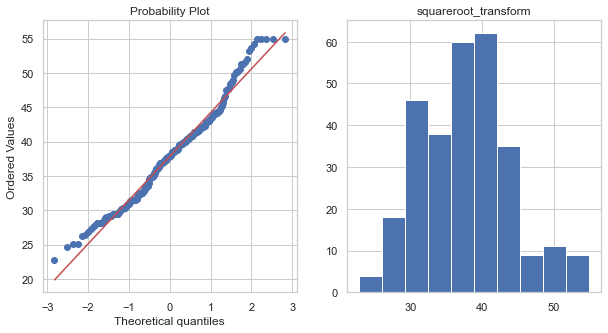

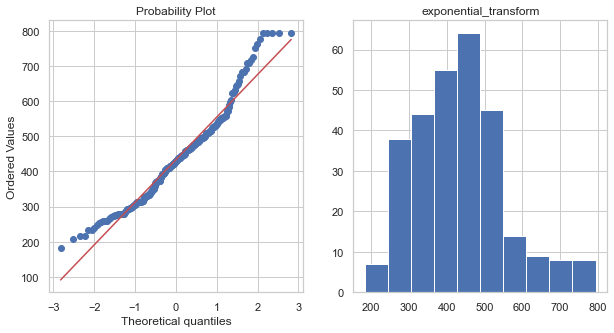

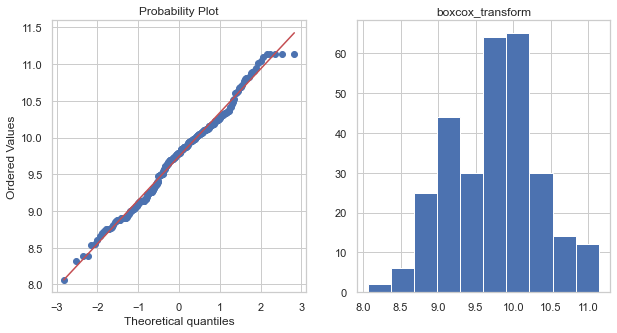

In [2315]:
#Apply Some Transformation Techniques on GrLivArea for make distribution as Normally Distributed and check Distribution by QQ plot in train

log_transform(train,"GrLivArea")

reciprocal_transform(train,"GrLivArea")

squareroot_transform(train,"GrLivArea")

exponential_transform(train,"GrLivArea")

boxcox_transform(train,"GrLivArea")




#Apply Some Transformation Techniques on GrLivArea for make distribution as Normally Distributed and check Distribution by QQ plot in test

log_transform(test,"GrLivArea")

reciprocal_transform(test,"GrLivArea")

squareroot_transform(test,"GrLivArea")

exponential_transform(test,"GrLivArea")

boxcox_transform(test,"GrLivArea")

After boxcox Transformation GrLivArea feature seems more Normally Distributed so apply boxcox Transformation on Main Dataset.

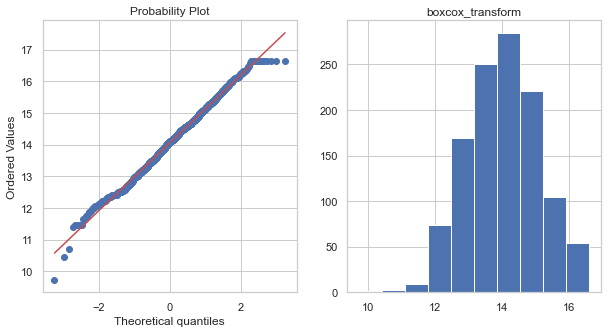

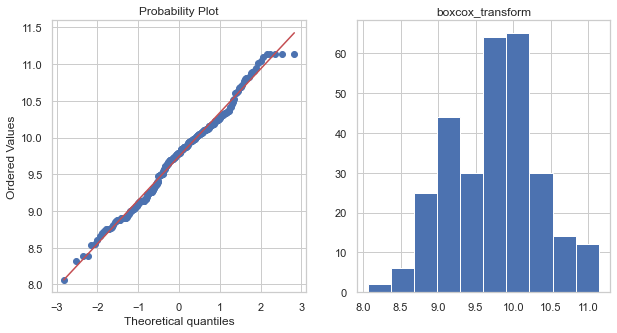

In [2316]:
if 0 in train["GrLivArea"].unique():
    pass
else:
    train["GrLivArea"],parameter = stats.boxcox(train["GrLivArea"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(train["GrLivArea"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    train["GrLivArea"].hist()
    plt.title("boxcox_transform")
    
    
    
if 0 in test["GrLivArea"].unique():
    pass
else:
    test["GrLivArea"],parameter = stats.boxcox(test["GrLivArea"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(test["GrLivArea"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    test["GrLivArea"].hist()
    plt.title("boxcox_transform")

# GarageArea Feature

In [2317]:
train["GarageArea"].describe()


count    1168.000000
mean      476.860445
std       214.466769
min         0.000000
25%       338.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [2318]:
test["GarageArea"].describe()

count     292.000000
mean      457.458904
std       210.785591
min         0.000000
25%       300.000000
50%       467.500000
75%       569.750000
max      1052.000000
Name: GarageArea, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


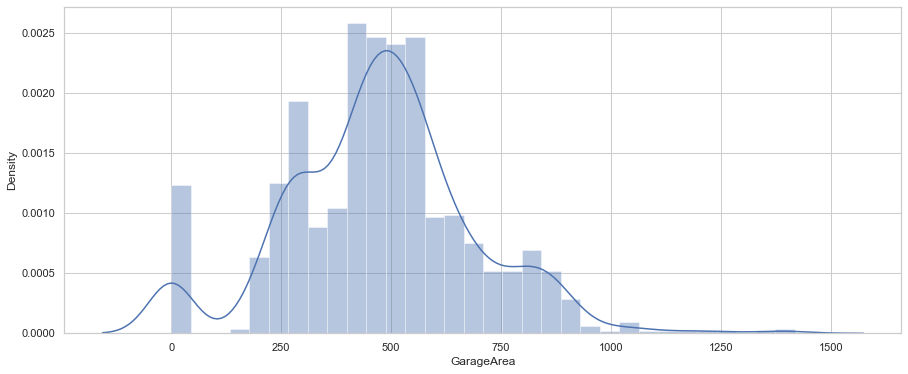

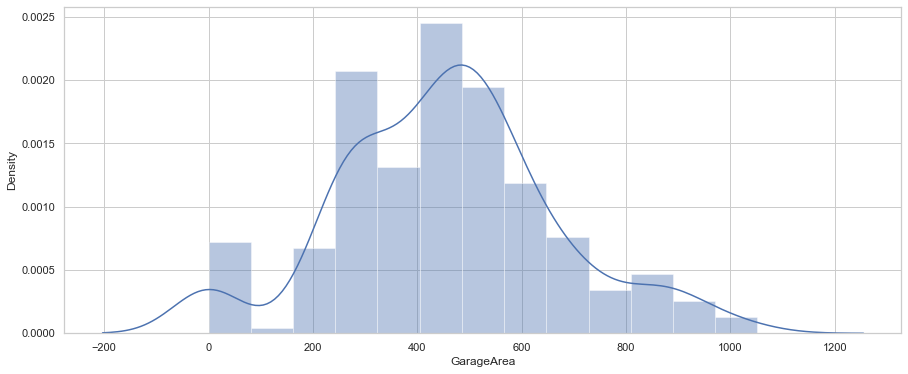

In [2319]:
#check Distribution by Histogram.

histogram(train,"GarageArea")


#check Distribution by Histogram.

histogram(test,"GarageArea")

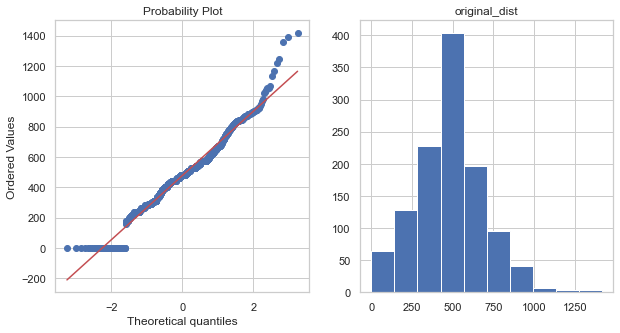

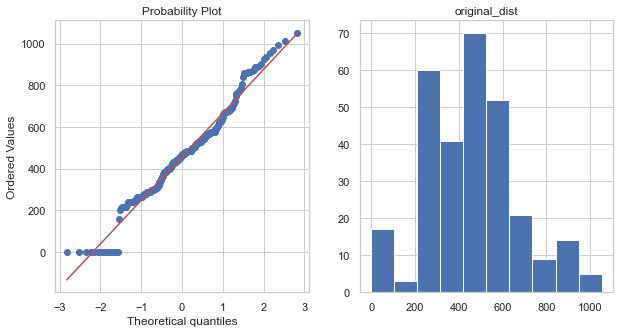

In [2320]:
#check distribution by qq-plot in train
original_dist(train,"GarageArea")

#check distribution by qq-plot in test
original_dist(test,"GarageArea")

In [2321]:
#GarageArea distribution seems to normally distributed. so detect outliers (by mean-+3std) in train

outlier_normally(train,"GarageArea")


#GarageArea distribution seems to normally distributed. so detect outliers (by mean-+3std) in test

outlier_normally(test,"GarageArea")

(-174.89786848061618, 1089.8156766997943)

In [2322]:
# In GarageArea more than  1119.31 value consider as outliers in train

train.loc[train["GarageArea"]>= 1119.31,"GarageArea"] =  1119.31

# In GarageArea more than  1119.31 value consider as outliers in test

test.loc[test["GarageArea"]>= 1119.31,"GarageArea"] =  1119.31

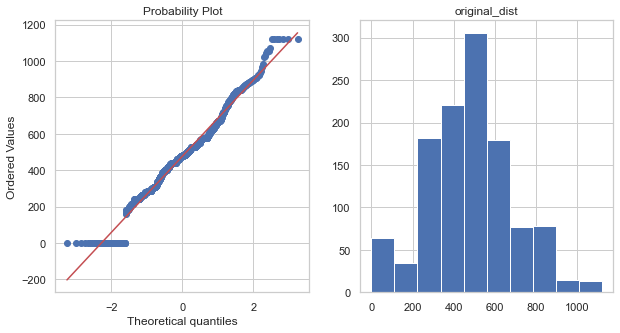

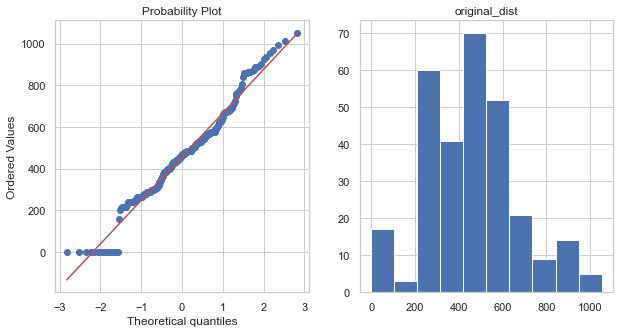

In [2323]:
original_dist(train,"GarageArea")

original_dist(test,"GarageArea")

# WoodDeckSF Feature

In [2324]:
train['WoodDeckSF'].describe()


count    1168.000000
mean       96.206336
std       126.158988
min         0.000000
25%         0.000000
50%         0.000000
75%       171.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

In [2325]:
test['WoodDeckSF'].describe()

count    292.000000
mean      86.397260
std      121.898836
min        0.000000
25%        0.000000
50%        0.000000
75%      149.250000
max      728.000000
Name: WoodDeckSF, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


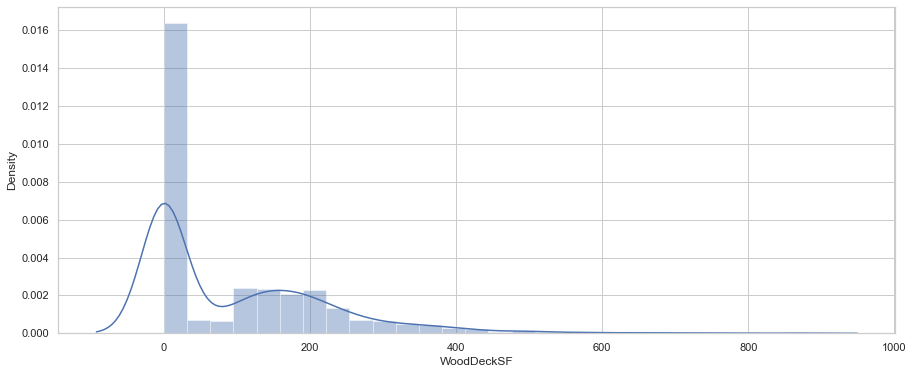

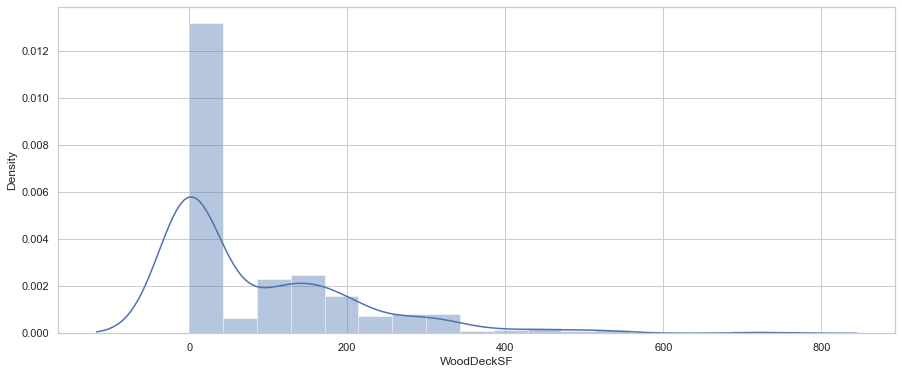

In [2326]:
#check Distribution by Histogram in train

histogram(train,"WoodDeckSF")

#check Distribution by Histogram in test

histogram(test,"WoodDeckSF")

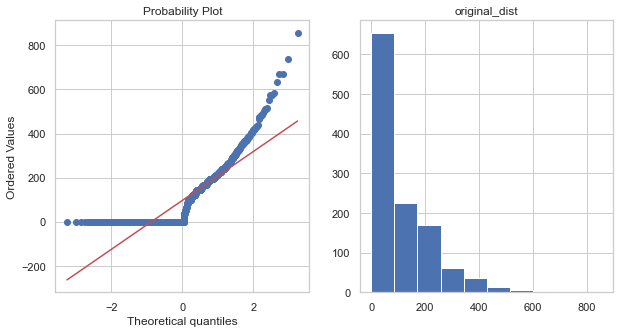

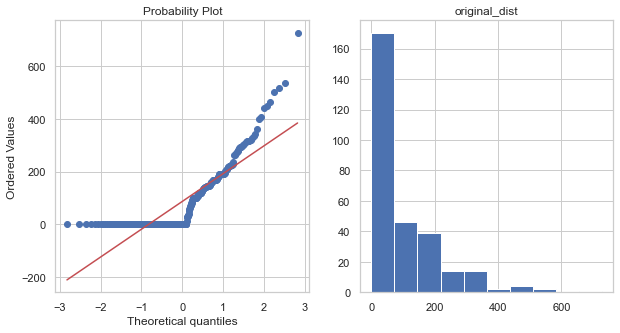

In [2327]:
#check Distribution by qq-plot in train

original_dist(train,"WoodDeckSF")

#check Distribution by qq-plot in test

original_dist(test,"WoodDeckSF")

In [2328]:
# WoodDeckSF feature is right skewed so detect ouliers by 3*IQR in train

outlier_IQR3(train,"WoodDeckSF")

# WoodDeckSF feature is right skewed so detect ouliers by 3*IQR in test

outlier_IQR3(test,"WoodDeckSF")

(-447.75, 597.0)

In [2329]:
# In WoodDeckSF more than 672.0 value consider as outliers in train

train.loc[train["WoodDeckSF"]>=672.0,"WoodDeckSF"] = 672.0
# In WoodDeckSF more than 672.0 value consider as outliers in test

test.loc[test["WoodDeckSF"]>=672.0,"WoodDeckSF"] = 672.0

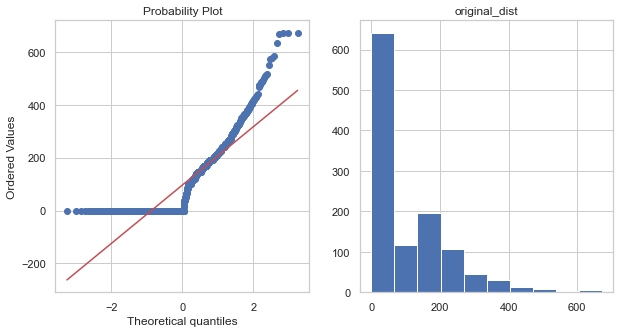

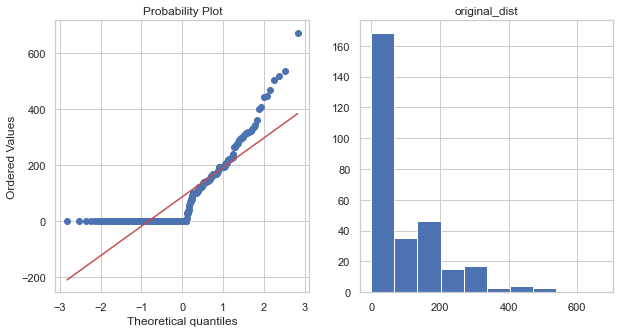

In [2330]:
original_dist(train,"WoodDeckSF")
original_dist(test,"WoodDeckSF")

# OpenPorchSF feature

In [2331]:
train['OpenPorchSF'].describe()

count    1168.000000
mean       46.559932
std        66.381023
min         0.000000
25%         0.000000
50%        24.000000
75%        70.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

In [2332]:
test['OpenPorchSF'].describe()

count    292.000000
mean      47.061644
std       65.865449
min        0.000000
25%        0.000000
50%       28.500000
75%       66.000000
max      418.000000
Name: OpenPorchSF, dtype: float64

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


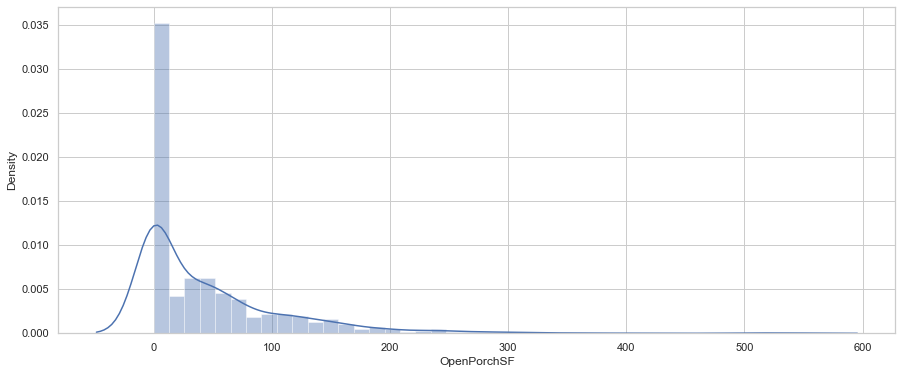

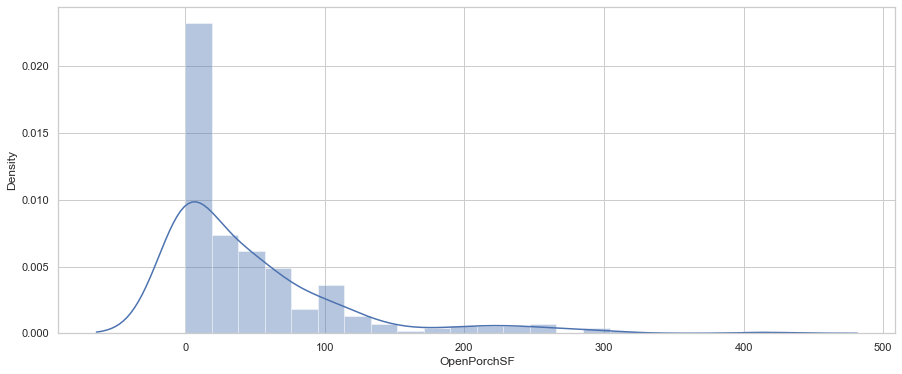

In [2333]:
#check Distribution by Histogram in train

histogram(train,"OpenPorchSF")

#check Distribution by Histogram in test

histogram(test,"OpenPorchSF")

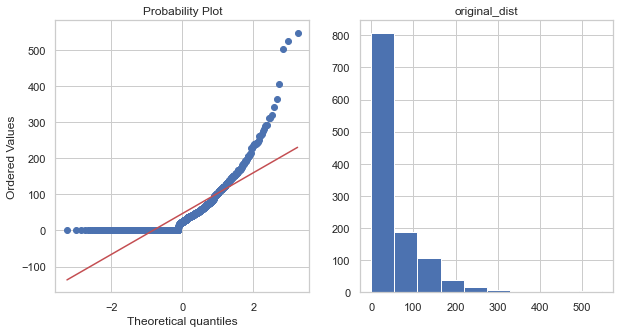

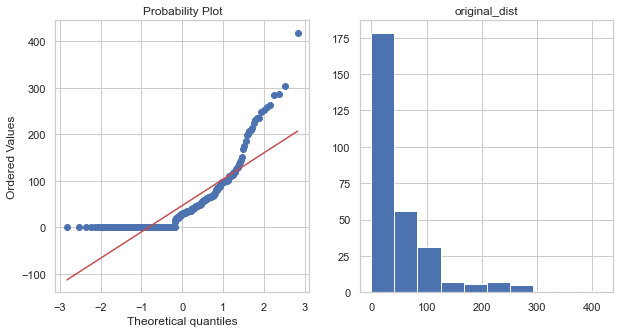

In [2334]:
#check Distribution by qq-plot in train

original_dist(train,"OpenPorchSF")

#check Distribution by qq-plot in test

original_dist(test,"OpenPorchSF")

In [2335]:
# OpenPorchSF feature is right skewed so detect ouliers by 3*IQR in train

outlier_IQR3(train,"OpenPorchSF")

# OpenPorchSF feature is right skewed so detect ouliers by 3*IQR in test

outlier_IQR3(test,"OpenPorchSF")

(-198.0, 264.0)

In [2336]:
# In OpenPorchSF more than 280.0 value consider as outliers in train

train.loc[train["OpenPorchSF"]>=280.0,"OpenPorchSF"] = 280.0

# In OpenPorchSF more than 280.0 value consider as outliers in test

test.loc[test["OpenPorchSF"]>=280.0,"OpenPorchSF"] = 280.0

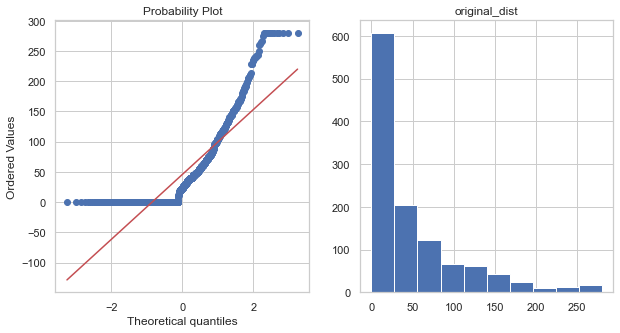

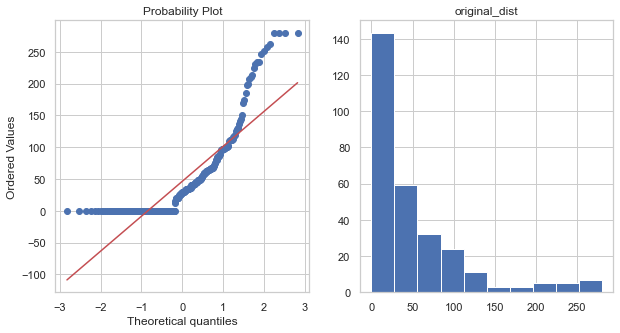

In [2337]:
original_dist(train,"OpenPorchSF")
original_dist(test,"OpenPorchSF")

# EnclosedPorch Feature

In [2338]:
train['EnclosedPorch'].describe()

count    1168.000000
mean       23.015411
std        63.191089
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

In [2339]:
test['EnclosedPorch'].describe()

count    292.000000
mean      17.708904
std       51.892906
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      330.000000
Name: EnclosedPorch, dtype: float64

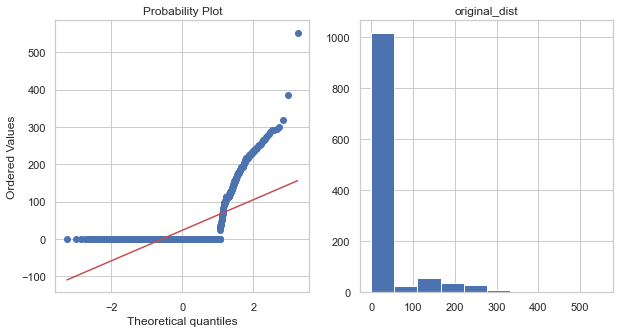

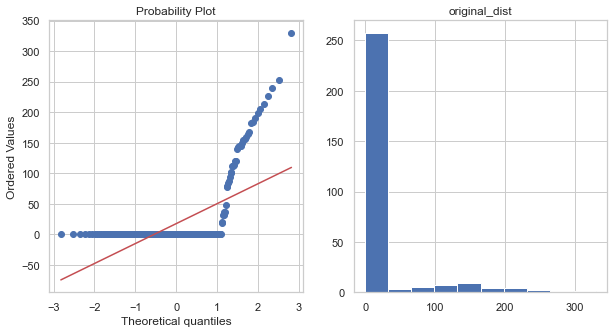

In [2340]:
#check Distribution by qq-plot in train

original_dist(train,"EnclosedPorch")

#check Distribution by qq-plot in test

original_dist(test,"EnclosedPorch")

In [2341]:
outlier_normally(train,"EnclosedPorch")

outlier_normally(test,"EnclosedPorch")

(-137.96981509729633, 173.38762331647442)

In [2342]:
# In EnclosedPorch more than215.831 value consider as outliers in train

train.loc[train["EnclosedPorch"]>=215.831,"EnclosedPorch"] = 215.831

# In EnclosedPorch more than215.831 value consider as outliers in test

test.loc[test["EnclosedPorch"]>=215.831,"EnclosedPorch"] = 215.831

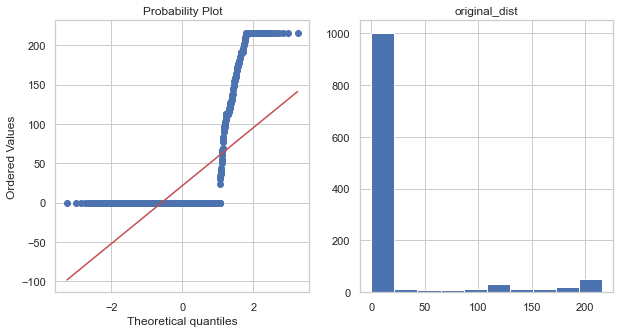

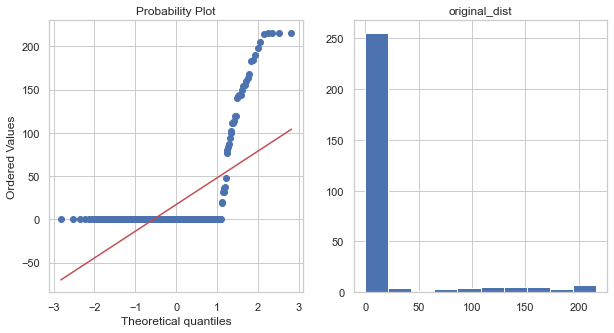

In [2343]:
original_dist(train,"EnclosedPorch")

original_dist(test,"EnclosedPorch")

# 3SsnPorch Feature

In [2344]:
train['3SsnPorch'].describe()

count    1168.000000
mean        3.639555
std        29.088867
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [2345]:
test['3SsnPorch'].describe()

count    292.000000
mean       2.489726
std       30.247488
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      407.000000
Name: 3SsnPorch, dtype: float64

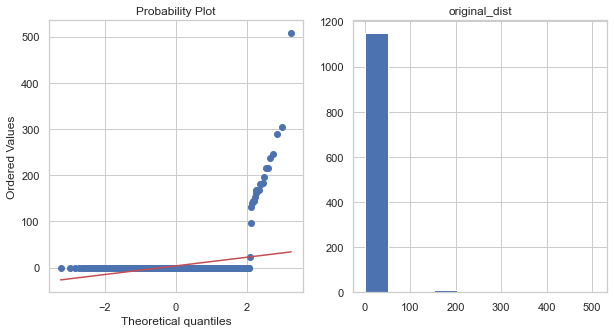

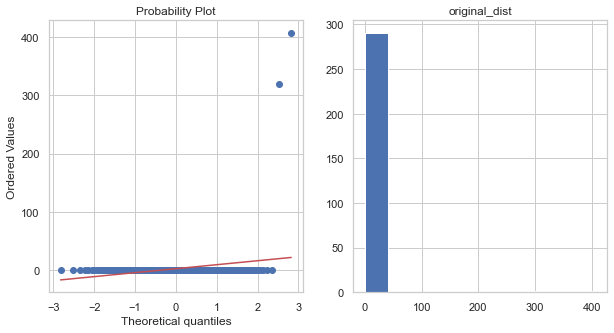

In [2346]:
#check Distribution by qq-plot in  train

original_dist(train,"3SsnPorch")

#check Distribution by qq-plot in test


original_dist(test,"3SsnPorch")

In [2347]:
outlier_normally(train,"3SsnPorch")

outlier_normally(test,"3SsnPorch")

(-88.25273880045215, 93.23219085524666)

In [2348]:
# In 3SsnPorch more than 78.1667 value consider as outliers in  train

train.loc[train["3SsnPorch"] >= 78.1667,"3SsnPorch"] = 78.1667

# In 3SsnPorch more than 78.1667 value consider as outliers in test

test.loc[test["3SsnPorch"] >= 78.1667,"3SsnPorch"] = 78.1667

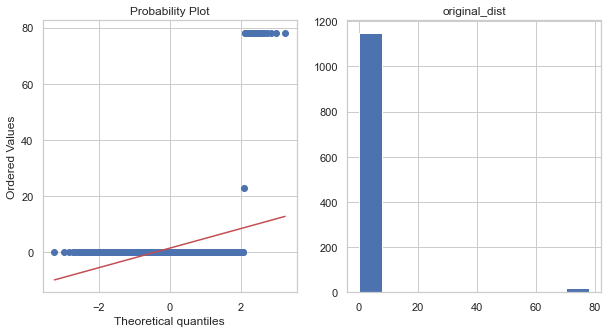

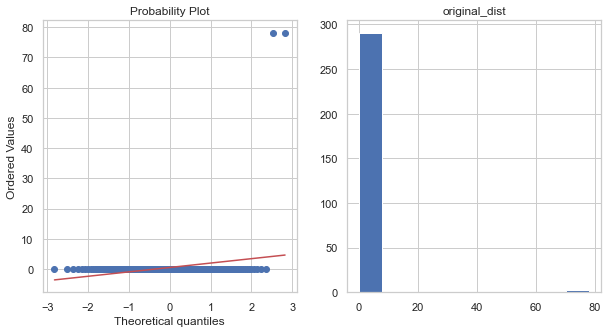

In [2349]:
original_dist(train,"3SsnPorch")

original_dist(test,"3SsnPorch")

# ScreenPorch Feature

In [2350]:
train['ScreenPorch'].describe()

count    1168.000000
mean       15.051370
std        55.080816
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

In [2351]:
test['ScreenPorch'].describe()

count    292.000000
mean      15.099315
std       58.483473
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      396.000000
Name: ScreenPorch, dtype: float64

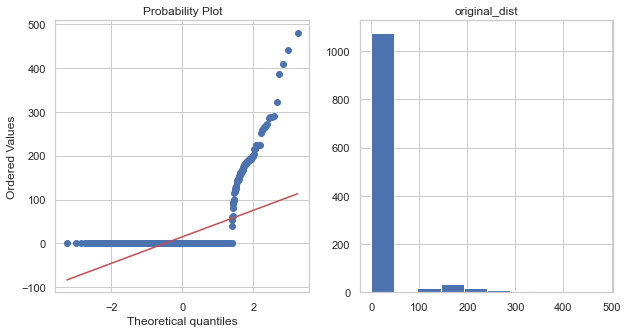

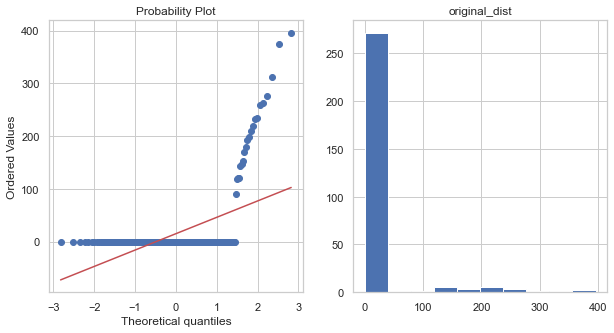

In [2352]:
#check Distribution by qq-plot in train

original_dist(train,"ScreenPorch")

#check Distribution by qq-plot in test

original_dist(test,"ScreenPorch")

In [2353]:
outlier_normally(train,"ScreenPorch")

outlier_normally(test,"ScreenPorch")

(-160.35110262245513, 190.54973275944144)

In [2354]:
# In ScreenPorch more than 184.61 value consider as outliers in train

train.loc[train["ScreenPorch"] >= 184.61,"ScreenPorch"] = 184.61


# In ScreenPorch more than 184.61 value consider as outliers in test

test.loc[test["ScreenPorch"] >= 184.61,"ScreenPorch"] = 184.61

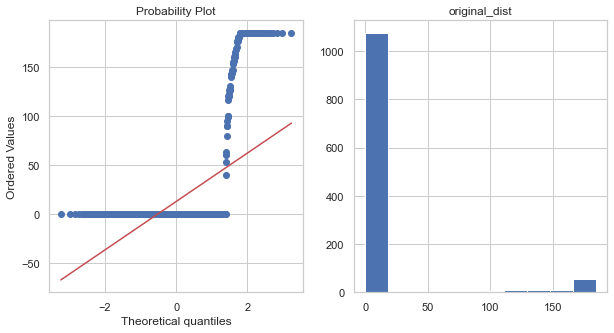

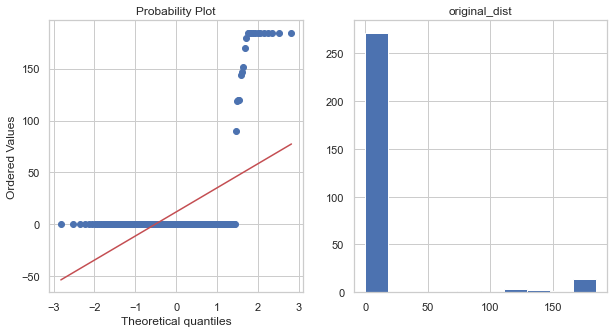

In [2355]:
original_dist(train,"ScreenPorch")


original_dist(test,"ScreenPorch")

# PoolArea feature

In [2356]:
train['PoolArea'].describe()

count    1168.000000
mean        3.448630
std        44.896939
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [2357]:
test['PoolArea'].describe()

count    292.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: PoolArea, dtype: float64

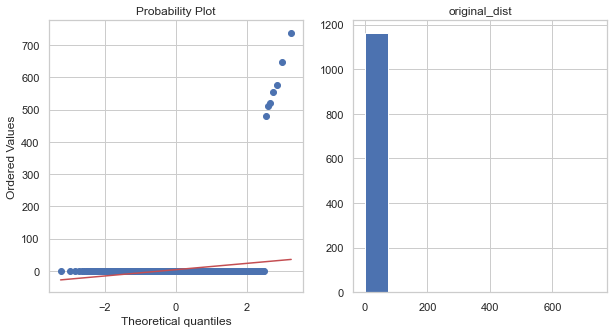

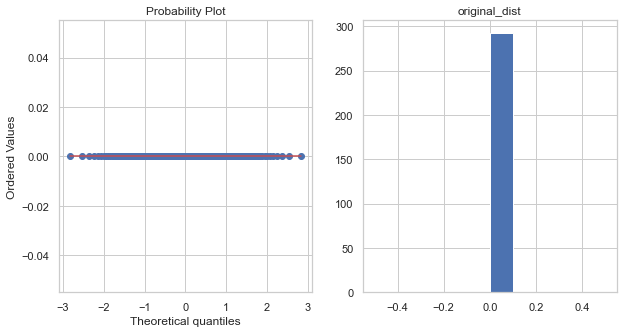

In [2358]:
#check Distribution by qq-plot in train

original_dist(train,"PoolArea")

#check Distribution by qq-plot in test

original_dist(test,"PoolArea")

In [2359]:
outlier_normally(train,"PoolArea")


outlier_normally(test,"PoolArea")

(0.0, 0.0)

In [2360]:
# In PoolArea more than 109.243 value consider as outliers in train

train.loc[train["PoolArea"] >= 109.243,"PoolArea"] = 109.2437


# In PoolArea more than 109.243 value consider as outliers in test

test.loc[test["PoolArea"] >= 109.243,"PoolArea"] = 109.2437

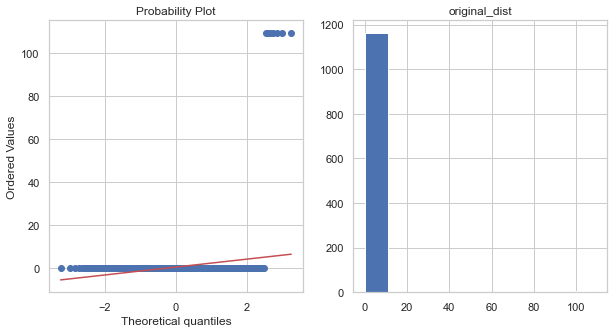

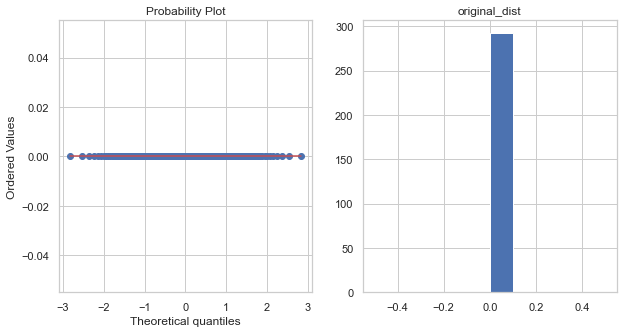

In [2361]:
original_dist(train,"PoolArea")

original_dist(test,"PoolArea")

# MiscVal Feature

In [2362]:
train['MiscVal'].describe()

count     1168.000000
mean        47.315068
std        543.264432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [2363]:
test['MiscVal'].describe()

count     292.000000
mean       28.184932
std       224.036218
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3500.000000
Name: MiscVal, dtype: float64

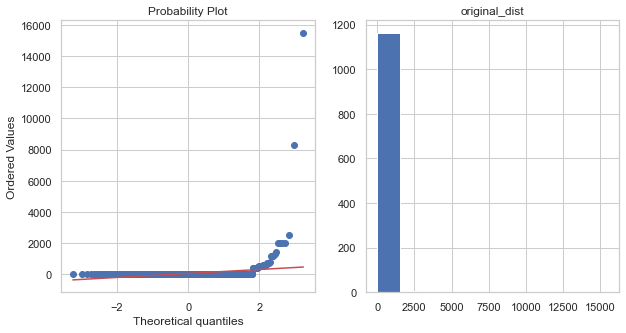

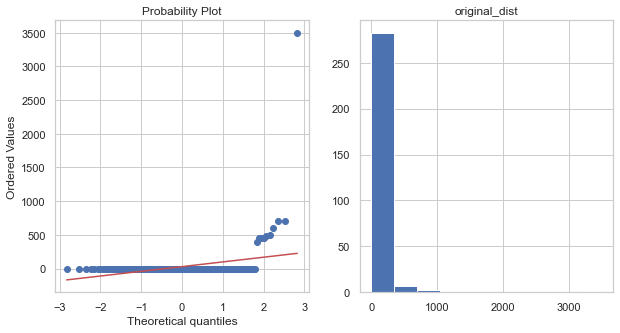

In [2364]:
#check Distribution by qq-plot in train

original_dist(train,"MiscVal")

#check Distribution by qq-plot in test

original_dist(test,"MiscVal")

In [2365]:
outlier_normally(train,"MiscVal")

outlier_normally(test,"MiscVal")

(-643.9237216592726, 700.2935846729713)

In [2366]:
# In MiscVal more than 1753.032 value consider as outliers in train

train.loc[train["MiscVal"] >= 1753.032,"MiscVal"] = 1753.032


# In MiscVal more than 1753.032 value consider as outliers in test

test.loc[test["MiscVal"] >= 1753.032,"MiscVal"] = 1753.032

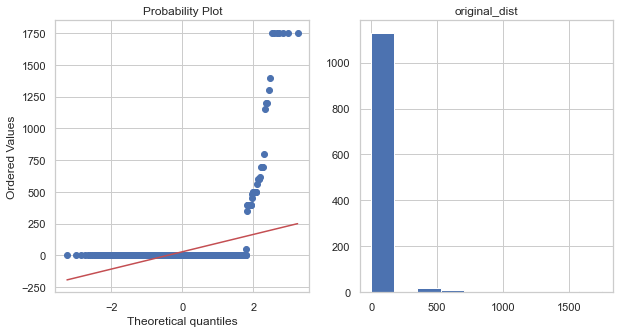

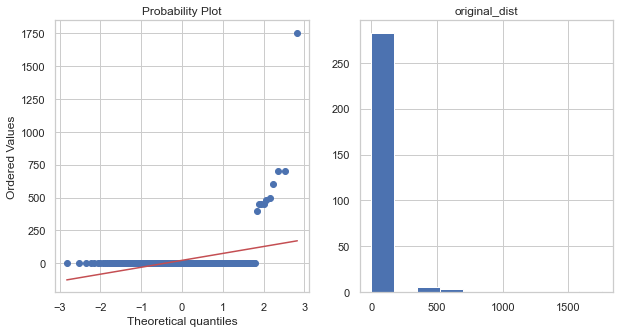

In [2367]:
original_dist(train,"MiscVal")

original_dist(test,"MiscVal")

In [2368]:
numerical_features.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Encoding on Categorical Features

In [2369]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [2370]:
# Assing ordinal and nominal categorical features in different variables.
ordinal_features = ['Alley','Street', 'LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'LandContour', 'ExterCond', 
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 
                    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType','GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence']


nominal_features = ['LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'MiscFeature','SaleType', 
                    'SaleCondition', 'MSZoning', 'BldgType','MiscFeature']


# Handle ordinal_features

In [2371]:
# Street column has  contain Ordianl values in train
Street = {'Grvl': 1, 'Pave': 2}
train["Street"] = train["Street"].map(Street)

# Street column has  contain Ordianl values in test

test["Street"] = test["Street"].map(Street)

In [2372]:
# LotShape column has  contain Ordianl values in train
Lot_Shape = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
train["LotShape"] = train["LotShape"].map(Lot_Shape)


# LotShape column has  contain Ordianl values in test

test["LotShape"] = test["LotShape"].map(Lot_Shape)

In [2373]:
# Utilities column has  contain Ordianl values in train
Utilities = {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
train["Utilities"] = train["Utilities"].map(Utilities)

# Utilities column has  contain Ordianl values in test

test["Utilities"] = test["Utilities"].map(Utilities)

In [2374]:
# LandSlope column has  contain Ordianl values in train
Land_Slope = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
train["LandSlope"] = train["LandSlope"].map(Land_Slope)

# LandSlope column has  contain Ordianl values in test

test["LandSlope"] = test["LandSlope"].map(Land_Slope)

In [2375]:
# LandContour column has  contain Ordianl values in train
Land_Contour = {'Low': 1, 'HLS':2 , 'Bnk': 3, 'Lvl': 4}
train["LandContour"] =train["LandContour"].map(Land_Contour)

# LandContour column has  contain Ordianl values in test

test["LandContour"] = test["LandContour"].map(Land_Contour)

In [2376]:
# CentralAir column has  contain Ordianl values in train
Central_Air = {'N': 1, 'Y': 2}
train["CentralAir"] = train["CentralAir"].map(Central_Air)


# CentralAir column has  contain Ordianl values in test

test["CentralAir"] = test["CentralAir"].map(Central_Air)

In [2377]:
# Electrical column has  contain Ordianl values in train
Electrical = {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}
train["Electrical"] = train["Electrical"].map(Electrical)


# Electrical column has  contain Ordianl values in test

test["Electrical"] = test["Electrical"].map(Electrical)

In [2378]:
# Functional column has  contain Ordianl values in train
Functional =  {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}
train["Functional"] = train["Functional"].map(Functional)

# Functional column has  contain Ordianl values in test

test["Functional"] = test["Functional"].map(Functional)

In [2379]:
# GarageType column has  contain Ordianl values in train
Garage_Type =  {'No Garage': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6}
train["GarageType"] = train["GarageType"].map(Garage_Type)

# GarageType column has  contain Ordianl values in test

test["GarageType"] = test["GarageType"].map(Garage_Type)

In [2380]:
# PavedDrive column has  contain Ordianl values in train
Paved_Drive =  {'N': 1, 'P': 2, 'Y': 3}
train["PavedDrive"] = train["PavedDrive"].map(Paved_Drive)

# PavedDrive column has  contain Ordianl values in test

test["PavedDrive"] = test["PavedDrive"].map(Paved_Drive)

In [2381]:
# ExterQual column has  contain Ordianl values in train
Exterior_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1, 'NA':0}
train["ExterQual"] = train["ExterQual"].map(Exterior_Quality)



# ExterQual column has  contain Ordianl values in test

test["ExterQual"] = test["ExterQual"].map(Exterior_Quality)

In [2382]:
# ExterCond column has  contain Ordianl values in train
Exterior_condition = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
train["ExterCond"] = train["ExterCond"].map(Exterior_condition)

# ExterCond column has  contain Ordianl values in test

test["ExterCond"] = test["ExterCond"].map(Exterior_condition)

In [2383]:
# BsmtQual column has  contain Ordianl values in train
Bsmt_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1, 'No Basement':0}
train["BsmtQual"] = train["BsmtQual"].map(Bsmt_Quality)

# BsmtQual column has  contain Ordianl values in test

test["BsmtQual"] = test["BsmtQual"].map(Bsmt_Quality)

In [2384]:
# BsmtCond column has  contain Ordianl values in train
Bsmt_condition = {'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Basement':0}
train["BsmtCond"] = train["BsmtCond"].map(Bsmt_condition)

# BsmtCond column has  contain Ordianl values in test

test["BsmtCond"] = test["BsmtCond"].map(Bsmt_condition)

In [2385]:
# BsmtExposure column has  contain Ordianl values in train
Bsmt_Exposure = {'Gd':4 ,'Av':3,'Mn':2,'No':1, 'No Basement':0}
train["BsmtExposure"] = train["BsmtExposure"].map(Bsmt_Exposure)

# BsmtExposure column has  contain Ordianl values in test

test["BsmtExposure"] = test["BsmtExposure"].map(Bsmt_Exposure)

In [2386]:
# BsmtFinType1 column has  contain Ordianl values in train
Bsmt_FinType1 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'No Basement':0}
train["BsmtFinType1"] = train["BsmtFinType1"].map(Bsmt_FinType1)

# BsmtFinType1 column has  contain Ordianl values in test

test["BsmtFinType1"] = test["BsmtFinType1"].map(Bsmt_FinType1)

In [2387]:
# BsmtFinType2 column has  contain Ordianl values in train
Bsmt_FinType2 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'No Basement':0}

train["BsmtFinType2"] = train["BsmtFinType2"].map(Bsmt_FinType2)

# BsmtFinType2 column has  contain Ordianl values in test

test["BsmtFinType2"] = test["BsmtFinType2"].map(Bsmt_FinType2)

In [2388]:
# HeatingQC column has  contain Ordianl values in train
Heating_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1}
train["HeatingQC"] = train["HeatingQC"].map(Heating_Quality)


# HeatingQC column has  contain Ordianl values in test
Heating_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1}
test["HeatingQC"] = test["HeatingQC"].map(Heating_Quality)

In [2389]:
# KitchenQual column has  contain Ordianl values in train
Kitchen_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1}
train["KitchenQual"] = train["KitchenQual"].map(Kitchen_Quality)


# KitchenQual column has  contain Ordianl values in test

test["KitchenQual"] = test["KitchenQual"].map(Kitchen_Quality)

In [2390]:
# FireplaceQu column has  contain Ordianl values in train
Fireplace_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Fireplace':0}
train["FireplaceQu"] = train["FireplaceQu"].map(Fireplace_Quality)

# FireplaceQu column has  contain Ordianl values in test

test["FireplaceQu"] = test["FireplaceQu"].map(Fireplace_Quality)

In [2391]:
# GarageFinish column has  contain Ordianl values in train
Garage_Finish = {'RFn':2, 'Unf':1 ,'Fin':3, 'No Garage':0}
train["GarageFinish"] = train["GarageFinish"].map(Garage_Finish)

# GarageFinish column has  contain Ordianl values in test

test["GarageFinish"] = test["GarageFinish"].map(Garage_Finish)

In [2392]:
# GarageQual column has  contain Ordianl values in train
Garage_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Garage':0}
train["GarageQual"] = train["GarageQual"].map(Garage_Quality)

# GarageQual column has  contain Ordianl values in test

test["GarageQual"] = test["GarageQual"].map(Garage_Quality)

In [2393]:
# GarageCond column has  contain Ordianl values in train
Garage_Cond = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Garage':0}
train["GarageCond"] = train["GarageCond"].map(Garage_Cond)

# GarageCond column has  contain Ordianl values in test

test["GarageCond"] = test["GarageCond"].map(Garage_Cond)

In [2394]:
continuous_features = ['LotFrontage', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','FireplaceQu', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea']

#Rest of Categorical features change into Dummies variables.

train = pd.get_dummies(train)
test=pd.get_dummies(test)

# Split Train and Test Datasets

In [2395]:
#Split Independent features and Dependent features from train dataset.
df_x = train.drop(["SalePrice"],axis=1)
df_y = train["SalePrice"]

# Feature Scaling

In [2396]:
train.select_dtypes(include=["object"]).columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [2397]:
df_x['MSZoning']= label_encoder.fit_transform(df_x['MSZoning'])
df_x['LotConfig']= label_encoder.fit_transform(df_x['LotConfig'])
df_x['Neighborhood']= label_encoder.fit_transform(df_x['Neighborhood'])
df_x['Condition1']= label_encoder.fit_transform(df_x['Condition1'])
df_x['Condition2']= label_encoder.fit_transform(df_x['Condition2'])
df_x['BldgType']= label_encoder.fit_transform(df_x['BldgType'])
df_x['RoofStyle']= label_encoder.fit_transform(df_x['RoofStyle'])
df_x['Exterior1st']= label_encoder.fit_transform(df_x['Exterior1st'])
df_x['Exterior2nd']= label_encoder.fit_transform(df_x['Exterior2nd'])
df_x['Foundation']= label_encoder.fit_transform(df_x['Foundation'])
df_x['Heating']= label_encoder.fit_transform(df_x['Heating'])
df_x['MasVnrType']= label_encoder.fit_transform(df_x['MasVnrType'])
df_x['SaleType']= label_encoder.fit_transform(df_x['SaleType'])
df_x['SaleCondition']= label_encoder.fit_transform(df_x['SaleCondition'])
df_x['HouseStyle']= label_encoder.fit_transform(df_x['HouseStyle'])
df_x['RoofMatl']= label_encoder.fit_transform(df_x['RoofMatl'])




test['MSZoning']= label_encoder.fit_transform(test['MSZoning'])
test['LotConfig']= label_encoder.fit_transform(test['LotConfig'])
test['Neighborhood']= label_encoder.fit_transform(test['Neighborhood'])
test['Condition1']= label_encoder.fit_transform(test['Condition1'])
test['Condition2']= label_encoder.fit_transform(test['Condition2'])
test['BldgType']= label_encoder.fit_transform(test['BldgType'])
test['RoofStyle']= label_encoder.fit_transform(test['RoofStyle'])
test['Exterior1st']= label_encoder.fit_transform(test['Exterior1st'])
test['Exterior2nd']= label_encoder.fit_transform(test['Exterior2nd'])
test['Foundation']= label_encoder.fit_transform(test['Foundation'])
test['Heating']= label_encoder.fit_transform(test['Heating'])
test['MasVnrType']= label_encoder.fit_transform(test['MasVnrType'])
test['SaleType']= label_encoder.fit_transform(test['SaleType'])
test['SaleCondition']= label_encoder.fit_transform(test['SaleCondition'])
test['HouseStyle']= label_encoder.fit_transform(test['HouseStyle'])
test['RoofMatl']= label_encoder.fit_transform(test['RoofMatl'])


In [2398]:
df_x.head()

MSSubClass  MSZoning  LotFrontage    LotArea  Street  LotShape  \
0         120         3    25.178762  45.160107       2         3   
1          20         3    44.473674  67.302929       2         3   
2          60         3    43.300195  57.395653       2         3   
3          20         3    48.341978  60.797543       2         3   
4          20         3    32.416127  68.388922       2         3   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            4          4          4          3            13           2   
1            4          4          4          2            12           2   
2            4          4          1          3            15           2   
3            4          4          4          3            14           2   
4            4          4          2          3            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         4           2            6            5       1976   
1           2         0           2            8            6       1970   
2           2         0           5            7            5       1996   
3           2         0           2            6            6       1977   
4           2         0           2            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          1         1            8            9           2   
1          1970          0         5           12           13           2   
2          1997          1         1            7            7           2   
3          1977          3         1            8            9           1   
4          2000          1         1            4            4           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          2          3           1         3         3   
1         0.0          3          4           2         2         4   
2         0.0          3          3           2         3         3   
3       480.0          2          3           1         3         3   
4       126.0          3          3           1         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             5       120.0             1           0   
1             4             5       351.0             3         823   
2             3             6       862.0             1           0   
3             1             4       705.0             1           0   
4             1             5      1246.0             1           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      958.0       1078.0        1          3           2           5   
1     1043.0       2217.0        1          5           2           5   
2      255.0       1117.0        1          5           2           5   
3     1139.0       1844.0        1          5           2           5   
4      356.0       1602.0        1          4           2           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  7.524476         0           0.0  12.720496             0             0   
1  8.540981         0           0.0  15.501633             1             0   
2  7.719552       886           0.0  15.161810             1             0   
3  8.315877         0           0.0  14.857747             0             0   
4  8.144703         0           0.0  14.378987             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            2             5   
1         2         0             4             1            3             8   
2         2         1             3             1            2             8   
3         2         0             3             1            2             7   
4         2         0             3  

In [2399]:
test.shape

(292, 75)

In [2400]:
from sklearn.preprocessing import StandardScaler

In [2401]:
scaling = StandardScaler()
scale_data = scaling.fit_transform(df_x)

In [2402]:
df_x = pd.DataFrame(scale_data,columns=df_x.columns)
df_x

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0       1.508301 -0.021646    -1.025475 -1.265744  0.058621 -1.042983   
1      -0.877042 -0.021646     1.136126  1.247168  0.058621 -1.042983   
2       0.077095 -0.021646     1.004662  0.122825  0.058621 -1.042983   
3      -0.877042 -0.021646     1.569491  0.508894  0.058621 -1.042983   
4      -0.877042 -0.021646    -0.214676  1.370413  0.058621 -1.042983   
...          ...       ...          ...       ...       ...       ...   
1163   -0.877042 -0.021646    -0.261295  0.100170  0.058621 -1.042983   
1164   -0.877042 -0.021646    -0.121795 -0.143334  0.058621  0.707310   
1165    2.462438 -0.021646    -2.263140 -2.472690  0.058621  0.707310   
1166    0.315629 -4.762117    -0.927867 -0.211334  0.058621  0.707310   
1167    0.077095 -0.021646     1.004662 -0.374134  0.058621 -1.042983   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0        0.310689        0.0   0.606420   0.226126      0.142224   -0.037339   
1        0.310689        0.0   0.606420  -3.295414     -0.024227   -0.037339   
2        0.310689        0.0  -1.220661   0.226126      0.475125   -0.037339   
3        0.310689        0.0   0.606420   0.226126      0.308675   -0.037339   
4        0.310689        0.0  -0.611634   0.226126      0.308675   -0.037339   
...           ...        ...        ...        ...           ...         ...   
1163     0.310689        0.0   0.606420   0.226126      1.140927   -0.037339   
1164     0.310689        0.0   0.606420   0.226126     -0.856479   -1.185010   
1165     0.310689        0.0  -0.611634   0.226126      0.142224   -0.037339   
1166     0.310689        0.0   0.606420   0.226126     -0.523578   -1.185010   
1167     0.310689        0.0   0.606420   0.226126     -0.690029   -0.037339   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      -0.023979  2.985495   -0.549930    -0.075169    -0.530217   0.168236   
1      -0.023979 -0.403288   -0.549930     1.364138     0.359572  -0.030885   
2      -0.023979 -0.403288    1.030838     0.644484    -0.530217   0.831975   
3      -0.023979 -0.403288   -0.549930    -0.075169     0.359572   0.201423   
4      -0.023979 -0.403288   -0.549930    -0.075169     1.249361   0.201423   
...          ...       ...         ...          ...          ...        ...   
1163   -0.023979 -0.403288   -0.549930    -0.794823    -0.530217  -0.130446   
1164   -0.023979 -0.403288   -0.549930    -1.514476    -0.530217  -0.727811   
1165   -0.023979  2.138299    1.030838    -0.075169     0.359572   0.168236   
1166   -0.023979 -0.403288    1.030838    -1.514476    -1.420006  -1.690232   
1167   -0.023979 -0.403288    1.030838    -0.075169    -0.530217   1.031096   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0        -0.421565  -0.483544 -0.134573    -0.212927    -0.104890    0.395209   
1        -0.710356  -1.685203  6.090408     1.079014     1.050880    0.395209   
2         0.589202  -0.483544 -0.134573    -0.535912    -0.682775    0.395209   
3        -0.373434   1.919773 -0.134573    -0.212927    -0.104890   -1.241686   
4         0.733598  -0.483544 -0.134573    -1.504868    -1.549602    2.032104   
...            ...        ...       ...          ...          ...         ...   
1163     -0.854752  -0.483544 -0.134573    -0.535912    -0.682775   -1.241686   
1164      0.877993  -0.483544 -0.134573     0.756029     0.761937    0.395209   
1165     -0.421565  -0.483544 -0.134573    -0.212927    -2.127487    0.395209   
1166     -1.672992   0.718115 -0.134573    -1.827853    -1.838545    0.395209   
1167      0.877993  -0.483544 -0.134573     0.756029     0.761937    0.395209   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0      -0.609269  -0.700004  -0.223988   -0.557836  0.623586  0.117460   
1      -0.609269   1.032209   2.589114    0.852451 -0.651980  1.899193   
2      -0.609269   1.032

In [2403]:
#similarly apply scaling on test data
test_data = scaling.transform(test)

test = pd.DataFrame(test_data,columns=test.columns)
test

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0     -0.877042 -1.601803     0.739555  2.058986  0.058621 -1.042983   
1      1.508301 -1.601803     1.048562 -0.251035  0.058621 -1.042983   
2     -0.877042 -1.601803    -1.222768  1.536350  0.058621  0.707310   
3      0.315629 -1.601803     0.245270  1.574942  0.058621  0.707310   
4      0.077095 -1.601803     0.739555  2.151869  0.058621 -1.042983   
..          ...       ...          ...       ...       ...       ...   
287   -0.877042 -1.601803     0.381206  1.126654  0.058621  0.707310   
288   -0.877042 -1.601803    -0.591161  0.864878  0.058621 -2.793275   
289   -0.877042 -1.601803     0.695076  1.391057  0.058621 -1.042983   
290   -0.161440 -0.021646    -0.927867 -0.577309  0.058621  0.707310   
291    2.462438 -0.021646    -2.429854 -2.270968  0.058621  0.707310   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0      -2.929358        0.0  -1.829688   0.226126      1.473828   -0.037339   
1       0.310689        0.0  -1.220661   0.226126      1.473828   -0.037339   
2       0.310689        0.0   0.606420   0.226126     -1.355831   -0.037339   
3      -1.309334        0.0   0.606420   0.226126     -1.189380   -0.037339   
4       0.310689        0.0  -1.220661   0.226126      1.307378   -1.185010   
..           ...        ...        ...        ...           ...         ...   
287     0.310689        0.0   0.606420   0.226126      1.307378   -0.037339   
288     0.310689        0.0   0.606420   0.226126     -1.355831   -0.037339   
289     0.310689        0.0  -1.220661   0.226126     -0.190677   -0.037339   
290     0.310689        0.0  -1.829688   0.226126     -1.688732   -1.185010   
291     0.310689        0.0   0.606420   0.226126     -1.855183   -0.037339   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0     -8.026279 -0.403288   -0.549930     2.083791    -0.530217   1.130657   
1     -8.026279  2.985495   -0.549930     1.364138    -0.530217   0.433732   
2     -8.026279 -0.403288   -0.549930     1.364138    -0.530217   0.997909   
3     -8.026279 -0.403288    1.030838     0.644484     1.249361  -0.993306   
4     -8.026279 -0.403288    1.030838    -0.075169    -0.530217   1.197031   
..          ...       ...         ...          ...          ...        ...   
287   -8.026279 -0.403288   -0.549930     1.364138    -0.530217   1.197031   
288   -8.026279 -0.403288   -0.549930    -0.794823    -0.530217   0.765601   
289   -8.026279 -0.403288   -0.549930    -0.075169     1.249361  -0.030885   
290   -8.026279 -0.403288   -1.603776    -0.075169     1.249361  -0.794185   
291   -8.026279  2.138299    1.030838    -0.075169    -0.530217   0.068675   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0        1.022389   1.919773 -1.690818     0.110058     0.472995    2.032104   
1       -0.036511  -0.483544 -1.690818    -1.181882    -1.260660    0.395209   
2        0.781730   1.919773 -1.690818     0.110058     0.472995    0.395209   
3       -1.672992  -0.483544 -1.690818    -0.858897    -0.682775    0.395209   
4        1.070520  -0.483544 -1.690818     0.110058     0.472995    2.032104   
..            ...        ...       ...          ...          ...         ...   
287      1.070520  -0.483544 -1.690818     0.110058     0.472995    2.032104   
288      0.492939  -0.483544 -1.690818     0.110058     0.472995    0.395209   
289     -0.710356  -0.483544 -1.690818     0.433043     0.761937   -1.241686   
290     -1.672992  -0.483544 -1.690818    -1.504868    -1.549602    0.395209   
291     -0.565961  -0.483544 -1.690818    -1.181882    -1.260660   -1.241686   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0      0.652849   1.032209  -0.223988    0.852451  1.899152  0.117460   
1     -0.609269   1.032209  -0.223988   -0.557836  0.623586  0.117460   
2     -0.609269   1.032209  -0.223988    0.852451  0.623586  0.117460   
3

# Feature Selection

In [2404]:
df_x.shape

(1168, 75)

<AxesSubplot:>

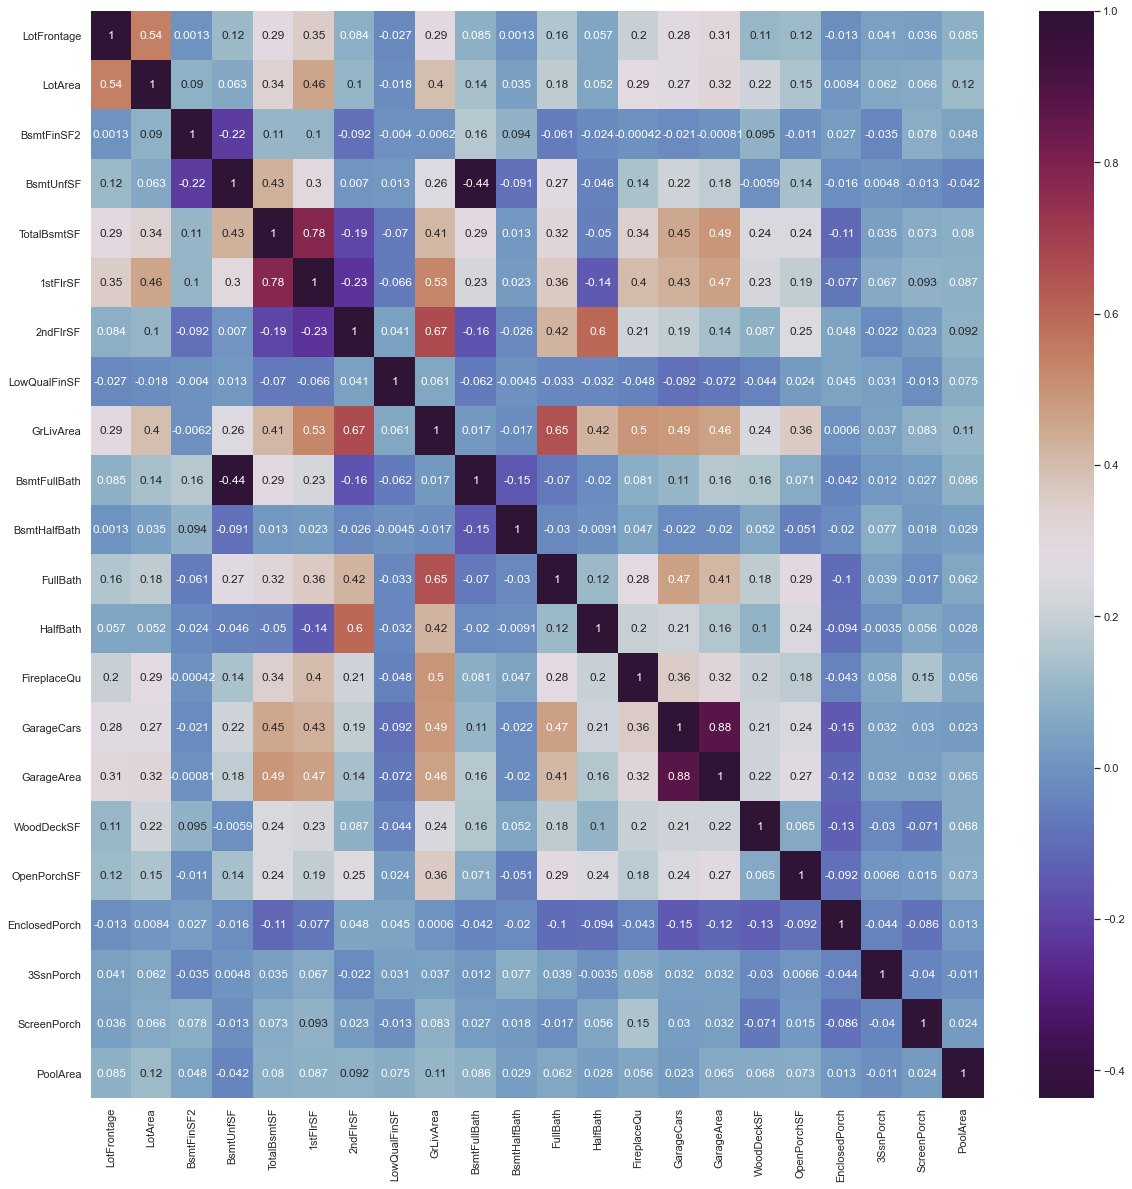

In [2405]:
#check correlation between continuous features in train
plt.figure(figsize=(20,20))

sns.heatmap(df_x[continuous_features].corr(),annot=True,cmap="twilight_shifted")

<AxesSubplot:>

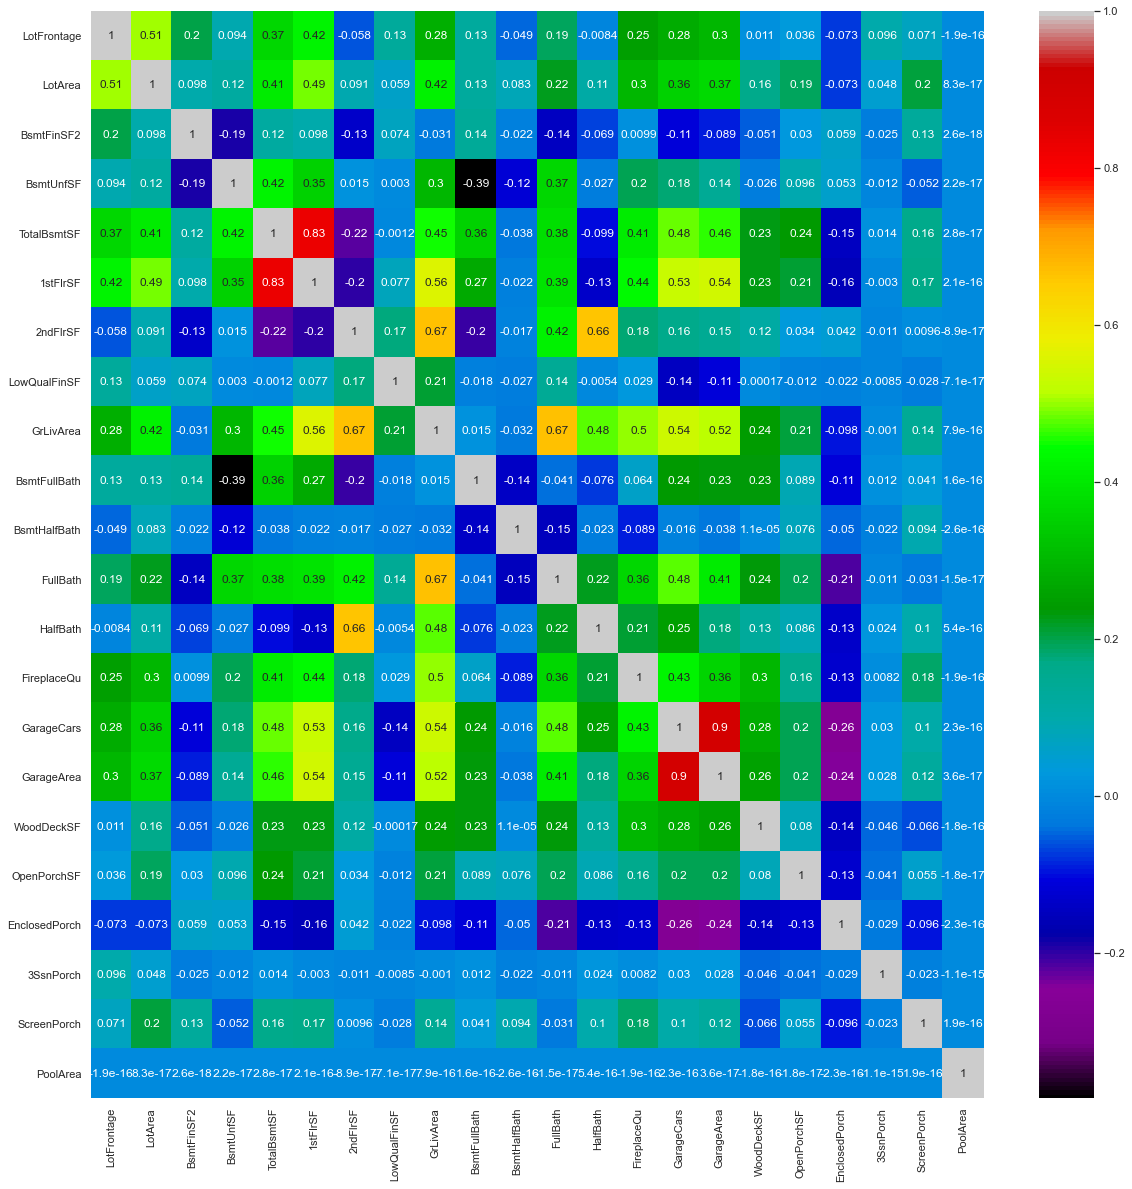

In [2406]:
#check correlation between continuous features in test
plt.figure(figsize=(20,20))

sns.heatmap(test[continuous_features].corr(),annot=True,cmap="nipy_spectral")

In [2407]:
# GarageArea and GarageCars both are 89% correlated with each other so can drop one.

In [2408]:
df_x = df_x.drop("GarageArea",axis=1)
test = test.drop("GarageArea",axis=1)

# Model Building

In [2409]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

In [2410]:
x_train,x_valid,y_train,y_valid = train_test_split(df_x,df_y,test_size=0.25,random_state=5)


Apply Linear Regression

In [2411]:
x_train

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
126    -0.161440 -0.021646     0.381206  0.249129  0.058621  0.707310   
343     1.508301 -0.021646    -0.782661 -1.655111  0.058621  0.707310   
656     2.462438  1.558511    -2.429854 -2.873730  0.058621  0.707310   
365    -0.877042 -3.181960    -0.354899 -0.470101  0.058621  0.707310   
247     2.462438 -3.181960    -2.263140 -2.318891  0.058621  0.707310   
...          ...       ...          ...       ...       ...       ...   
73      0.554163 -0.021646     0.561110 -0.084866  0.058621  0.707310   
1142   -0.877042 -0.021646    -0.449007  1.186998  0.058621 -1.042983   
998    -0.877042 -3.181960     0.650510  0.375800  0.058621  0.707310   
206    -0.877042 -0.021646    -1.575501  1.975007  0.058621 -2.793275   
867     3.178041 -1.601803    -0.638819 -0.585212  0.058621  0.707310   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
126      0.310689        0.0   0.606420   0.226126     -0.024227   -2.332681   
343      0.310689        0.0   0.606420   0.226126     -2.021633   -0.037339   
656      0.310689        0.0   0.606420   0.226126     -1.688732   -0.037339   
365      0.310689        0.0   0.606420   0.226126      1.473828   -0.037339   
247      0.310689        0.0   0.606420   0.226126      1.473828   -0.037339   
...           ...        ...        ...        ...           ...         ...   
73       0.310689        0.0   0.606420   0.226126     -0.024227   -0.037339   
1142     0.310689        0.0  -1.829688   0.226126      1.806730   -0.037339   
998      0.310689        0.0   0.606420   0.226126      1.473828   -0.037339   
206      0.310689        0.0  -1.220661   0.226126      0.308675    2.258004   
867      0.310689        0.0   0.606420   0.226126      0.974477   -0.037339   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
126    -0.023979 -0.403288   -1.603776    -0.075169     0.359572  -0.727811   
343    -0.023979  2.985495   -0.549930     0.644484    -0.530217   1.163844   
656    -0.023979  2.138299    1.030838    -0.075169    -0.530217   0.002301   
365    -0.023979 -0.403288   -0.549930     0.644484    -0.530217   1.130657   
247    -0.023979  2.138299    1.030838     0.644484    -0.530217   1.130657   
...          ...       ...         ...          ...          ...        ...   
73     -0.023979 -0.403288    2.084683    -0.075169     1.249361  -0.163633   
1142   -0.023979 -0.403288   -0.549930     1.364138     0.359572   0.168236   
998    -0.023979 -0.403288   -0.549930     1.364138    -0.530217   1.163844   
206    -0.023979 -0.403288   -0.549930     0.644484     1.249361  -0.097259   
867    -0.023979  0.443907    1.030838    -0.794823     2.139151  -1.822979   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
126      -1.672992  -0.483544 -0.134573     1.079014     1.050880   -1.241686   
343       1.070520  -0.483544 -0.134573     1.401999     1.339822   -1.241686   
656      -0.662224  -0.483544 -0.134573    -1.504868    -1.549602   -1.241686   
365       0.974257  -0.483544 -0.134573     0.756029     0.761937    0.395209   
247       0.974257  -0.483544 -0.134573    -0.535912    -0.682775    0.395209   
...            ...        ...       ...          ...          ...         ...   
73       -0.902883  -0.483544 -0.134573    -1.181882    -1.260660   -1.241686   
1142     -0.421565   1.919773  7.646653     0.110058    -1.260660    0.395209   
998       1.022389  -0.483544 -0.134573     0.756029     0.761937    0.395209   
206       0.877993   1.919773 -0.134573    -1.827853    -1.260660    0.395209   
867       0.492939  -0.483544 -0.134573     0.756029     0.761937    0.395209   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
126     1.410120  -0.700004  -0.223988   -0.557836 -0.651980   0.11746   
343    -0.154907   1.032209  -0.223988    0.852451  1.899152   0.11746   
656     0.880030  -0.700

In [2412]:
y_train

126     143000
343     172500
656      91500
365     176000
247     147400
         ...  
73      174900
1142    287000
998     249700
206     262500
867     160000
Name: SalePrice, Length: 876, dtype: int64

In [2413]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_model.score(x_train,y_train)

0.8949470685783236

In [2414]:
linear_prediction = linear_model.predict(x_valid)
r2_score(y_valid,linear_prediction)

0.6783657521286933

In [2415]:
print("MAE:",mean_absolute_error(y_valid,linear_prediction))
print("MSE:",mean_squared_error(y_valid,linear_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,linear_prediction)))

MAE: 22302.44254398947
MSE: 2062610365.440816
RMSE: 45415.97037872048


Apply Lasso 

In [2416]:
lasso_model = Lasso(max_iter=10000)
lasso_model.fit(x_train,y_train)
lasso_model.score(x_train,y_train)

0.894948837474309

In [2417]:
# prediction on validation data
lasso_prediction = lasso_model.predict(x_valid)
r2_score(y_valid,lasso_prediction)

0.6784461955492593

In [2418]:
print("MAE:",mean_absolute_error(y_valid,linear_prediction))
print("MSE:",mean_squared_error(y_valid,linear_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,linear_prediction)))

MAE: 22302.44254398947
MSE: 2062610365.440816
RMSE: 45415.97037872048


In [2419]:
#Apply Randomized Searchcv on Lasso model.

parameters = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000,500000,1000000]}

rdm_lasso = RandomizedSearchCV(lasso_model,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=5,verbose=2)

rdm_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    3.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


RandomizedSearchCV(cv=5, estimator=Lasso(max_iter=10000), n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000, 500000,
                                                  1000000]},
                   verbose=2)

In [2420]:
rdm_lasso.best_estimator_

Lasso(alpha=600, max_iter=10000)

In [2421]:
rdm_lasso.best_params_

{'alpha': 600}

In [2422]:
rdm_lasso.best_score_

0.853246631668594

In [2423]:
# prediction on validation data
rdm_lasso_prediction = rdm_lasso.predict(x_valid)
r2_score(y_valid,rdm_lasso_prediction)

0.6903727568940587

In [2424]:
print("MAE:",mean_absolute_error(y_valid,rdm_lasso_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_lasso_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_lasso_prediction)))

MAE: 21792.11252648525
MSE: 1985610566.287433
RMSE: 44560.19037534998


Apply Ridge 

In [2425]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
ridge_model.score(x_train,y_train)

0.8947703656271762

In [2426]:
# prediction on validation data
ridge_prediction = ridge_model.predict(x_valid)
r2_score(y_valid,ridge_prediction)

0.6781160470620042

In [2427]:
print("MAE:",mean_absolute_error(y_valid,ridge_prediction))
print("MSE:",mean_squared_error(y_valid,ridge_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,ridge_prediction)))

MAE: 22301.74246088522
MSE: 2064211700.6912282
RMSE: 45433.59660748011


In [2428]:
#Apply Randomized Searchcv on Ridge model.

parameters = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000,500000,1000000]}

rdm_ridge = RandomizedSearchCV(ridge_model,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rdm_ridge.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  44 out of  75 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000, 500000,
                                                  1000000]},
                   verbose=2)

In [2429]:
rdm_ridge.best_estimator_

Ridge(alpha=1)

In [2430]:
rdm_ridge.best_params_

{'alpha': 1}

In [2431]:
rdm_ridge.best_score_

0.8532174778270656

In [2432]:
# prediction on validation data
rdm_ridge_prediction = rdm_ridge.predict(x_valid)
r2_score(y_valid,rdm_ridge_prediction)

0.6781160470620042

In [2433]:
print("MAE:",mean_absolute_error(y_valid,rdm_ridge_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_ridge_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_ridge_prediction)))

MAE: 22301.74246088522
MSE: 2064211700.6912282
RMSE: 45433.59660748011


Apply Gradient Boosting Regressor

In [2434]:
y_train

126     143000
343     172500
656      91500
365     176000
247     147400
         ...  
73      174900
1142    287000
998     249700
206     262500
867     160000
Name: SalePrice, Length: 876, dtype: int64

In [2435]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.9738473876249725

In [2436]:
# prediction on validation data

gb_prediction = gb_model.predict(x_valid)
r2_score(y_valid,gb_prediction)

0.6196401025125957

In [2437]:
print("MAE:",mean_absolute_error(y_valid,gb_prediction))
print("MSE:",mean_squared_error(y_valid,gb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,gb_prediction)))

MAE: 19082.17498127172
MSE: 2439212466.793762
RMSE: 49388.38392571438


In [2438]:
#Apply Randomized Searchcv on GB model.

parameters = {"n_estimators":[50,100,200,300,400,500,600,700,800,900],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]
              ,"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8]}

rdm_gb = RandomizedSearchCV(gb_model,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)

rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 18, 20, 22],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [2439]:
rdm_gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=18,
                          n_estimators=700)

In [2440]:
rdm_gb.best_params_

{'n_estimators': 700,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 8,
 'learning_rate': 0.05}

In [2441]:
rdm_gb.best_score_

0.8996914046306873

In [2442]:
#Prediction Validation Data

rdm_gb_prediction = rdm_gb.predict(x_valid)

In [2443]:
# Validation Accuracy

r2_score(y_valid,rdm_gb_prediction)

0.6899071573447135

In [2444]:
print("MAE:",mean_absolute_error(y_valid,rdm_gb_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_gb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_gb_prediction)))

MAE: 17763.448897752
MSE: 1988596412.6734443
RMSE: 44593.681308829444


In [2445]:
import pickle

pickle_out = open("gb_new_lasso_model.pickle","wb")
pickle.dump(rdm_gb,pickle_out)
pickle_out.close

<function BufferedWriter.close>

Apply XGB Regressor

In [2446]:
xgb_model  = XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

0.9999571590941233

In [2447]:
#do Prediction on Test Dataset

xgb_prediction = xgb_model.predict(x_valid)
r2_score(y_valid,xgb_prediction)

0.5589419704049877

In [2448]:
# Apply RandomizedSearchCV with XGB
param_dist = {"n_estimators":[100,200,300,400,500,600,700,800],"learning_rate":[0.001,0.01,0.1,0.3,0.5,0.7],
              "max_depth":[3,5,7,10,12,15],"gamma":[0.001,0.01,0.1,1,10],"reg_alpha":[0,0.1,0.5,0.7,1],
              "reg_lambda":[1,10,50,80,100,120,150]}

rdm_xgb = RandomizedSearchCV(xgb_model,param_distributions=param_dist,n_jobs=-1,n_iter=50,cv=10,verbose=5)
rdm_xgb.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=16,
                                          num_p...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [2449]:
rdm_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=50, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [2450]:
rdm_xgb.best_params_

{'reg_lambda': 50,
 'reg_alpha': 0.1,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [2451]:
rdm_xgb.best_score_

0.8855931794505804

In [2452]:
#Prediction Validation Data

rdm_xgb_prediction = rdm_xgb.predict(x_valid)

In [2453]:
# Validation Accuracy

r2_score(y_valid,rdm_xgb_prediction)

0.7006262294482642

In [2454]:
print("MAE:",mean_absolute_error(y_valid,rdm_xgb_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_xgb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_xgb_prediction)))

MAE: 19557.426985231163
MSE: 1919856005.2851813
RMSE: 43816.16146224109


Apply Decision Tree Regressor

In [2455]:
dt_model  = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)

1.0

In [2456]:
#do Prediction on Test Dataset

dt_prediction = dt_model.predict(x_valid)
r2_score(y_valid,dt_prediction)

0.41392908840626674

In [2457]:
print("MAE:",mean_absolute_error(y_valid,dt_prediction))
print("MSE:",mean_squared_error(y_valid,dt_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,dt_prediction)))

MAE: 30346.575342465752
MSE: 3758417970.527397
RMSE: 61305.937481841


In [2458]:
#Apply Randomized Searchcv on DecisionTree model.

parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_dt = RandomizedSearchCV(dt_model,param_distributions=parameters,n_iter=40,n_jobs=-1,cv=10,verbose=2)

rdm_dt.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.4s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25]},
                   verbose=2)

In [2459]:
rdm_dt.best_estimator_

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=25)

In [2460]:
rdm_dt.best_params_

{'min_samples_split': 25,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'mse'}

In [2461]:
rdm_dt.best_score_

0.7818059118323932

In [2462]:
#Prediction Validation Data

rdm_dt_prediction = rdm_dt.predict(x_valid)

In [2463]:
# Validation Accuracy

r2_score(y_valid,rdm_dt_prediction)

0.5959452875401846

In [2464]:
print("MAE:",mean_absolute_error(y_valid,rdm_dt_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_dt_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_dt_prediction)))

MAE: 26736.450058371007
MSE: 2591165100.2361207
RMSE: 50903.48809498344


Apply RandomForest Regressor

In [2465]:
rf_model  = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.981924267268316

In [2466]:
#do Prediction on Test Dataset

rf_prediction = rf_model.predict(x_valid)
r2_score(y_valid,rf_prediction)

0.6801526909472054

In [2467]:
print("MAE:",mean_absolute_error(y_valid,rf_prediction))
print("MSE:",mean_squared_error(y_valid,rf_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rf_prediction)))

MAE: 20029.376815068495
MSE: 2051150893.839563
RMSE: 45289.633403678185


In [2468]:
#Apply Randomized Searchcv on Random Forest model.

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}

rdm_rf = RandomizedSearchCV(rf_model,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)

rdm_rf.fit(x_train,y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.8min finished


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [2469]:
rdm_rf.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_split=8,
                      n_estimators=500)

In [2470]:
rdm_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'mse'}

In [2471]:
rdm_rf.best_score_

0.8693854810077505

In [2472]:
#Prediction Validation Data

rdm_rf_prediction = rdm_rf.predict(x_valid)

In [2473]:
# Validation Accuracy.

r2_score(y_valid,rdm_rf_prediction)

0.7566995122404165

In [2474]:
print("MAE:",mean_absolute_error(y_valid,rdm_rf_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_rf_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_rf_prediction)))

MAE: 18754.251915706558
MSE: 1560263284.432691
RMSE: 39500.168157017906


Apply KNN Regressor

In [2475]:
knn_model  = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.8371027883925158

In [2476]:
#do Prediction on Test Dataset.

knn_prediction = knn_model.predict(x_valid)
r2_score(y_valid,knn_prediction)

0.6104446487015049

In [2477]:
print("MAE:",mean_absolute_error(y_valid,knn_prediction))
print("MSE:",mean_squared_error(y_valid,knn_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,knn_prediction)))

MAE: 25948.321232876708
MSE: 2498182052.499315
RMSE: 49981.81721885785


In [2478]:
rmse_val = []

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_valid)
    error = sqrt(mean_squared_error(y_valid,pred))
    rmse_val.append(error)

Text(0, 0.5, 'RMSE')

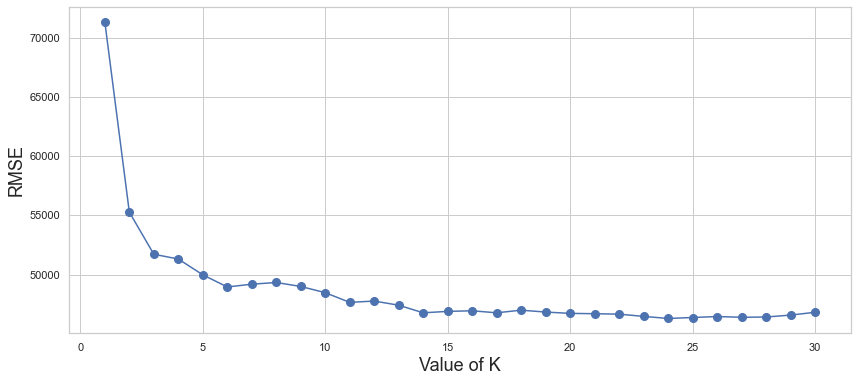

In [2479]:
plt.figure(figsize=(14,6))
plt.plot(range(1,31),rmse_val,marker="o",markersize=8)
plt.xlabel("Value of K",fontsize=18)
plt.ylabel("RMSE",fontsize=18)

at n=10, rmse is very less so try n_neighbors=10 

In [2480]:
knn_model  = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.8140040406548832

In [2481]:
#do Prediction on Test Dataset

knn_prediction = knn_model.predict(x_valid)
r2_score(y_valid,knn_prediction)

0.6335986443033967

In [2482]:
print("MAE:",mean_absolute_error(y_valid,knn_prediction))
print("MSE:",mean_squared_error(y_valid,knn_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,knn_prediction)))

MAE: 25292.90205479452
MSE: 2349697643.1246576
RMSE: 48473.67990079418


# Conclusion

After using eight M/L algorithm it's clear that Random forest giving the best accuracy so use it to predict the test data.

# New Future Prediction

Prediction Test Dataset

In [2490]:
test_prediction = rdm_rf.predict(test)

In [2491]:

House_price_output=pd.DataFrame({})
House_price_output['Sales_Price']=test_prediction
House_price_output.to_csv("House_price_output_rdm_xgb.csv")